# Supervised Learning - Foundations Project: ReCell

## Problem Statement

###Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.


###Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist.

***They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.***


###Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- **brand_name**: Name of manufacturing brand
- **os**: OS on which the device runs
- **screen_size**: Size of the screen in cm
- **4g**: Whether 4G is available or not
- **5g**: Whether 5G is available or not
- **main_camera_mp**: Resolution of the rear camera in megapixels
- **selfie_camera_mp**: Resolution of the front camera in megapixels
- **int_memory**: Amount of internal memory (ROM) in GB
- **ram**: Amount of RAM in GB
- **battery**: Energy capacity of the device battery in mAh
- **weight**: Weight of the device in grams
- **release_year**: Year when the device model was released
- **days_used**: Number of days the used/refurbished device has been used
- **normalized_new_price**: Normalized price of a new device of the same model in euros
- **normalized_used_price**: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [356]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 -q --user

In [357]:
# Installing the libraries with the specified version.
# Note: The provided version of pandas is generating an error: "google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 1.5.3 which is incompatible."
# To resolve this, pandas version is updated below to be 2.0.3.
#!pip install numpy==1.25.2 pandas==2.0.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [358]:
# Load the libraries we need

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Library to help with statistical analysis
import scipy.stats as stats

# Function for handling normal distribution and statistical calculation
from scipy.stats import norm



## Loading the dataset

In [359]:
# Load Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [360]:
# Define path to data file
path = r'/content/drive/MyDrive/Learning/Data Coursework/PGP-DSBA/3-Supervised Machine Learning/Project 3/'
df = pd.read_csv(path + 'used_device_data.csv')

## Data Overview

- Observations
- Sanity checks

In [361]:
# Check the shape of the data
df.shape
print('The data set has', df.shape[0], 'rows', 'and', df.shape[1], 'columns')

The data set has 3454 rows and 15 columns


In [362]:
# Check the dataset details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

In [363]:
# Check for null values
df.isnull()

#   main_camera_mp         3275 non-null   float64
#   selfie_camera_mp       3452 non-null   float64
#   int_memory             3450 non-null   float64
#   ram                    3450 non-null   float64
#   battery                3448 non-null   float64
#   weight                 3447 non-null   float64

brand_name     os  screen_size     4g     5g  main_camera_mp  \
0          False  False        False  False  False           False   
1          False  False        False  False  False           False   
2          False  False        False  False  False           False   
3          False  False        False  False  False           False   
4          False  False        False  False  False           False   
...          ...    ...          ...    ...    ...             ...   
3449       False  False        False  False  False            True   
3450       False  False        False  False  False           False   
3451       False  False        False  False  False           False   
3452       False  False        False  False  False           False   
3453       False  False        False  False  False           False   

      selfie_camera_mp  int_memory    ram  battery  weight  release_year  \
0                False       False  False    False   False         False   
1                False       False  False    False   False         False   
2                False       False  False    False   False         False   
3                False       False  False    False   False         False   
4                False       False  False    False   False         False   
...                ...         ...    ...      ...     ...           ...   
3449             False       False  False    False   False         False   
3450             False       False  False    False   False         False   
3451             False       False  False    False   False         False   
3452             False       False  False    False   False         False   
3453             False       False  False    False   False         False   

      days_used  normalized_used_price  normalized_new_price  
0         False                  False                 False  
1         False                  False                 False  
2         False                  False                 False  
3         False                  False                 False  
4         False                  False                 False  
...         ...                    ...                   ...  
3449      False                  False                 False  
3450      False                  False                 False  
3451      False                  False                 False  
3452      False                  False                 False  
3453      False                  False                 False  

[3454 rows x 15 columns]

In [364]:
# Replace any missing values with NaNs
df = df.replace("?", np.nan)

# Count NaN values
nan_count = df.isnull().sum().sum()

if nan_count > 0:
    print(f"DataFrame has {nan_count} NaN values.")
else:
    print("DataFrame does not have NaN values.")

DataFrame has 202 NaN values.


In [365]:
# Check counts, unique counts and duplicate values for each column. Based on this, we can decide how to approach each variable.
for col in df:
  duplicate_count = df[col].count()-df[col].nunique()
  print('Series', col, 'has', df[col].nunique(),'unique values and', duplicate_count, 'duplicates.')

Series brand_name has 34 unique values and 3420 duplicates.
Series os has 4 unique values and 3450 duplicates.
Series screen_size has 142 unique values and 3312 duplicates.
Series 4g has 2 unique values and 3452 duplicates.
Series 5g has 2 unique values and 3452 duplicates.
Series main_camera_mp has 41 unique values and 3234 duplicates.
Series selfie_camera_mp has 37 unique values and 3415 duplicates.
Series int_memory has 15 unique values and 3435 duplicates.
Series ram has 12 unique values and 3438 duplicates.
Series battery has 324 unique values and 3124 duplicates.
Series weight has 555 unique values and 2892 duplicates.
Series release_year has 8 unique values and 3446 duplicates.
Series days_used has 924 unique values and 2530 duplicates.
Series normalized_used_price has 3094 unique values and 360 duplicates.
Series normalized_new_price has 2988 unique values and 466 duplicates.


In [366]:
# Preview the data characteristics for numerical columns
df.describe().T

count         mean          std          min  \
screen_size            3454.0    13.713115     3.805280     5.080000   
main_camera_mp         3275.0     9.460208     4.815461     0.080000   
selfie_camera_mp       3452.0     6.554229     6.970372     0.000000   
int_memory             3450.0    54.573099    84.972371     0.010000   
ram                    3450.0     4.036122     1.365105     0.020000   
battery                3448.0  3133.402697  1299.682844   500.000000   
weight                 3447.0   182.751871    88.413228    69.000000   
release_year           3454.0  2015.965258     2.298455  2013.000000   
days_used              3454.0   674.869716   248.580166    91.000000   
normalized_used_price  3454.0     4.364712     0.588914     1.536867   
normalized_new_price   3454.0     5.233107     0.683637     2.901422   

                               25%          50%          75%          max  
screen_size              12.700000    12.830000    15.340000    30.710000  
main_camera_mp            5.000000     8.000000    13.000000    48.000000  
selfie_camera_mp          2.000000     5.000000     8.000000    32.000000  
int_memory               16.000000    32.000000    64.000000  1024.000000  
ram                       4.000000     4.000000     4.000000    12.000000  
battery                2100.000000  3000.000000  4000.000000  9720.000000  
weight                  142.000000   160.000000   185.000000   855.000000  
release_year           2014.000000  2015.500000  2018.000000  2020.000000  
days_used               533.500000   690.500000   868.750000  1094.000000  
normalized_used_price     4.033931     4.405133     4.755700     6.619433  
normalized_new_price      4.790342     5.245892     5.673718     7.847841

In [367]:
# Preview the data
df

brand_name       os  screen_size   4g   5g  main_camera_mp  \
0         Honor  Android        14.50  yes   no            13.0   
1         Honor  Android        17.30  yes  yes            13.0   
2         Honor  Android        16.69  yes  yes            13.0   
3         Honor  Android        25.50  yes  yes            13.0   
4         Honor  Android        15.32  yes   no            13.0   
...         ...      ...          ...  ...  ...             ...   
3449       Asus  Android        15.34  yes   no             NaN   
3450       Asus  Android        15.24  yes   no            13.0   
3451    Alcatel  Android        15.80  yes   no            13.0   
3452    Alcatel  Android        15.80  yes   no            13.0   
3453    Alcatel  Android        12.83  yes   no            13.0   

      selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
0                  5.0        64.0  3.0   3020.0   146.0          2020   
1                 16.0       128.0  8.0   4300.0   213.0          2020   
2                  8.0       128.0  8.0   4200.0   213.0          2020   
3                  8.0        64.0  6.0   7250.0   480.0          2020   
4                  8.0        64.0  3.0   5000.0   185.0          2020   
...                ...         ...  ...      ...     ...           ...   
3449               8.0        64.0  6.0   5000.0   190.0          2019   
3450               8.0       128.0  8.0   4000.0   200.0          2018   
3451               5.0        32.0  3.0   4000.0   165.0          2020   
3452               5.0        32.0  2.0   4000.0   160.0          2020   
3453               5.0        16.0  2.0   4000.0   168.0          2020   

      days_used  normalized_used_price  normalized_new_price  
0           127               4.307572              4.715100  
1           325               5.162097              5.519018  
2           162               5.111084              5.884631  
3           345               5.135387              5.630961  
4           293               4.389995              4.947837  
...         ...                    ...                   ...  
3449        232               4.492337              6.483872  
3450        541               5.037732              6.251538  
3451        201               4.357350              4.528829  
3452        149               4.349762              4.624188  
3453        176               4.132122              4.279994  

[3454 rows x 15 columns]

In [368]:
# Preview the unique categorical values
df.nunique()

brand_name                 34
os                          4
screen_size               142
4g                          2
5g                          2
main_camera_mp             41
selfie_camera_mp           37
int_memory                 15
ram                        12
battery                   324
weight                    555
release_year                8
days_used                 924
normalized_used_price    3094
normalized_new_price     2988
dtype: int64

In [369]:
# Check for superfluous columns we can possibly eliminate later.
print('It does not appear that we have any non-useful columns to remove prior to starting our analysis.\n Nearly all are numerical, and the two object type series contain valuable information.')
print('However, we have two series denoting camera megapixels. If the front and selfie cameras are essentially equivalent, we may opt to use only one of those series once we verify correlation.')

It does not appear that we have any non-useful columns to remove prior to starting our analysis.
 Nearly all are numerical, and the two object type series contain valuable information.
However, we have two series denoting camera megapixels. If the front and selfie cameras are essentially equivalent, we may opt to use only one of those series once we verify correlation.


In [370]:
# Retrieve and preview the categorial column values, also using a list.
list_catcol = df.select_dtypes(include=['object']).columns.to_list()
list_numcol = df.select_dtypes(exclude=['object']).columns.to_list()

# Use a for loop to show the counts and percent contribution of each categorical column.
for col in list_catcol:
  print('\nPreview counts for:',df[col].value_counts())
  print('\nPreview % breakdown for:',df[col].value_counts(normalize=True))


Preview counts for: brand_name
Others        502
Samsung       341
Huawei        251
LG            201
Lenovo        171
ZTE           140
Xiaomi        132
Oppo          129
Asus          122
Alcatel       121
Micromax      117
Vivo          117
Honor         116
HTC           110
Nokia         106
Motorola      106
Sony           86
Meizu          62
Gionee         56
Acer           51
XOLO           49
Panasonic      47
Realme         41
Apple          39
Lava           36
Celkon         33
Spice          30
Karbonn        29
Coolpad        22
BlackBerry     22
Microsoft      22
OnePlus        22
Google         15
Infinix        10
Name: count, dtype: int64

Preview % breakdown for: brand_name
Others        0.145339
Samsung       0.098726
Huawei        0.072669
LG            0.058193
Lenovo        0.049508
ZTE           0.040533
Xiaomi        0.038217
Oppo          0.037348
Asus          0.035321
Alcatel       0.035032
Micromax      0.033874
Vivo          0.033874
Honor         0.0

**Observations**
* The data has 3454 rows and 15 columns (series) total:
  * 4 columns of type object
  * 2 columns of type int64
  * 9 columns of type float64

* Several columns have null values we'll need to deal with during pre-processing. Out of 3454 rows total, these series lack some values:
  *  main_camera_mp:         3275 rows of type float64)
  *  selfie_camera_mp:       3452 rows of type float64
  *  int_memory:             3450 rows of type float64
  *  ram:                    3450 rows of type float64
  *  battery:                3448 rows of type float64
  *  weight:                 3447 rows of type float64

* All series have an extremely wide range of values. We will need to check for outliers.

* Since two series contain information about the device's internal camera, we may opt to use only one of those series if we determine that both the main and selfie cameras are similar in value, per device.

*  The top brand is Samsung, with nearly 10% of the market share in this dataset, followed by Huawei with about 7%. However, many other brands exist that are not captured in this dataset.
  * Others        0.145339
  * Samsung       0.098726
  * Huawei        0.072669

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

###EDA Helpers
The items  below help us perform analysis on each variable.

In [371]:
# Copy the dataframe so we don't taint the original
df_eda = df.copy()

# Add an index
df_eda['id'] = df_eda.index

# Add a counter
df_eda['counter'] = 1


In [372]:
# The functions below are defined here so we can avoid repeating similar code for commonly used plots.
# These functions are called throughout this notebook.

# This function prints a histplot and a boxplot side by side.
def print_dual_box_hist_plots(data, column, width, height, legend=True, hue=None, bins=None, method='auto', kde=False):
  """ Print a side-by-side histogram and boxplot
      with title and labels """

  # set figure size
  plt.figure(figsize=(width, height))

  # set bins
  if bins == None:
    bin = bins
  else:
    method='auto'

  # find the counts for the column and sort
  value_counts_df = df[column].value_counts().reset_index()
  value_counts_df.columns = [column, 'count']
  sorted_df = value_counts_df.sort_values(by='count', ascending=False)

  # define first plot
  plt.subplot(1, 2, 1)
  title1 = 'Histogram for: ' + column
  plt.tight_layout()
  plt.xticks(rotation=90)

  # set hue optionally
  if hue == None:
    if bins:
        sns.histplot(data=sorted_df, x=column, legend=legend, hue=hue, bins=bins, kde=kde);
    else:
        sns.histplot(data=sorted_df, x=column, legend=legend, hue=hue, kde=kde)
  else:
    sns.histplot(data=sorted_df, x=column, y='count', legend=legend, hue=hue, bins=bins);
  plt.title(title1)
  plt.xticks(rotation=90)

  # define second plot
  plt.subplot(1, 2, 2)
  title2 = 'Boxplot for: ' + column
  sns.boxplot(data=df, x=column, hue=hue, showmeans=True);
  plt.title(title2)
  plt.xticks(rotation=90)

# This function prints a boxplot with several controllable options, including size and title
def print_boxplot(data, column, width, height, titleText):
  """ Print a single boxplot with title and labels """

  # set figure size and title
  plt.figure(figsize=(width, height))
  plt.title(titleText)

  # define plot
  sns.boxplot(data=df,x=column, showmeans=True);
  plt.show()

# This function prints a barplot with several controllable options, including hue, top N count, size and title
def print_barplot(data, xCol, yCol, width, height, titleText, hue=None, topRowCount=None):
  """ Print a single barplot with title and labels using a pivot table """

  # set figure size and other elements
  plt.figure(figsize=(width, height))
  plt.title(titleText)
  plt.xticks(rotation=90)
  plt.xlabel(xCol)
  plt.ylabel(yCol)

  # dynamically set the hue and top N rows based on values passed in
  if hue == None:
    if topRowCount == None:
        sns.barplot(data=data, x=xCol, y=yCol);
    else:
        sns.barplot(data=data.head(topRowCount), x=xCol, y=yCol);
  else:
    if topRowCount == None:
      sns.barplot(data=data, x=xCol, y=yCol, hue=xCol);
    else:
      sns.barplot(data=data.head(topRowCount), x=xCol, y=yCol, hue=xCol);

# This function prints a histogram with several controllable options, including hue, size and title
def print_histogram(data, column, width, height, titleText, hue=None, bins=None, method='auto'):
  """ Print a single, sorted histogram with title and labels and optional hue"""

  # set figure size and title
  plt.figure(figsize=(width, height))
  plt.title(titleText)
  plt.xticks(rotation=90)

  # dynamically set the hue if passed in
  if hue == None:
    sns.histplot(data=df,x=column, legend=False);
  else:
    sns.histplot(data=df,x=column, hue=column, legend=False);

  # dynamically set bins
  if bins is None:
      if method == 'auto':
        bins = 'auto'
      else:
        bins = method


# This function prints a violin plot with several controllable options, including size and title
def print_violin(data, column, width, height, titleText):
  """ Print a single, violin plot with title and labels """

  # set figure size and title
  plt.figure(figsize=(width, height))
  plt.title(titleText)

  # define plot
  sns.violinplot(data=df,x=column);


# This function prints a line chart
def print_linechart(data, x_column, y_column, width, height, titleText):
  """ Print a line chart plot """
  plt.figure(figsize=(width, height))
  sns.lineplot(data=data, x=x_column, y=y_column, marker='o', color='blue', linestyle='-', markersize=8)

  # Add labels and title
  plt.xlabel(x_column)
  plt.ylabel(y_column)
  plt.title('Counts by ',x_column)

  # Show plot
  plt.grid(True)
  plt.tight_layout()
  plt.show()

# This function prints a bar chart with counts
def print_simple_count_barplot(data, x_column, width, height, titleText):
  """ Print a line chart plot """

  # Compute value counts of column
  category_counts = df[x_column].value_counts()

  # Convert Series to DataFrame and reset index
  df_counts = category_counts.reset_index()

  # Rename columns for clarity
  df_counts.columns = ['category', 'count']

  # Plotting with Seaborn
  plt.figure(figsize=(width, height))
  ax = sns.barplot(data=df_counts, x=df_counts['category'], y=df_counts['count'], palette='viridis', hue=df_counts['category'], legend=False)

  # Turn off grid
  ax.grid(False)

  # Add labels and title
  plt.xlabel(x_column)
  plt.xticks(rotation=90)
  plt.ylabel('Count')
  plt.title(titleText)



For screen_size :
 * Mean = 13.713115228720325
 * Median = 12.83
 * Range = 5.08 to 30.71 ( 25.63 )
 * Distribution is skewed to the right.

For main_camera_mp :
 * Mean = 9.460207633587787
 * Median = 8.0
 * Range = 0.08 to 48.0 ( 47.92 )
 * Distribution is skewed to the right.

For selfie_camera_mp :
 * Mean = 6.554229432213209
 * Median = 5.0
 * Range = 0.0 to 32.0 ( 32.0 )
 * Distribution is skewed to the right.

For int_memory :
 * Mean = 54.57309855072464
 * Median = 32.0
 * Range = 0.01 to 1024.0 ( 1023.99 )
 * Distribution is skewed to the right.

For ram :
 * Mean = 4.036121739130435
 * Median = 4.0
 * Range = 0.02 to 12.0 ( 11.98 )
 * Distribution is skewed to the right.

For battery :
 * Mean = 3133.402697215777
 * Median = 3000.0
 * Range = 500.0 to 9720.0 ( 9220.0 )
 * Distribution is skewed to the right.

For weight :
 * Mean = 182.75187119234116
 * Median = 160.0
 * Range = 69.0 to 855.0 ( 786.0 )
 * Distribution is skewed to the right.

For release_year :
 * Mean = 20

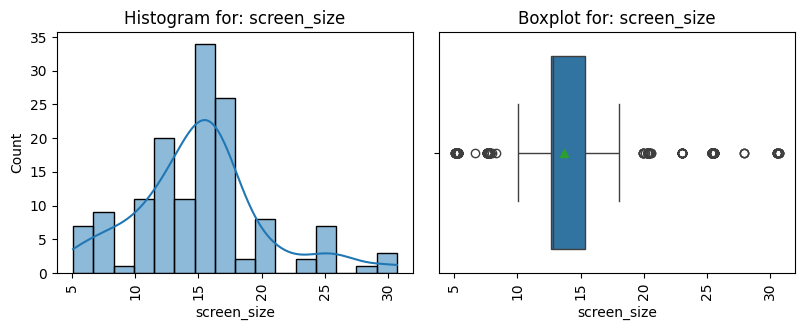

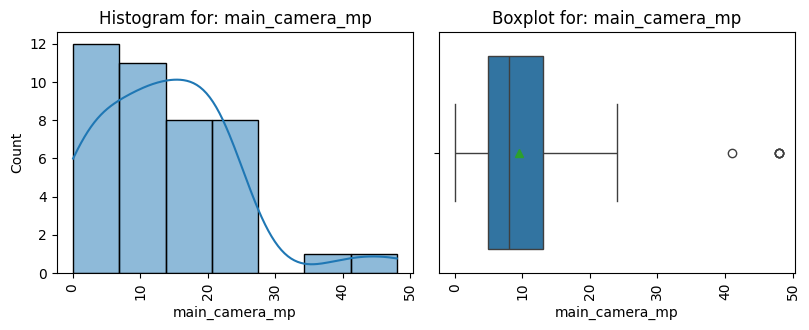

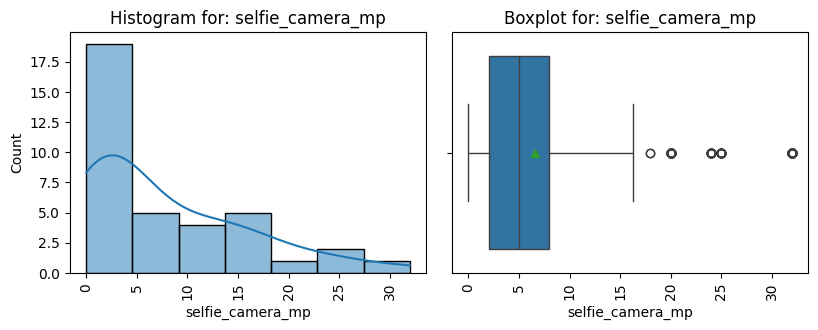

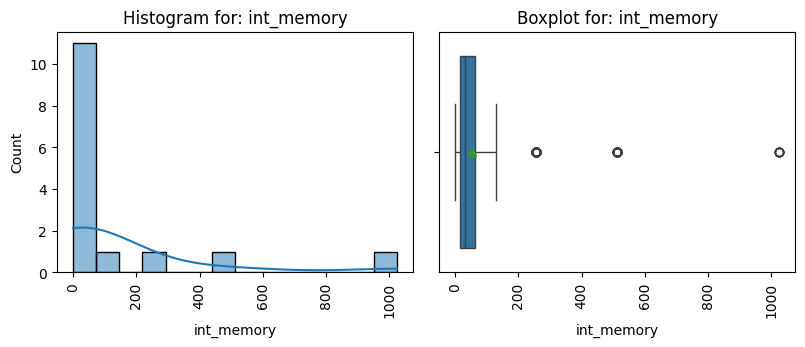

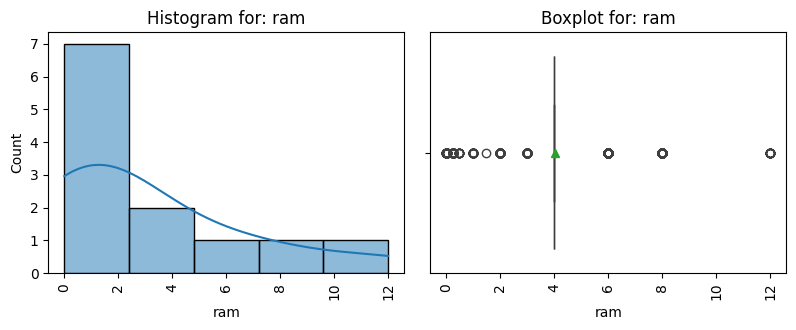

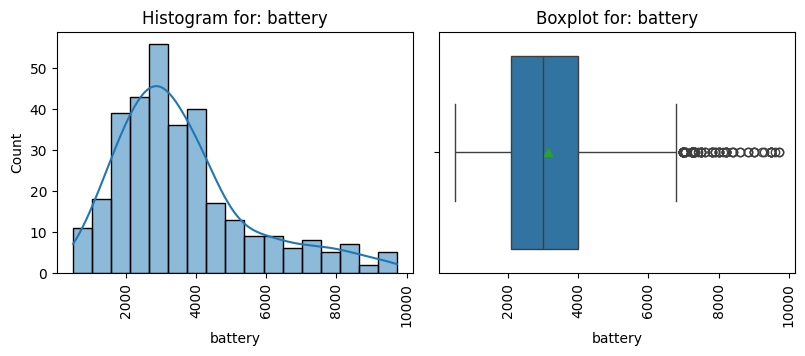

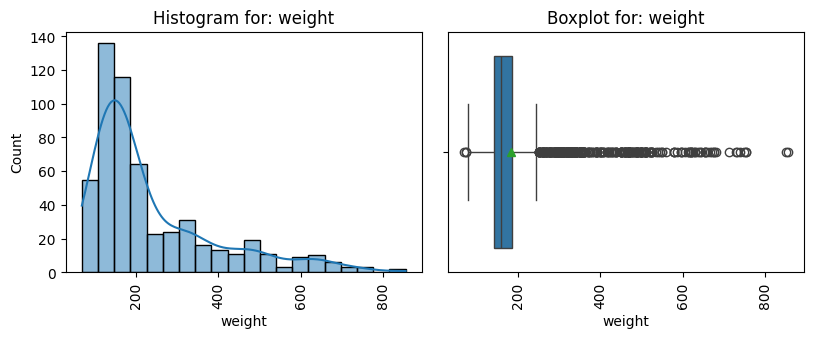

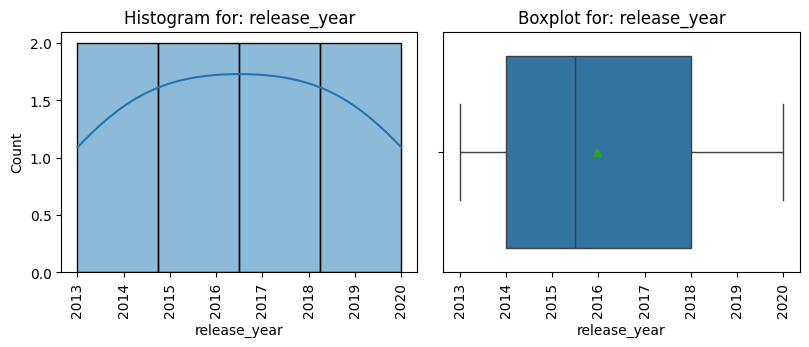

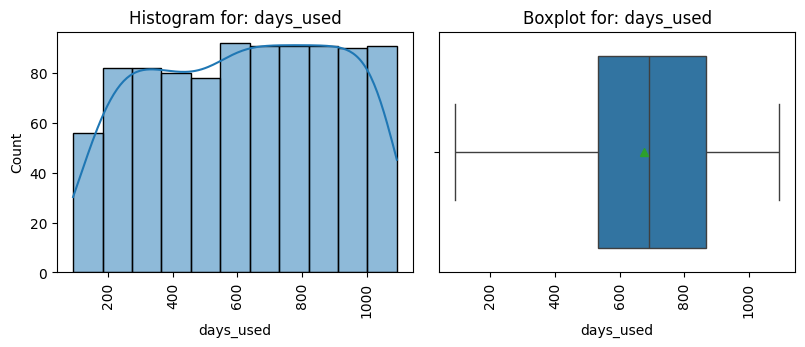

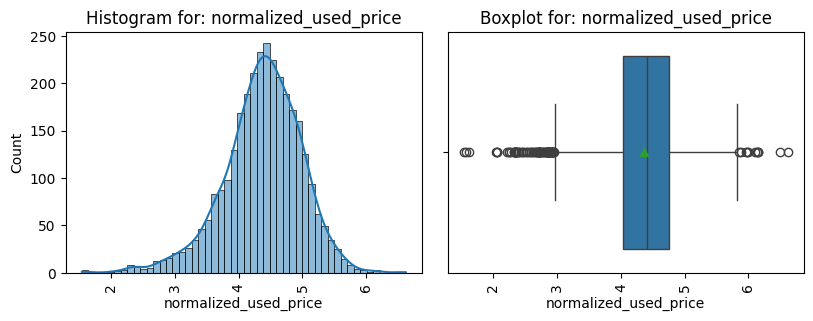

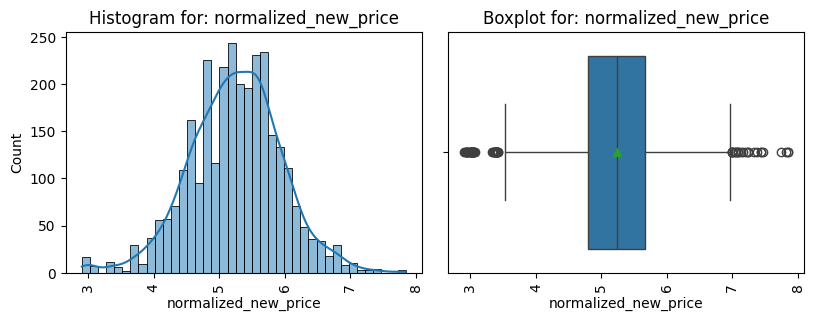

In [373]:
# Chart the histogram and boxplot for the numerical variables

# chart values
for col in list_numcol:
  mean = df[col].mean()
  median = df[col].median()
  min = df[col].min()
  max = df[col].max()

  this_range = max-min
  print('\n\nFor', col, ':')
  print(' * Mean =', mean)
  print(' * Median =' , median)
  print(' * Range =', min, 'to' , max,'(', round(this_range,3), ')')

  if mean > median and abs(this_range) >= 1 and abs(this_range) <= 2:
    print(' * Distribution is close to normal, but slightly skewed to the right.', end='')
  elif mean < median and abs(this_range) >= 1 and abs(this_range) <= 2:
    print(' * Distribution is close to normal, but slightly skewed to the left.', end='')
  if mean > median and abs(this_range) >= 2:
    print(' * Distribution is skewed to the right.', end='')
  elif mean < median and abs(this_range) >= 2:
    print(' * Distribution is skewed to the left.', end='')
  else:
    print(' * Distribution is normal.', end='')

  print_dual_box_hist_plots(df_eda, col, 8, 3, legend=False, hue=None, bins=None, kde=True)


### Univariate Analysis

Let's analyze each variable independently first.

*   brand_name            
*   os                    
*   screen_size           
*   4g                    
*   5g                    
*   main_camera_mp        
*   selfie_camera_mp      
*   int_memory            
*   ram                   
*   battery               
*   weight                
*   release_year          
*   days_used             
*   normalized_used_price
*   normalized_new_price  

####brand_name           
There are 34 different device brands available on the market.

By far, Samsung and Huawei devices are the most popular in this sample, although the largest "brands" are not named ones.

Later, we'll want to examine some features by brand.



In [374]:
print('There are', df_eda['brand_name'].nunique(), 'different brands in the dataset.')
print('Value Counts:',df_eda['brand_name'].value_counts())
print('Value Counts (Percentage):',df_eda['brand_name'].value_counts(normalize=True))
print('Number of dataset rows:',df_eda['brand_name'].shape[0])
print('# Rows for unnamed brands:',df_eda[df_eda['brand_name'] == 'Others'].count())
print('# Rows for Named brands:',df_eda['brand_name'].shape[0]- df_eda[df_eda['brand_name'] == 'Others'].count())

There are 34 different brands in the dataset.
Value Counts: brand_name
Others        502
Samsung       341
Huawei        251
LG            201
Lenovo        171
ZTE           140
Xiaomi        132
Oppo          129
Asus          122
Alcatel       121
Micromax      117
Vivo          117
Honor         116
HTC           110
Nokia         106
Motorola      106
Sony           86
Meizu          62
Gionee         56
Acer           51
XOLO           49
Panasonic      47
Realme         41
Apple          39
Lava           36
Celkon         33
Spice          30
Karbonn        29
Coolpad        22
BlackBerry     22
Microsoft      22
OnePlus        22
Google         15
Infinix        10
Name: count, dtype: int64
Value Counts (Percentage): brand_name
Others        0.145339
Samsung       0.098726
Huawei        0.072669
LG            0.058193
Lenovo        0.049508
ZTE           0.040533
Xiaomi        0.038217
Oppo          0.037348
Asus          0.035321
Alcatel       0.035032
Micromax      0.033874


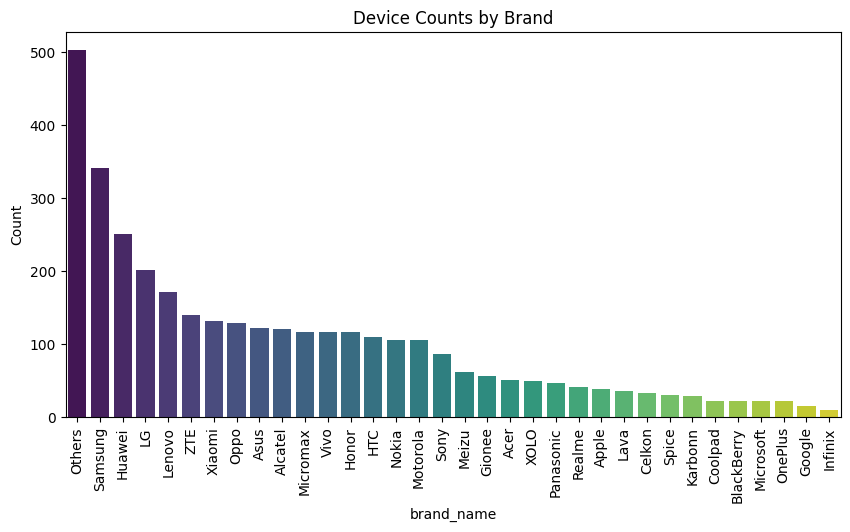

In [375]:
print_simple_count_barplot(df_eda, 'brand_name', 10, 5, 'Device Counts by Brand')

**OBSERVATIONS**

The largest single brand in our data is "Others", but other than that Samsung dominates the brands at close to 10%.

* Most popular brands
  * Others: 0.145%
  * Samsung: 0.099%
  * Huawei: 0.073%

* Least popular brands
  * OnePlus: 0.006%
  * Google: 0.004%
  * Infinix: 0.003%

####os          
There are 4 different operating system types in the dataset.
* Android    3214
* Others      137
* Windows      67
* iOS          36        

In [376]:
print('There are', df_eda['os'].nunique(), 'different os types in the dataset.')
print('Value counts by os:',df_eda['os'].value_counts())
print('%  by os:',df_eda['os'].value_counts(normalize=True))

There are 4 different os types in the dataset.
Value counts by os: os
Android    3214
Others      137
Windows      67
iOS          36
Name: count, dtype: int64
%  by os: os
Android    0.930515
Others     0.039664
Windows    0.019398
iOS        0.010423
Name: proportion, dtype: float64


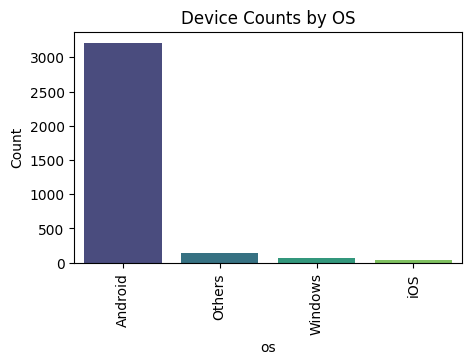

In [377]:
# Examine devices by OS
print_simple_count_barplot(df_eda, 'os', 5, 3, 'Device Counts by OS')

**OBSERVATIONS**

* Android devices are very popular, while IOS devices are least popular.


####screen_size          
We can see that there are a wide range of screen sizes in our dataset.
The smallest one is 5.08cm while the largest is 30.71cm.

Assumption: Since we did not receive discrete width and height, this analysis assumes screen size measures the diagonal screen.

Screen size would make a good bivariate analysis series, so we can see what other factors influence, or are influenced by, screen size.

In [378]:
print('There are', df_eda['screen_size'].nunique(), 'different sizes of screens in the dataset.')
print('Smallest is', df_eda['screen_size'].min())
print('Largest is', df_eda['screen_size'].max())
print('Screen size counts:', df_eda['screen_size'].value_counts())
print('% Screen size counts:', df_eda['screen_size'].value_counts(normalize=True))


There are 142 different sizes of screens in the dataset.
Smallest is 5.08
Largest is 30.71
Screen size counts: screen_size
12.70    575
12.83    409
10.29    219
10.16    188
15.24    129
        ... 
17.40      1
15.82      1
14.53      1
16.15      1
14.81      1
Name: count, Length: 142, dtype: int64
% Screen size counts: screen_size
12.70    0.166474
12.83    0.118413
10.29    0.063405
10.16    0.054430
15.24    0.037348
           ...   
17.40    0.000290
15.82    0.000290
14.53    0.000290
16.15    0.000290
14.81    0.000290
Name: proportion, Length: 142, dtype: float64


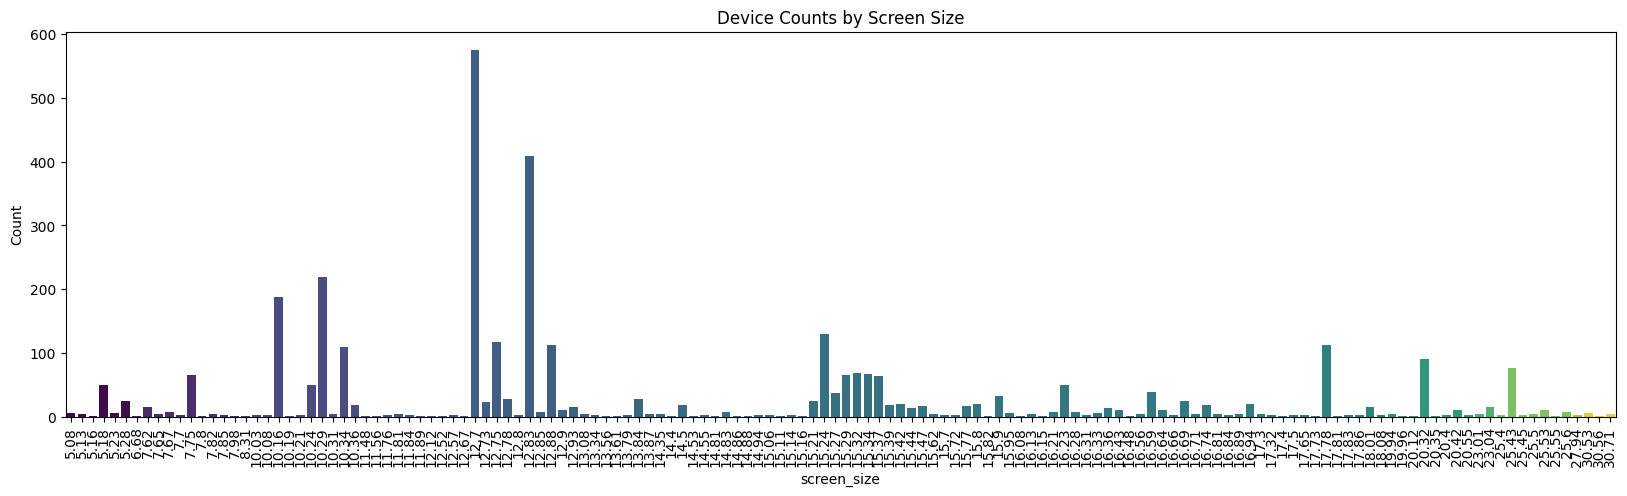

In [379]:
# Examine devices by screen size
print_simple_count_barplot(df_eda, 'screen_size', 20, 5, 'Device Counts by Screen Size')


**OBSERVATIONS**

* 142 different sizes of screens exist.
* Smallest is 5.08 cm.
* Largest is 30.71 cm.
* About 27% of devices have screens larger than 10cm.
* Most popular screen size is between 12.7 cm and 12.9 cm.

For screen_size :
 * Mean = 13.713115228720325
 * Median = 12.83
 * Range = 5.08 to 30.71 ( 25.63 )
 * Distribution is skewed to the right.

####4g / 5g                 

It's possible that the availabiity of 4G vs. 5G is related when when the device was released. We can examine this later in our bivariate analysis.


In [380]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
 15  id  

In [381]:
# Define a function to apply to each row
def determine_g_type(row):
    if row['4g'] == 'yes' and row['5g'] == 'yes':
        return '4g and 5g'
    elif row['4g'] == 'yes' and row['5g'] == 'no':
        return '4g'
    elif row['4g'] == 'no' and row['5g'] == 'yes':
        return '5g'
    else:
        return 'Not 4g or 5g'

In [382]:
# Apply the function to create the new column 'g_type'
df_eda['g_type'] = df_eda.apply(determine_g_type, axis=1)
print('Device row count:', df_eda['g_type'].count())
print('Connection types by value count:', df_eda['g_type'].value_counts())
print('% Connection types by value:', df_eda['g_type'].value_counts(normalize=True))

Device row count: 3454
Connection types by value count: g_type
4g              2183
Not 4g or 5g    1119
4g and 5g        152
Name: count, dtype: int64
% Connection types by value: g_type
4g              0.632021
Not 4g or 5g    0.323972
4g and 5g       0.044007
Name: proportion, dtype: float64


In [383]:
df_eda

brand_name       os  screen_size   4g   5g  main_camera_mp  \
0         Honor  Android        14.50  yes   no            13.0   
1         Honor  Android        17.30  yes  yes            13.0   
2         Honor  Android        16.69  yes  yes            13.0   
3         Honor  Android        25.50  yes  yes            13.0   
4         Honor  Android        15.32  yes   no            13.0   
...         ...      ...          ...  ...  ...             ...   
3449       Asus  Android        15.34  yes   no             NaN   
3450       Asus  Android        15.24  yes   no            13.0   
3451    Alcatel  Android        15.80  yes   no            13.0   
3452    Alcatel  Android        15.80  yes   no            13.0   
3453    Alcatel  Android        12.83  yes   no            13.0   

      selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
0                  5.0        64.0  3.0   3020.0   146.0          2020   
1                 16.0       128.0  8.0   4300.0   213.0          2020   
2                  8.0       128.0  8.0   4200.0   213.0          2020   
3                  8.0        64.0  6.0   7250.0   480.0          2020   
4                  8.0        64.0  3.0   5000.0   185.0          2020   
...                ...         ...  ...      ...     ...           ...   
3449               8.0        64.0  6.0   5000.0   190.0          2019   
3450               8.0       128.0  8.0   4000.0   200.0          2018   
3451               5.0        32.0  3.0   4000.0   165.0          2020   
3452               5.0        32.0  2.0   4000.0   160.0          2020   
3453               5.0        16.0  2.0   4000.0   168.0          2020   

      days_used  normalized_used_price  normalized_new_price    id  counter  \
0           127               4.307572              4.715100     0        1   
1           325               5.162097              5.519018     1        1   
2           162               5.111084              5.884631     2        1   
3           345               5.135387              5.630961     3        1   
4           293               4.389995              4.947837     4        1   
...         ...                    ...                   ...   ...      ...   
3449        232               4.492337              6.483872  3449        1   
3450        541               5.037732              6.251538  3450        1   
3451        201               4.357350              4.528829  3451        1   
3452        149               4.349762              4.624188  3452        1   
3453        176               4.132122              4.279994  3453        1   

         g_type  
0            4g  
1     4g and 5g  
2     4g and 5g  
3     4g and 5g  
4            4g  
...         ...  
3449         4g  
3450         4g  
3451         4g  
3452         4g  
3453         4g  

[3454 rows x 18 columns]

<Axes: xlabel='count', ylabel='g_type'>

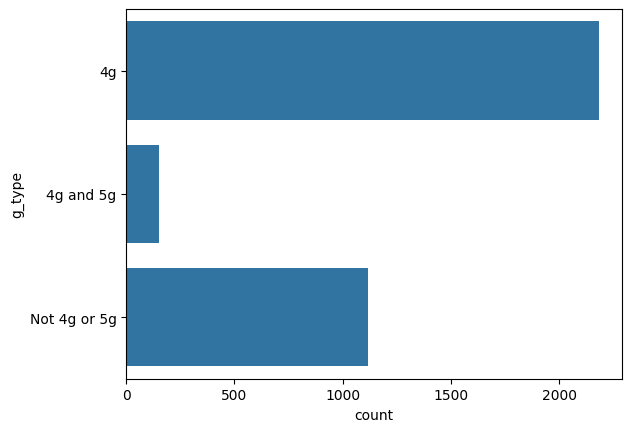

In [384]:
# Examine devices by 4G/5G
sns.countplot(df_eda['g_type'])

**OBSERVATIONS**

* 4g devices are most popular and comprise 63% of all used devices.
* A few devices support both 4g and 5g (4%)
* However, many devices support neither 4g nor 5g (32%).

####main_camera_mp / selfie_camera_mp

Cameras are an important feature for most users, and have seen many improvements over the years.
* On average, the main camera has higher MP resolution than the selfie camera
  * Main: 9.5 on average, with 50% having a MP value of 8.0 MP
  * Selfie: 6.6 on average, with 50% having a MP value of 5 MP

We can later validate if release year impacts camera quality by later doing some bivariate analysis.

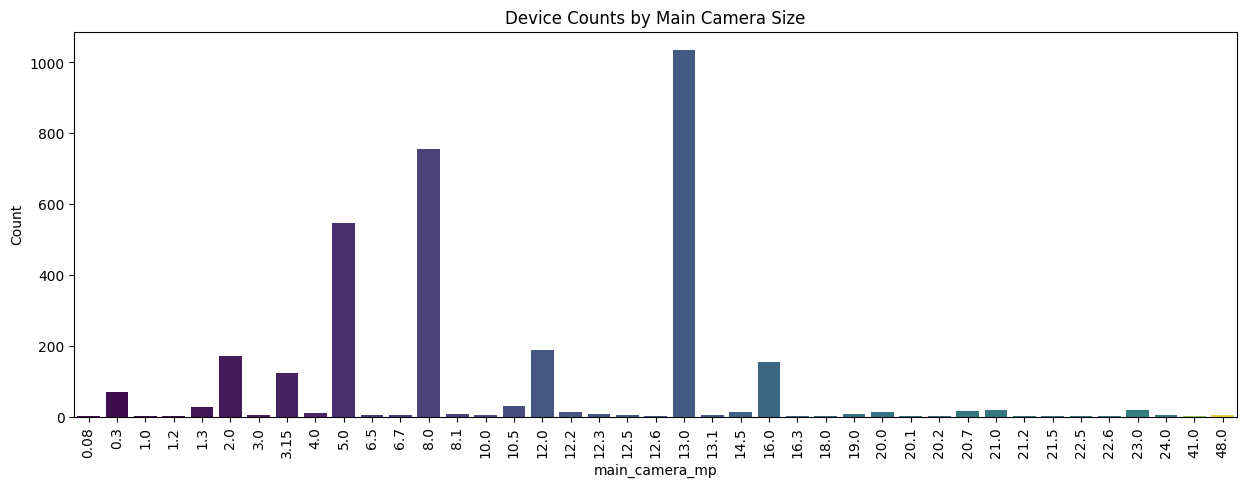

In [385]:
# Examine devices by main camera resolution
print_simple_count_barplot(df_eda, 'main_camera_mp', 15, 5, 'Device Counts by Main Camera Size')

**OBSERVATIONS**

* The most popular main camera MP resolution is 13 MP.
* There is a significant gap between the next two most popular resolutions of 8 MP and 5 MP.
* A few outliers with very high or very low MP resolution exist.

For main_camera_mp :
 * Mean = 9.460207633587787
 * Median = 8.0
 * Range = 0.08 to 48.0 ( 47.92 )
 * Distribution is skewed to the right.
 main_camera_mp

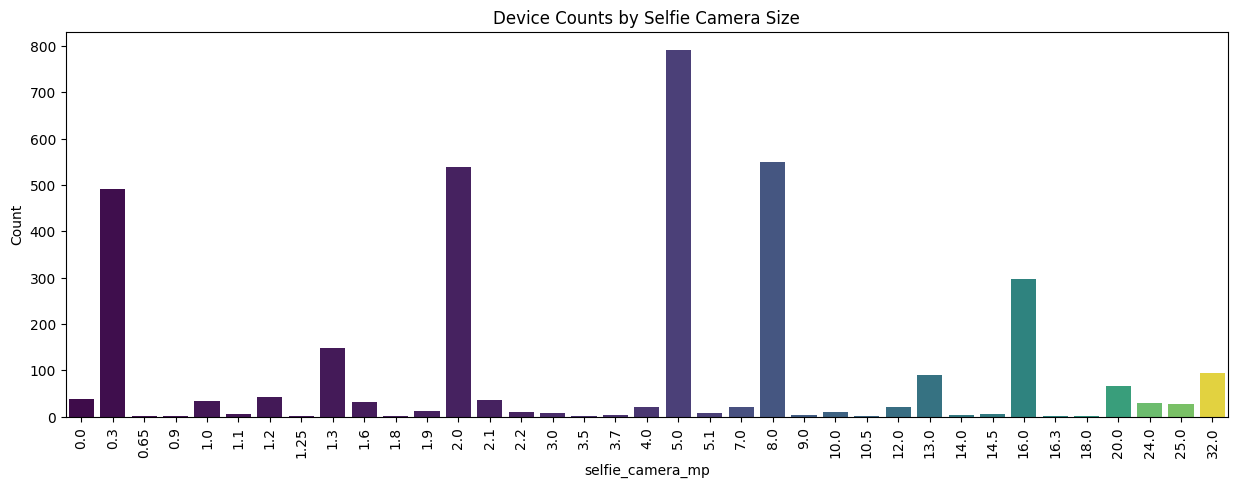

In [386]:
# Examine devices by selfie camera resolution
print_simple_count_barplot(df_eda, 'selfie_camera_mp', 15, 5, 'Device Counts by Selfie Camera Size')

**OBSERVATIONS**

* The most popular selfie camera MP resolution is 5 MP (less than half the resolution of the primary camera).
* Other popular resolutions are 16 MP, 8 MP, 5 MP and 2 MP. Another popular resolution is .3 MP, which is interesting.
* Buyers seem to want higher resolution in main cameras than selfie cameras.
* A few outliers exist.

For selfie_camera_mp :
 * Mean = 6.554229432213209
 * Median = 5.0
 * Range = 0.0 to 32.0 ( 32.0 )
 * Distribution is skewed to the right.

####int_memory           


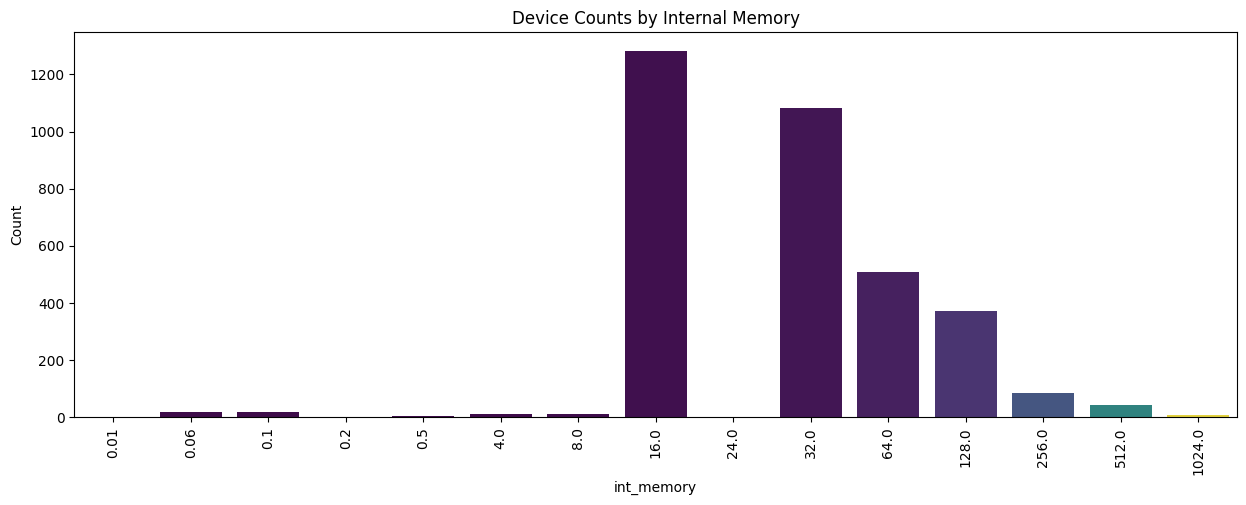

In [387]:
# Examine devices by internal memory
print_simple_count_barplot(df_eda, 'int_memory', 15, 5, 'Device Counts by Internal Memory')

**OBSERVATIONS**

* Memory has a very wide range of values and may have outliers we need to examine later.
* On average, devices have 54 GB RAM - but the median is only 32 GB.
* Despite this, 16 GB and 32 GB are the most common device.

For int_memory :
 * Mean = 54.57309855072464
 * Median = 32.0
 * Range = 0.01 to 1024.0 ( 1023.99 )
 * Distribution is skewed to the right.


####ram                  


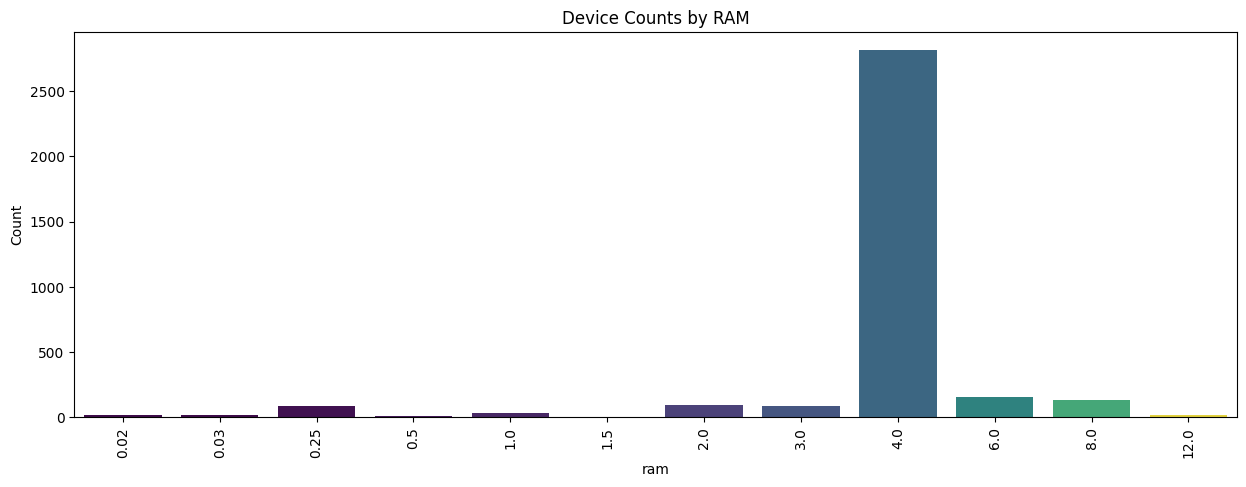

In [388]:
# Examine devices by RAM
print_simple_count_barplot(df_eda, 'ram', 15, 5, 'Device Counts by RAM')

**OBSERVATIONS**

* RAM has a wide range of values, but the distribution is fairly normal. Therefore we may have a few outliers, but not many.
* Most devices have 4 GB RAM.

For ram :
 * Mean = 4.036121739130435
 * Median = 4.0
 * Range = 0.02 to 12.0 ( 11.98 )
 * Distribution is essentially normal.

####battery              


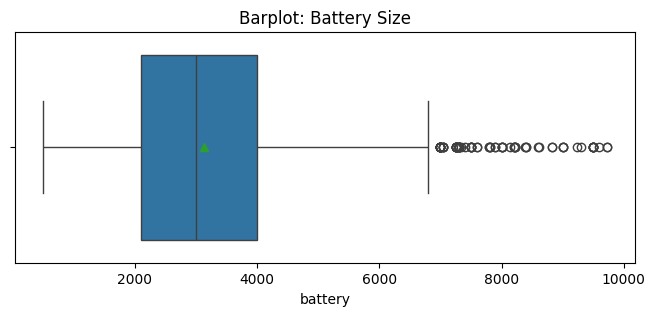

In [389]:
# Examine devices by battery size
print_boxplot(df_eda, 'battery', 8, 3, 'Barplot: Battery Size')

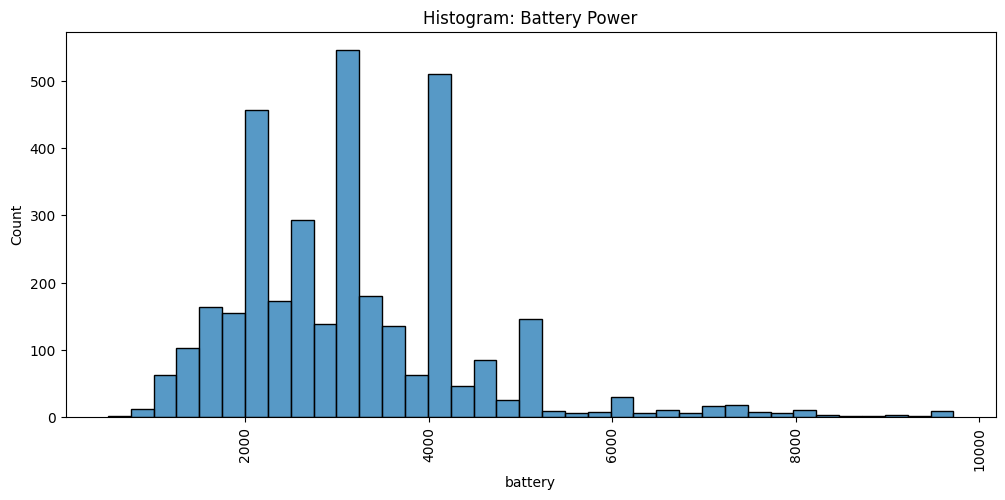

In [390]:
print_histogram(df_eda, df_eda['battery'], 12, 5, 'Histogram: Battery Power', hue=None, bins=None)

**OBSERVATIONS**

* Most devices have a battery level near 3000.
* However, a wide range of battery levels exist, especially at higher powers.
* Because the battery provides critical power to the device, it's likely that battery has a strong correlation with other features that we can examine later.

For battery :
 * Mean = 3133.402697215777
 * Median = 3000.0
 * Range = 500.0 to 9720.0 ( 9220.0 )
 * Distribution is skewed to the right.

####weight               

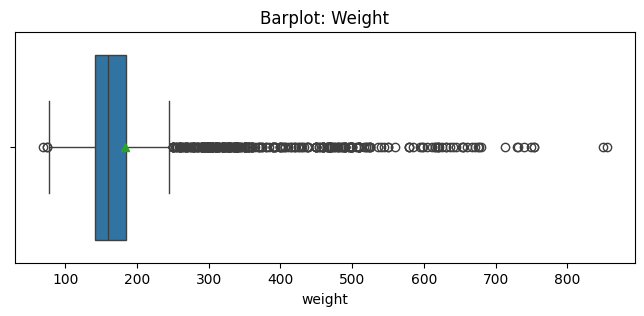

In [391]:
# Examine devices by weight
print_boxplot(df_eda, 'weight', 8, 3, 'Barplot: Weight')

**OBSERVATIONS**

* The majority of phones are lighter (around 160 to 182 grams).
* Of all features, this one has the most evident outliers as weight increases.
* Like battery power, we should seek to understand what drives variation in weight.

For weight :
 * Mean = 182.75187119234116
 * Median = 160.0
 * Range = 69.0 to 855.0 ( 786.0 )
 * Distribution is highly skewed to the right.


####release_year         

**OBSERVATIONS**

Our dataset covers a 7-year period. Because of technology advances, we will almost certainly find correlations between certain features and older vs. newer devices.

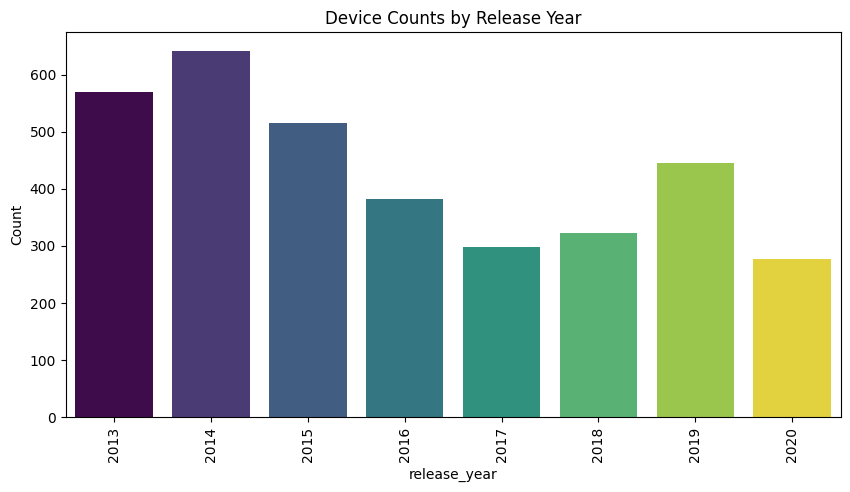

In [392]:
# Examine devices by Release Year
print_simple_count_barplot(df_eda, 'release_year', 10, 5, 'Device Counts by Release Year')

**OBSERVATIONS**

* Fewer devices were released between 2016 and 2018 than other years.
* More devices were released in 2013 and 2014 than any other year.
* 2014 was a key mobile device adoption year, when we saw mobile device use surpass desktop PC usage.
* What factors could be contributing to fewer device purchases in 2017 and 2020? Likely Covid was a factor during 2020.

For release_year :
 * Mean = 2015.965257672264
 * Median = 2015.5
 * Range = 2013 to 2020 ( 7 )
 * Distribution is skewed to the right.

####days_used            

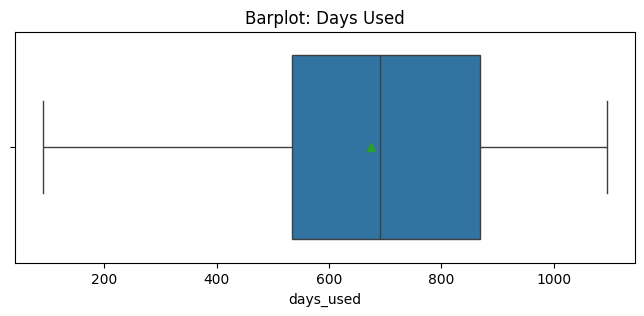

In [393]:
# Examine devices by days used
print_boxplot(df_eda, 'days_used', 8, 3, 'Barplot: Days Used')

**OBSERVATIONS**

* Most devices are used for between 674 and 690 days, or a little under 2 years. This is key information, as we may be able to predict when devices come onto the market.

For days_used :
 * Mean = 674.8697162709901
 * Median = 690.5
 * Range = 91 to 1094 ( 1003 )
 * Distribution is skewed to the left.

####normalized_used_price

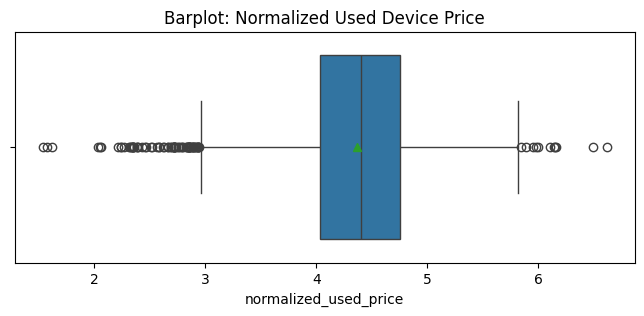

In [394]:
# Examine devices by used price
print_boxplot(df_eda, 'normalized_used_price', 8, 3, 'Barplot: Normalized Used Device Price')

**OBSERVATIONS**

* Used phone prices are very low, with an average price of 4.36.
* Later, we can check to see which variables correlate with price.

For normalized_used_price :
 * Mean = 4.364712079133227
 * Median = 4.405132623388357
 * Range = 1.536867219599265 to 6.619433001642933 ( 5.083 )
 * Distribution is skewed to the left.

####normalize_new_price

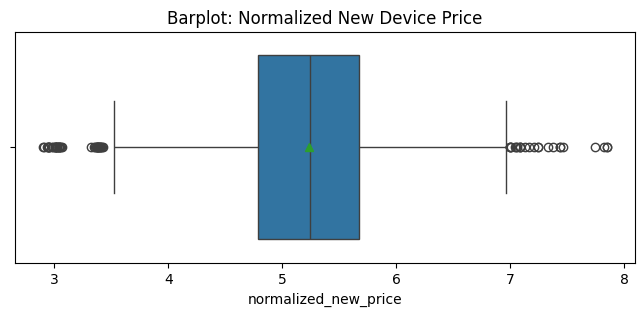

In [395]:
# Examine devices by new price
print_boxplot(df_eda, 'normalized_new_price', 8, 3, 'Barplot: Normalized New Device Price')

**OBSERVATIONS**

* New devices have an average price higher than used devices.
* We should validate that this dataset is accurate, as prices in the single digits are suspect. Most electronic devices cost at least several hundred dollars.

For normalized_new_price :
 * Mean = 5.233107171901414
 * Median = 5.2458918493708575
 * Range = 2.9014215940827497 to 7.847840659422009 ( 4.946 )
 * Distribution is skewed to the left.

### Bivariate Analysis

Let's check the correlations between variables as we start to compare features and see what we can find out about their relationships.

* Release year and Internal Hardware Components
* Release year and Price
* 4G/5G Connectivity and Price
* Internal Hardware Components and Price
* Camera Components and Price
* Screen Size and Price
* Screen Size and Weight
* Battery and Weight
* Usage Days and Price by Brand

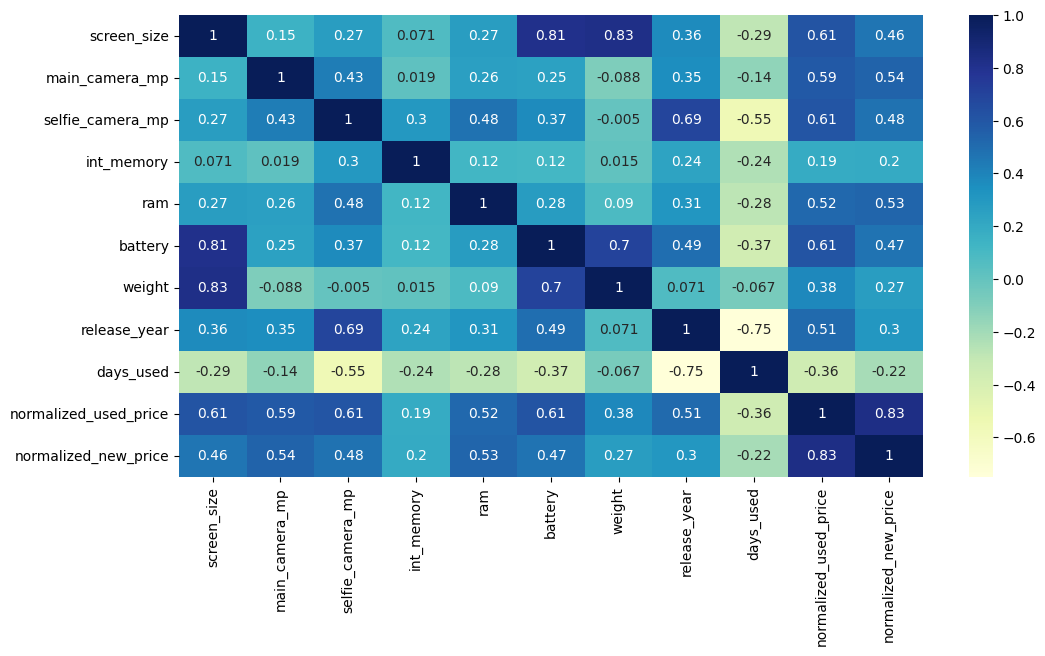

In [396]:
# Let's check numerical variable correlations

col_list = df.select_dtypes(exclude=['object']).columns.to_list()
plt.figure(figsize=(12, 6))
sns.heatmap(df[col_list].corr(), annot=True, cmap='YlGnBu')
plt.show()


In [397]:
# Show as pairplots
sns.pairplot(df, diag_kind="kde")

Output hidden; open in https://colab.research.google.com to view.

####Release Year and Internal Hardware Components

Let's next look at hardware and how it has changed over the years.
Specifically, let's look at RAM, internal memory, battery power and weight.




In [398]:
# First, let's group the data by year for ram, battery, weight, internal memory.
df_eda_ram = df_eda.copy()
df_eda_intmem = df_eda.copy()
df_eda_batt = df_eda.copy()
df_eda_weight = df_eda.copy()

# For this we'll want to use medians vs means, so outliers don't have as much of an impact.
df_eda_ram = df_eda.groupby('release_year')['ram'].median().reset_index() # reset_index is needed to convert the resulting series to a dataframe
df_eda_intmem = df_eda.groupby('release_year')['int_memory'].median().reset_index()
df_eda_batt = df_eda.groupby('release_year')['battery'].median().reset_index()
df_eda_weight = df_eda.groupby('release_year')['weight'].median().reset_index()

# Example dictionary of DataFrames
df_to_chart = {
   'df_eda_ram': df_eda_ram
  ,'df_eda_intmem': df_eda_intmem
  ,'df_eda_batt': df_eda_batt
  ,'df_eda_weight': df_eda_weight
  }
arr_charts = ['df_eda_ram','df_eda_intmem','df_eda_batt','df_eda_weight']

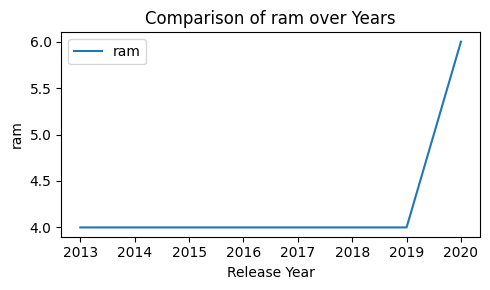

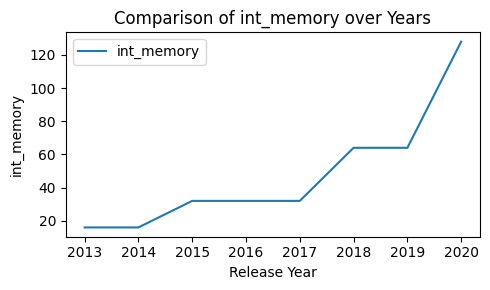

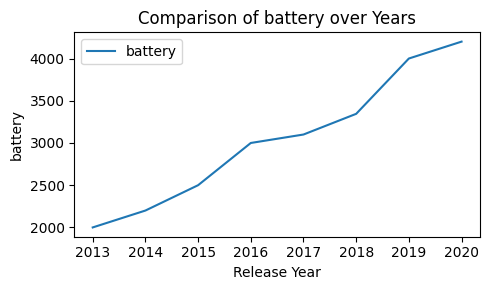

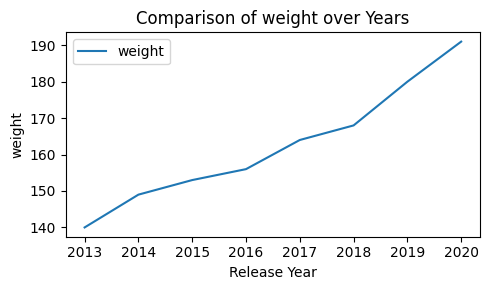

In [399]:
# Loop through each chart
for chart in arr_charts:

    this_df = df_to_chart[chart]

    plt.figure(figsize=(5, 3))
    sns.lineplot(data=this_df, x='release_year', y=this_df.columns[1], label=this_df.columns[1])

    plt.xlabel('Release Year')
    plt.ylabel(this_df.columns[1])
    plt.title(f'Comparison of {this_df.columns[1]} over Years')

    plt.legend()

    plt.grid(False)
    plt.tight_layout()
    plt.show()


OBSERVATIONS

* Except for RAM, the median values for these hardware component metrics steadily increased each year.
* For RAM, the median remained steady until 2019, and jumped significantly. It could be a major development was made in the industry.

####Release Year and Price

Let's see how the prices have varied over the years.

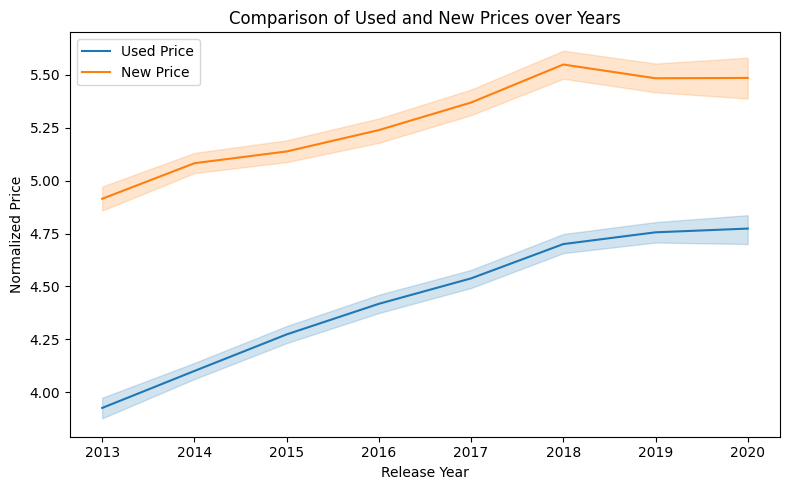

In [400]:
# Plot release year against normalized prices
plt.figure(figsize=(8, 5))
sns.lineplot(data=df, x='release_year', y='normalized_used_price', label='Used Price')
sns.lineplot(data=df, x='release_year', y='normalized_new_price', label='New Price')

# Add labels and title
plt.xlabel('Release Year')
plt.ylabel('Normalized Price')
plt.title('Comparison of Used and New Prices over Years')

# Show legend
plt.legend()

# Show plot
plt.grid(False)
plt.tight_layout()
plt.show()

**OBSERVATIONS**

* New and used device prices track similarly year over year and have steadily increased.
* New and used device prices plateaued in 2018.

####4G/5G Connectivity and Price

Let's check 4G and 5G connectivity and see how this compares with price.



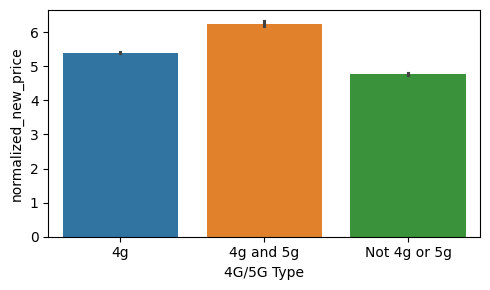

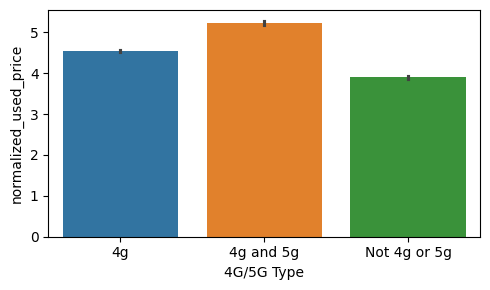

In [401]:
# Loop through each device with a bar chart

arr_prices = ['normalized_new_price', 'normalized_used_price']

for price in arr_prices:

  # Create a barplot
  plt.figure(figsize=(5, 3))
  sns.barplot(data=df_eda, x=df_eda['g_type'], y=df_eda[price], hue=df_eda['g_type'])

  # Add labels and title
  plt.xlabel('4G/5G Type')
  plt.ylabel(price)

  # Show plot
  plt.grid(False)
  plt.tight_layout()
  plt.show()

**OBSERVATIONS**

* Devices that support both 4G and 5G tend to cost a little more.
* Devices that do not support either 4G or 5G tend to cost a little less.
* Overall, the relationship between the connection type and price are similar for both new and used devices.

####Internal Hardware Components and Price

What hardware contributes most to the price of a device? Let's examine the same hardware here that we did earlier.

ram and normalized_new_price Comparison


<Figure size 500x300 with 0 Axes>

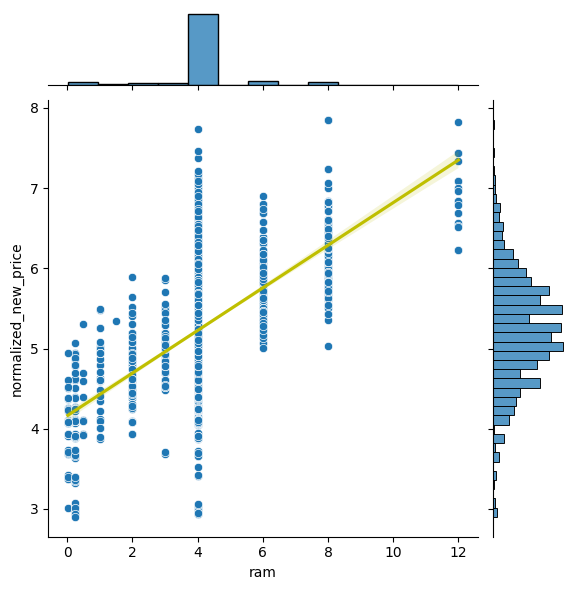

int_memory and normalized_new_price Comparison


<Figure size 500x300 with 0 Axes>

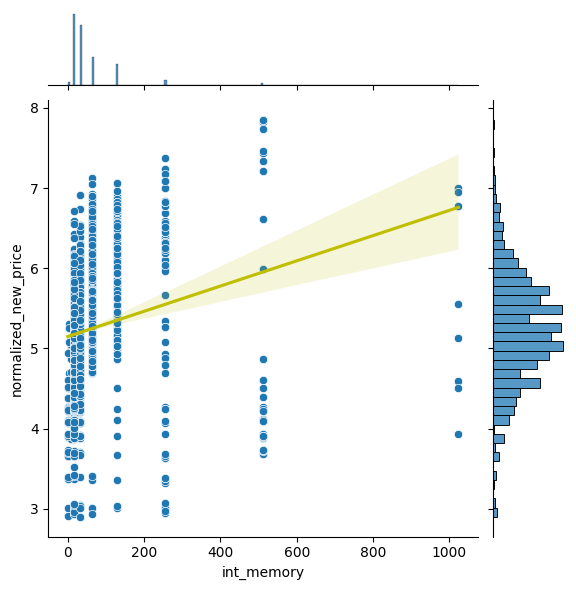

battery and normalized_new_price Comparison


<Figure size 500x300 with 0 Axes>

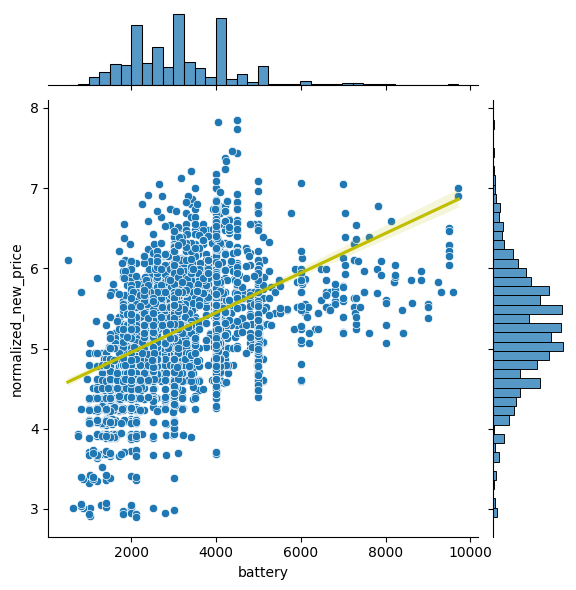

weight and normalized_new_price Comparison


<Figure size 500x300 with 0 Axes>

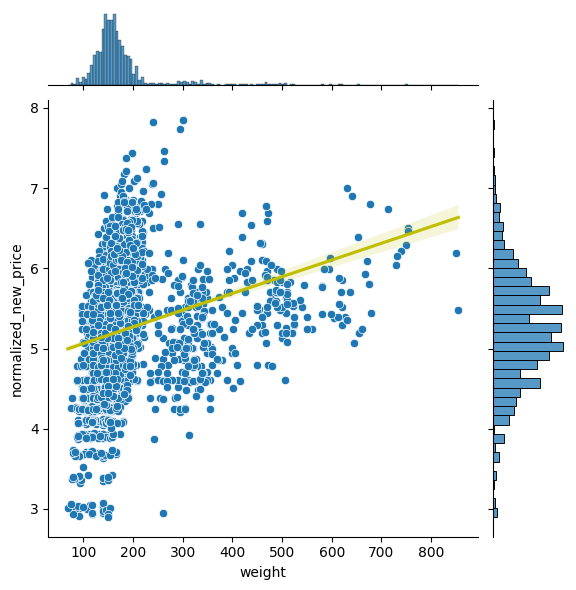

ram and normalized_used_price Comparison


<Figure size 500x300 with 0 Axes>

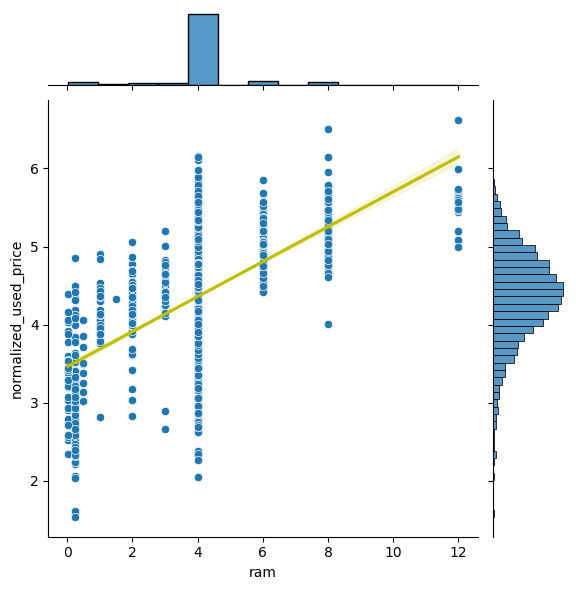

int_memory and normalized_used_price Comparison


<Figure size 500x300 with 0 Axes>

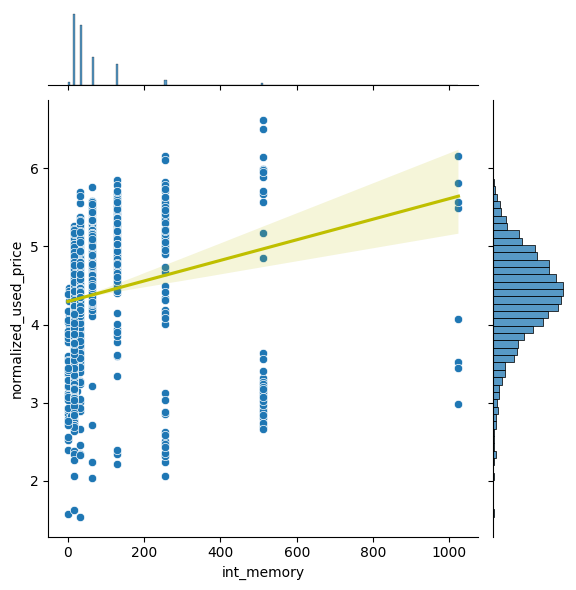

battery and normalized_used_price Comparison


<Figure size 500x300 with 0 Axes>

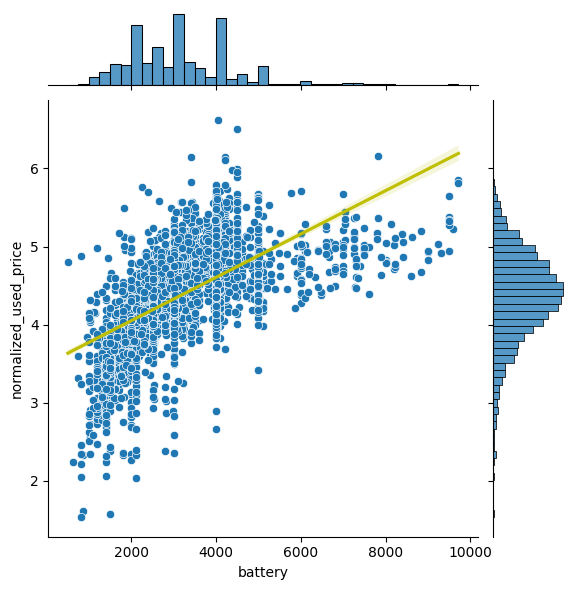

weight and normalized_used_price Comparison


<Figure size 500x300 with 0 Axes>

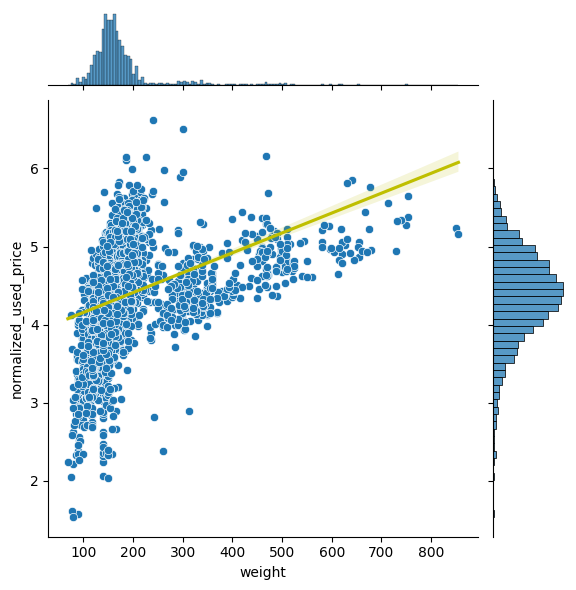

In [402]:
# Loop through each device with a jointplot chart

arr_prices = ['normalized_new_price','normalized_used_price']
arr_charts = ['ram','int_memory','battery','weight']

for price in arr_prices:

  for chart in arr_charts:

    # Create a jointplot
    plt.figure(figsize=(5, 3))
    jointplot = sns.jointplot(data=df_eda, x=df_eda[chart], y=df_eda[price])

    # Add regression line (trendline) using regplot
    # Here, ax refers to axes
    sns.regplot(data=df_eda_batt, x=df_eda[chart], y=df_eda[price], ax=jointplot.ax_joint, scatter=False, color='y')

    print(chart,'and', price, 'Comparison')
    plt.show()



**OBSERVATIONS**

* In general, for both new and used devices, the price increases somewhat proportionally with the size/power of the hardware component.
* Although we cannot compare these directly due to differences in scale, the increase seems to be steepest for RAM.
* RAM and internal memory seem to have stronger clusters of values for each stepped increase of value than the other components.


####Camera Components and Price

Let's next look at camera resolution for both types of cameras




main_camera_mp and normalized_new_price Comparison


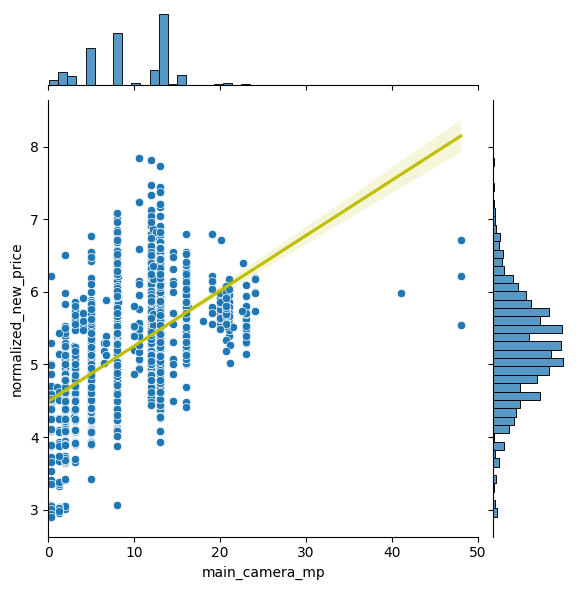

<Figure size 500x300 with 0 Axes>

selfie_camera_mp and normalized_new_price Comparison


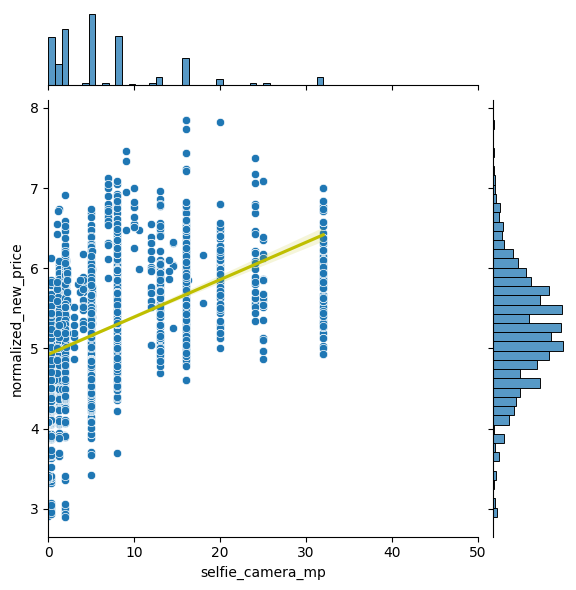

<Figure size 500x300 with 0 Axes>

main_camera_mp and normalized_used_price Comparison


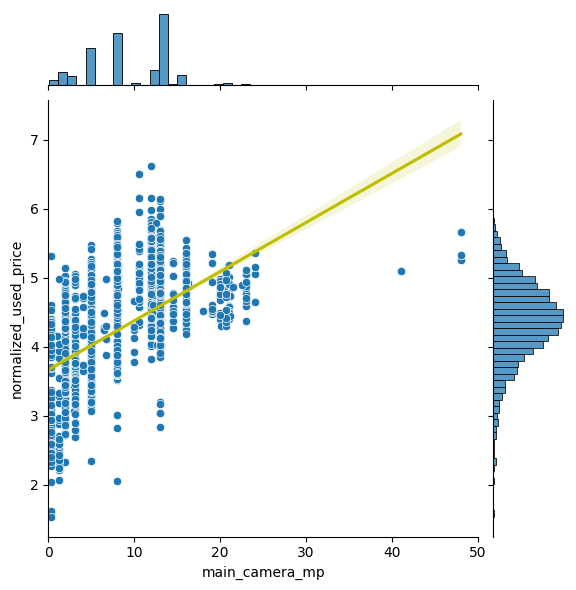

<Figure size 500x300 with 0 Axes>

selfie_camera_mp and normalized_used_price Comparison


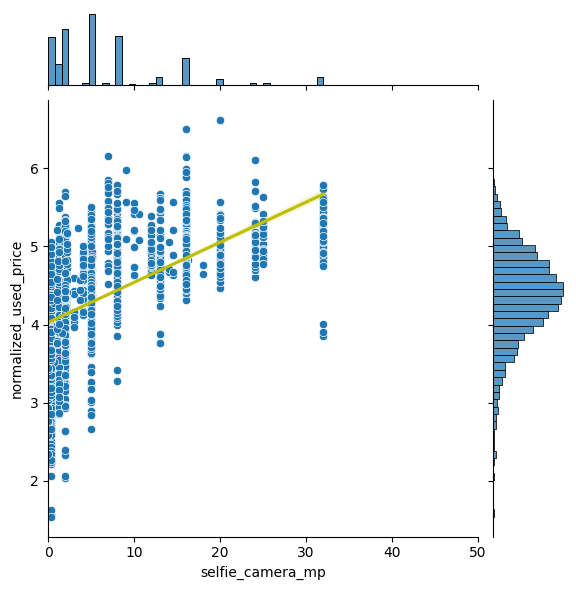

<Figure size 500x300 with 0 Axes>

In [403]:
# Loop through each device with a jointplot chart

arr_prices = ['normalized_new_price', 'normalized_used_price']
arr_charts = ['main_camera_mp', 'selfie_camera_mp']

for price in arr_prices:

    for chart in arr_charts:
        # Create a jointplot
        jointplot = sns.jointplot(data=df_eda, x=df_eda[chart], y=df_eda[price])

        plt.figure(figsize=(5, 3))

        # Add regression line (trendline) using regplot
        sns.regplot(data=df_eda, x=df_eda[chart], y=df_eda[price], ax=jointplot.ax_joint, scatter=False, color='y')

        # Set x-axis limit to 50
        jointplot.ax_joint.set_xlim(0, 50)

        print(chart, 'and', price, 'Comparison')
        plt.show()



**OBSERVATIONS**

* Price tends to increase with camera resolution.
* The increase seems consistent for both the main camera and selfie.

####Screen Size and Price

Similarly, let's examine screen size with regard to price.

Screen size and normalized_new_price Comparison


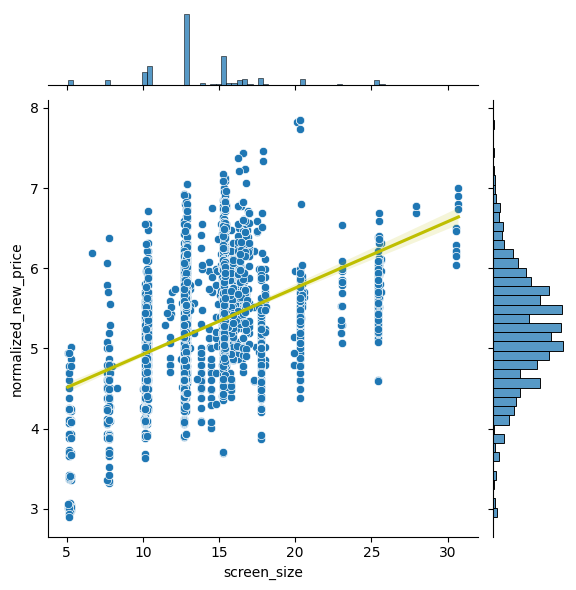

<Figure size 500x300 with 0 Axes>

Screen size and normalized_used_price Comparison


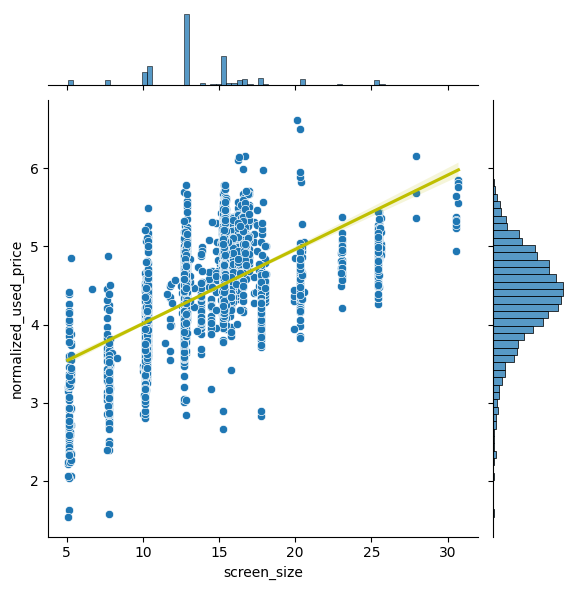

<Figure size 500x300 with 0 Axes>

In [404]:
# Loop through each device with a jointplot chart

arr_prices = ['normalized_new_price','normalized_used_price']

for price in arr_prices:

  # Create a jointplot
  jointplot = sns.jointplot(data=df_eda, x=df_eda['screen_size'], y=df_eda[price])

  plt.figure(figsize=(5, 3))

  # Add regression line (trendline) using regplot
  # Here, ax refers to axes
  sns.regplot(data=df_eda_batt, x=df_eda['screen_size'], y=df_eda[price], ax=jointplot.ax_joint, scatter=False, color='y')

  print('Screen size and', price, 'Comparison')
  plt.show()



**OBSERVATIONS**

* Screen size seems to consistently impact price in the same way for both new and used devices.

####Screen Size and Weight

Similarly, how are screen size and weight related?


Screen Size and Weight Comparison


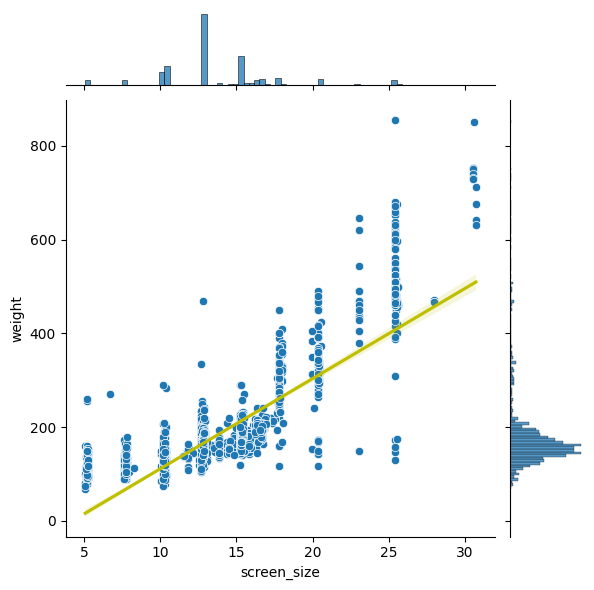

In [405]:
# Create a jointplot
jointplot = sns.jointplot(data=df_eda, x=df_eda['screen_size'], y=df_eda['weight'])

# Add regression line (trendline) using regplot
# Here, ax refers to axes
sns.regplot(data=df_eda, x=df_eda['screen_size'], y=df_eda['weight'], ax=jointplot.ax_joint, scatter=False, color='y')

print('Screen Size and Weight Comparison')
plt.show()


**OBSERVATIONS**

* Weight seems much more directly correlated to screen size than battery, based on this visualization. We can evaluate this later during our linear regression.
* Most devices seem to have a weight of approximately 150 to 200 grams, and a screen size close to 12 cm.  


####Battery and Weight

How do battery and weight compare? Knowing that batteries are heavy, we can expect to find some sort of correlation that we can later test.



Battery and Weight Comparison


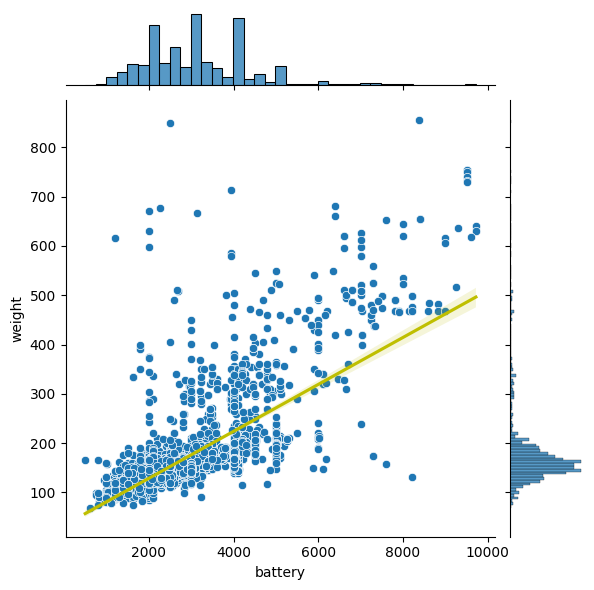

In [406]:
# Create a jointplot
jointplot = sns.jointplot(data=df_eda, x=df_eda['battery'], y=df_eda['weight'])

# Add regression line (trendline) using regplot
# Here, ax refers to axes
sns.regplot(data=df_eda, x=df_eda['battery'], y=df_eda['weight'], ax=jointplot.ax_joint, scatter=False, color='y')

print('Battery and Weight Comparison')
plt.show()


**OBSERVATIONS**

* Weight appears to increase proportionally with battery size/power.
* Similar to what we noted earlier during univariate analysis, most device weights fall between 100 and 200 grams.
* Battery power for this cluster of weights varies more widely, and could be due to differences across brands or screen sizes.


####Usage Days and Price

How is price impacted over time based on number of days a device is used before resale?

In [407]:
# Create groups with averages
df_usage_temp = df_eda # reset data

days_1_year = 365

# Add new columns to base dataframe
df_usage_temp['Price_Change'] = df_usage_temp['normalized_new_price'] - df_usage_temp['normalized_used_price']
df_usage_temp['Price_Loss_Per_Day']  = round(df_usage_temp['days_used']/days_1_year,5)
df_usage_temp

brand_name       os  screen_size   4g   5g  main_camera_mp  \
0         Honor  Android        14.50  yes   no            13.0   
1         Honor  Android        17.30  yes  yes            13.0   
2         Honor  Android        16.69  yes  yes            13.0   
3         Honor  Android        25.50  yes  yes            13.0   
4         Honor  Android        15.32  yes   no            13.0   
...         ...      ...          ...  ...  ...             ...   
3449       Asus  Android        15.34  yes   no             NaN   
3450       Asus  Android        15.24  yes   no            13.0   
3451    Alcatel  Android        15.80  yes   no            13.0   
3452    Alcatel  Android        15.80  yes   no            13.0   
3453    Alcatel  Android        12.83  yes   no            13.0   

      selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
0                  5.0        64.0  3.0   3020.0   146.0          2020   
1                 16.0       128.0  8.0   4300.0   213.0          2020   
2                  8.0       128.0  8.0   4200.0   213.0          2020   
3                  8.0        64.0  6.0   7250.0   480.0          2020   
4                  8.0        64.0  3.0   5000.0   185.0          2020   
...                ...         ...  ...      ...     ...           ...   
3449               8.0        64.0  6.0   5000.0   190.0          2019   
3450               8.0       128.0  8.0   4000.0   200.0          2018   
3451               5.0        32.0  3.0   4000.0   165.0          2020   
3452               5.0        32.0  2.0   4000.0   160.0          2020   
3453               5.0        16.0  2.0   4000.0   168.0          2020   

      days_used  normalized_used_price  normalized_new_price    id  counter  \
0           127               4.307572              4.715100     0        1   
1           325               5.162097              5.519018     1        1   
2           162               5.111084              5.884631     2        1   
3           345               5.135387              5.630961     3        1   
4           293               4.389995              4.947837     4        1   
...         ...                    ...                   ...   ...      ...   
3449        232               4.492337              6.483872  3449        1   
3450        541               5.037732              6.251538  3450        1   
3451        201               4.357350              4.528829  3451        1   
3452        149               4.349762              4.624188  3452        1   
3453        176               4.132122              4.279994  3453        1   

         g_type  Price_Change  Price_Loss_Per_Day  
0            4g      0.407528             0.34795  
1     4g and 5g      0.356921             0.89041  
2     4g and 5g      0.773547             0.44384  
3     4g and 5g      0.495574             0.94521  
4            4g      0.557843             0.80274  
...         ...           ...                 ...  
3449         4g      1.991534             0.63562  
3450         4g      1.213806             1.48219  
3451         4g      0.171479             0.55068  
3452         4g      0.274427             0.40822  
3453         4g      0.147872             0.48219  

[3454 rows x 20 columns]

In [408]:
# Group usage days and prices
df_usage_new_price = df_usage_temp.groupby('days_used')[['normalized_new_price']].mean().sort_values(by='normalized_new_price', ascending=False)
df_usage_used_price = df_usage_temp.groupby('days_used')[['normalized_used_price']].mean().sort_values(by='normalized_used_price', ascending=False)

# Merge them so we can chart it
df_usage_price = pd.merge(df_usage_new_price, df_usage_used_price, how='inner', on='days_used')
df_usage_price.rename(columns={'normalized_new_price':'New_Price'},inplace=True)
df_usage_price.rename(columns={'normalized_used_price':'Used_Price'},inplace=True)

In [409]:
# Create more groups with averages
df_days_used_daily_price_loss = df_usage_temp.groupby('days_used')[['Price_Loss_Per_Day']].mean().sort_values(by='Price_Loss_Per_Day', ascending=False)
df_days_used_price_margin = df_usage_temp.groupby('days_used')[['Price_Change']].mean().sort_values(by='Price_Change', ascending=False)

# Merge them
df_usage_price2 = pd.merge(df_days_used_daily_price_loss, df_days_used_price_margin, how='inner', on='days_used')
df_usage_price_final = pd.merge(df_usage_price, df_usage_price2, how='inner', on='days_used')

# Add an index for charting
df_usage_price_final['Usage_Days'] = df_usage_price_final.index

Next, we'll look at the rankings using our final dataset

*Resale Margin*

In [410]:
print('Price Difference by Usage Days: Highest Margin')
df_usage_price_final.sort_values(by='Price_Change', ascending=False).head(3)

Price Difference by Usage Days: Highest Margin


New_Price  Used_Price  Price_Loss_Per_Day  Price_Change  Usage_Days
days_used                                                                     
129         7.847841    5.959251             0.35342      1.888589         129
441         6.685561    4.885525             1.20822      1.800036         441
466         6.108914    4.515464             1.27671      1.593450         466

In [411]:
print('Price Difference by Usage Days: Lowest Margin')
df_usage_price_final.sort_values(by='Price_Change', ascending=True).head(3)

Price Difference by Usage Days: Lowest Margin


New_Price  Used_Price  Price_Loss_Per_Day  Price_Change  Usage_Days
days_used                                                                     
316         4.602166    4.555244             0.86575      0.046921         316
308         4.293742    4.240607             0.84384      0.053135         308
514         4.481985    4.406475             1.40822      0.075510         514

In [412]:
print('Daily Price Loss by Usage Days: Highest')
df_usage_price_final.sort_values(by='Price_Loss_Per_Day', ascending=False).head(3)

Daily Price Loss by Usage Days: Highest


New_Price  Used_Price  Price_Loss_Per_Day  Price_Change  Usage_Days
days_used                                                                     
1094        5.150131    4.405056             2.99726      0.745074        1094
1093        4.812588    3.790502             2.99452      1.022086        1093
1092        4.844134    3.581539             2.99178      1.262596        1092

In [413]:
print('Daily Price Loss by Usage Days: Lowest')
df_usage_price_final.sort_values(by='Price_Loss_Per_Day', ascending=True).head(3)

Daily Price Loss by Usage Days: Lowest


New_Price  Used_Price  Price_Loss_Per_Day  Price_Change  Usage_Days
days_used                                                                     
91          6.117573    5.009134             0.24932      1.108439          91
92          5.794791    4.872511             0.25205      0.922280          92
93          4.953430    4.322144             0.25479      0.631286          93

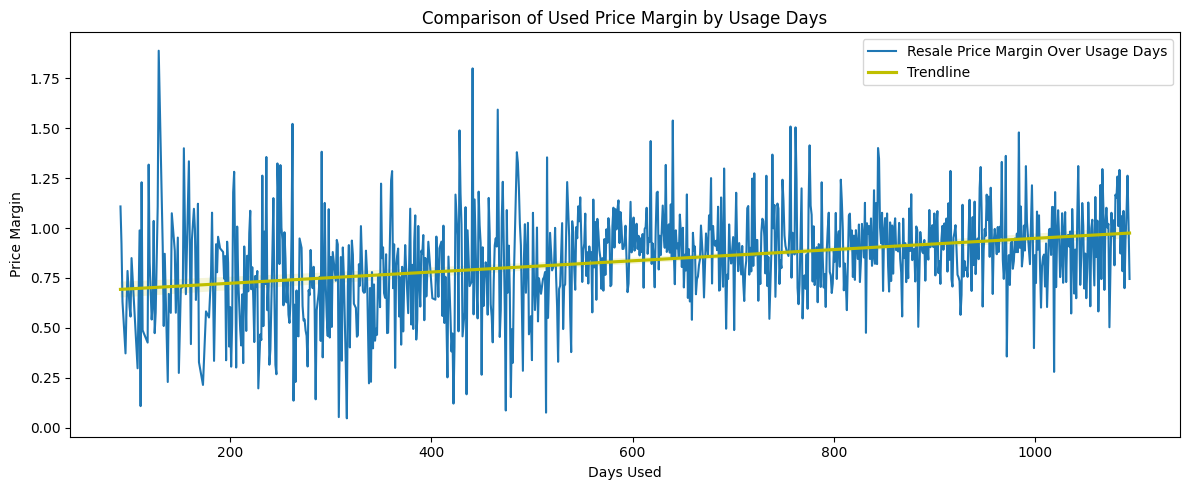

In [414]:
# Plot usage days against used price
plt.figure(figsize=(12, 5))

# Plot the line plot
sns.lineplot(data=df_usage_price_final, x='Usage_Days', y='Price_Change', label='Resale Price Margin Over Usage Days')

# Add regression line (trendline)
sns.regplot(data=df_usage_price_final, x='Usage_Days', y='Price_Change', scatter=False, color='y', label='Trendline')

# Add labels and title
plt.xlabel('Days Used')
plt.ylabel('Price Margin')
plt.title('Comparison of Used Price Margin by Usage Days')

# Show legend
plt.legend()

# Show plot
plt.grid(False)
plt.tight_layout()
plt.show()


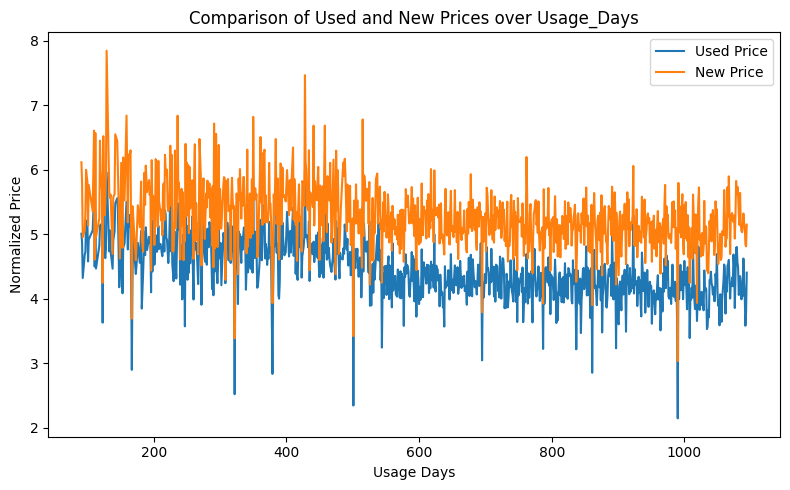

In [415]:
# Plot release year against normalized prices
plt.figure(figsize=(8, 5))
sns.lineplot(data=df_usage_price_final, x='Usage_Days', y='Used_Price', label='Used Price')
sns.lineplot(data=df_usage_price_final, x='Usage_Days', y='New_Price', label='New Price')

# Add labels and title
plt.xlabel('Usage Days')
plt.ylabel('Normalized Price')
plt.title('Comparison of Used and New Prices over Usage_Days')

# Show legend
plt.legend()

# Show plot
plt.grid(False)
plt.tight_layout()
plt.show()

In [416]:
days_in_year_1 = 365
days_in_year_2 = days_in_year_1*2

df_usage_price_final['Years_Owned'] = round(df_usage_price_final['Usage_Days']/days_in_year_1,1)
df_usage_price_final

New_Price  Used_Price  Price_Loss_Per_Day  Price_Change  \
days_used                                                            
129         7.847841    5.959251             0.35342      1.888589   
428         7.468045    5.978658             1.17260      1.489387   
159         6.840536    5.505982             0.43562      1.334554   
236         6.839637    5.483427             0.64658      1.356210   
350         6.821271    5.598496             0.95890      1.222775   
...              ...         ...                 ...           ...   
695         3.790026    3.044634             1.90411      0.745392   
167         3.690877    2.896464             0.45753      0.794413   
501         3.420346    2.343727             1.37260      1.076619   
322         3.386422    2.519308             0.88219      0.867114   
990         3.032232    2.144643             2.71233      0.887589   

           Usage_Days  Years_Owned  
days_used                           
129               129          0.4  
428               428          1.2  
159               159          0.4  
236               236          0.6  
350               350          1.0  
...               ...          ...  
695               695          1.9  
167               167          0.5  
501               501          1.4  
322               322          0.9  
990               990          2.7  

[924 rows x 6 columns]

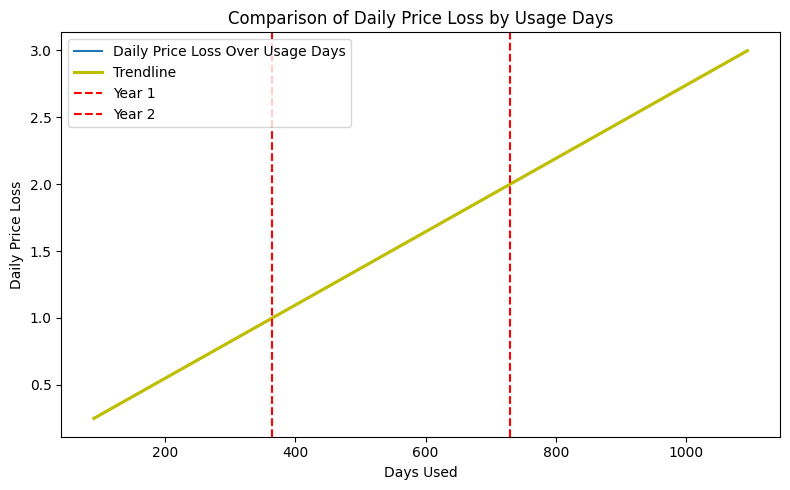

In [521]:
# Plot usage days against daily price decline
plt.figure(figsize=(8, 5))

# Plot the line plot
sns.lineplot(data=df_usage_price_final, x='Usage_Days', y='Price_Loss_Per_Day', label='Daily Price Loss Over Usage Days')

# Add regression line (trendline)
sns.regplot(data=df_usage_price_final, x='Usage_Days', y='Price_Loss_Per_Day', scatter=False, color='y', label='Trendline')

# Add a vertical line or marker point at specific usage_days
specific_usage_day = 365
plt.axvline(x=specific_usage_day, color='r', linestyle='--', label=f'Year 1')
specific_usage_day = specific_usage_day + 365
plt.axvline(x=specific_usage_day, color='r', linestyle='--', label=f'Year 2')

# Add labels and title
plt.xlabel('Days Used')
plt.ylabel('Daily Price Loss')
plt.title('Comparison of Daily Price Loss by Usage Days')

# Show legend
plt.legend()

# Show plot
plt.grid(False)
plt.tight_layout()
plt.show()


In [418]:
print('Usage Price Summary\n',df_usage_price_final.describe())


Usage Price Summary
         New_Price  Used_Price  Price_Loss_Per_Day  Price_Change   Usage_Days  \
count  924.000000  924.000000          924.000000    924.000000   924.000000   
mean     5.273695    4.432184            1.696145      0.841511   619.093074   
std      0.484553    0.449333            0.772320      0.250619   281.896733   
min      3.032232    2.144643            0.249320      0.046921    91.000000   
25%      4.983740    4.153367            1.029455      0.702564   375.750000   
50%      5.232301    4.398066            1.727400      0.864968   630.500000   
75%      5.523634    4.717175            2.359585      0.994842   861.250000   
max      7.847841    5.978658            2.997260      1.888589  1094.000000   

       Years_Owned  
count   924.000000  
mean      1.696537  
std       0.772951  
min       0.200000  
25%       1.000000  
50%       1.700000  
75%       2.400000  
max       3.000000  


In [419]:
print('Usage Price Summary: Year 1\n', df_usage_price_final[df_usage_price_final['Years_Owned'] <= 1].describe())

Usage Price Summary: Year 1
         New_Price  Used_Price  Price_Loss_Per_Day  Price_Change  Usage_Days  \
count  238.000000  238.000000          238.000000    238.000000  238.000000   
mean     5.493203    4.778216            0.683378      0.714987  249.432773   
std      0.591741    0.451698            0.223556      0.292120   81.597769   
min      3.386422    2.519308            0.249320      0.046921   91.000000   
25%      5.132392    4.550496            0.516440      0.497901  188.500000   
50%      5.477042    4.804029            0.694520      0.703206  253.500000   
75%      5.856398    5.053406            0.873285      0.898217  318.750000   
max      7.847841    5.959251            1.049320      1.888589  383.000000   

       Years_Owned  
count   238.000000  
mean      0.682773  
std       0.223318  
min       0.200000  
25%       0.500000  
50%       0.700000  
75%       0.900000  
max       1.000000  


In [420]:
df_usage_price_final_year_2 = df_usage_price_final[df_usage_price_final['Years_Owned'] > 1]
df_usage_price_final_year_2 = df_usage_price_final[df_usage_price_final['Years_Owned'] <= 2]
print('Usage Price Summary: Year 2\n', df_usage_price_final_year_2.describe())

Usage Price Summary: Year 2
         New_Price  Used_Price  Price_Loss_Per_Day  Price_Change  Usage_Days  \
count  580.000000  580.000000          580.000000    580.000000  580.000000   
mean     5.380288    4.583237            1.205735      0.797050  440.093103   
std      0.518618    0.446424            0.509220      0.271391  185.865436   
min      3.386422    2.343727            0.249320      0.046921   91.000000   
25%      5.059681    4.282004            0.769175      0.631978  280.750000   
50%      5.346689    4.573348            1.220550      0.817742  445.500000   
75%      5.684540    4.863963            1.652735      0.962092  603.250000   
max      7.847841    5.978658            2.049320      1.888589  748.000000   

       Years_Owned  
count   580.000000  
mean      1.205517  
std       0.508889  
min       0.200000  
25%       0.800000  
50%       1.200000  
75%       1.700000  
max       2.000000  


In [421]:
print('Usage Price Summary: Year 2\n', df_usage_price_final[df_usage_price_final['Usage_Days'] <= 365*2].describe())

Usage Price Summary: Year 2
         New_Price  Used_Price  Price_Loss_Per_Day  Price_Change  Usage_Days  \
count  562.000000  562.000000          562.000000    562.000000  562.000000   
mean     5.390387    4.596819            1.179462      0.793568  430.503559   
std      0.519932    0.444649            0.495316      0.272328  180.790227   
min      3.386422    2.343727            0.249320      0.046921   91.000000   
25%      5.071231    4.298228            0.756845      0.622818  276.250000   
50%      5.353698    4.596848            1.190410      0.815149  434.500000   
75%      5.700274    4.870444            1.615755      0.960177  589.750000   
max      7.847841    5.978658            2.000000      1.888589  730.000000   

       Years_Owned  
count   562.000000  
mean      1.180071  
std       0.496363  
min       0.200000  
25%       0.800000  
50%       1.200000  
75%       1.600000  
max       2.000000  


**OBSERVATION**

* Value for used devices declines on average .01 per day.
* Average difference between new and used devices is .84.
* Most devices have a difference of .99.
* Daily decline of a used device's price is steepest in the first year of ownership and largely plateaus after that.
* Because there are a wide variety of price margins, we should look into this further by checking values per brand.

####Usage Days and Price by Brand

Which brands hold the most resale value over time? How fast do brands lose value?

To figure this out, we can check the new and used prices by brand.

**Price Change by Brand over Time**

In [422]:
# Create groups with averages
df_brand_temp = df_eda # reset since re-runs appear to break this

# Add new columns to base dataframe
df_brand_temp['Price_Change'] = df_brand_temp['normalized_new_price'] - df_brand_temp['normalized_used_price']
df_brand_temp['Price_Loss_Per_Day']  = round(df_brand_temp['normalized_used_price']/df_brand_temp['days_used'],5)

# Group brand and prices
df_brand_new_price = df_brand_temp.groupby('brand_name')[['normalized_new_price']].mean().sort_values(by='normalized_new_price', ascending=False)
df_brand_used_price = df_brand_temp.groupby('brand_name')[['normalized_used_price']].mean().sort_values(by='normalized_used_price', ascending=False)

# Merge them so we can chart it
df_brand_price = pd.merge(df_brand_new_price, df_brand_used_price, how='inner', on='brand_name')
df_brand_price.rename(columns={'normalized_new_price':'New_Price'},inplace=True)
df_brand_price.rename(columns={'normalized_used_price':'Used_Price'},inplace=True)


In [423]:
# Create more groups with averages
df_brand_used_daily_price_loss = df_brand_temp.groupby('brand_name')[['Price_Loss_Per_Day']].mean().sort_values(by='Price_Loss_Per_Day', ascending=False)
df_brand_used_price_margin = df_brand_temp.groupby('brand_name')[['Price_Change']].mean().sort_values(by='Price_Change', ascending=False)

df_brand_usage_days = df_brand_temp.groupby('brand_name')[['days_used']].mean().sort_values(by='days_used', ascending=False)
df_brand_usage_days.rename(columns={'days_used':'Usage_Days'},inplace=True)

# Merge them
df_brand_price2 = pd.merge(df_brand_used_daily_price_loss, df_brand_used_price_margin, how='inner', on='brand_name')
df_brand_price3 = pd.merge(df_brand_price2, df_brand_usage_days, how='inner', on='brand_name')

In [424]:
# Merge both for our final set
df_brand_price_final = pd.merge(df_brand_price, df_brand_price3, how='inner', on='brand_name')

Next, we'll look at the rankings using our final dataset

*Resale Margin*

In [425]:
print('New vs. Used Price Difference by Brand: Highest Margin')
df_brand_price_final.sort_values(by='Price_Change', ascending=False).head(3)

New vs. Used Price Difference by Brand: Highest Margin


New_Price  Used_Price  Price_Loss_Per_Day  Price_Change  \
brand_name                                                            
Apple        6.339548    5.004553            0.009941      1.334995   
Google       6.077932    4.885651            0.011649      1.192281   
OnePlus      6.266780    5.152165            0.014474      1.114615   

            Usage_Days  
brand_name              
Apple       636.307692  
Google      519.200000  
OnePlus     513.000000

In [426]:
print('New vs. Used Price Difference by Brand: Lowest Margin')
df_brand_price_final.sort_values(by='Price_Change', ascending=True).head(3)

New vs. Used Price Difference by Brand: Lowest Margin


New_Price  Used_Price  Price_Loss_Per_Day  Price_Change  \
brand_name                                                            
Infinix      4.655516    4.391207            0.015724      0.264309   
Realme       5.082650    4.594316            0.017957      0.488334   
Xiaomi       5.364574    4.710581            0.011566      0.653993   

            Usage_Days  
brand_name              
Infinix     313.300000  
Realme      313.390244  
Xiaomi      545.386364

*Usage Days*

In [427]:
# Print results
print('Usage Days by Brand: Highest')
df_brand_price_final.sort_values(by='Usage_Days', ascending=False).head(3)

Usage Days by Brand: Highest


New_Price  Used_Price  Price_Loss_Per_Day  Price_Change  \
brand_name                                                            
Spice        4.453086    3.694512            0.004343      0.758574   
Microsoft    4.963936    4.205679            0.005061      0.758258   
Karbonn      4.582536    3.774956            0.004739      0.807580   

            Usage_Days  
brand_name              
Spice       881.233333  
Microsoft   853.636364  
Karbonn     823.413793

In [428]:
print('Usage Days by Brand: Lowest')
df_brand_price_final.sort_values(by='Usage_Days', ascending=True).head(3)

Usage Days by Brand: Lowest


New_Price  Used_Price  Price_Loss_Per_Day  Price_Change  \
brand_name                                                            
Infinix      4.655516    4.391207            0.015724      0.264309   
Realme       5.082650    4.594316            0.017957      0.488334   
Honor        5.349602    4.665257            0.013935      0.684345   

            Usage_Days  
brand_name              
Infinix     313.300000  
Realme      313.390244  
Honor       466.025862

*Daily Price Loss*

In [429]:
print('Daily Price Loss by Day and Brand: Highest')
df_brand_price_final.sort_values(by='Price_Loss_Per_Day', ascending=False).head(3)

Daily Price Loss by Day and Brand: Highest


New_Price  Used_Price  Price_Loss_Per_Day  Price_Change  \
brand_name                                                            
Realme       5.082650    4.594316            0.017957      0.488334   
Infinix      4.655516    4.391207            0.015724      0.264309   
OnePlus      6.266780    5.152165            0.014474      1.114615   

            Usage_Days  
brand_name              
Realme      313.390244  
Infinix     313.300000  
OnePlus     513.000000

In [430]:
print('Price Loss by Day and Brand: Lowest')
df_brand_price_final.sort_values(by='Price_Loss_Per_Day', ascending=True).head(3)


Price Loss by Day and Brand: Lowest


New_Price  Used_Price  Price_Loss_Per_Day  Price_Change  \
brand_name                                                            
Celkon       4.018319    3.230888            0.004282      0.787430   
Spice        4.453086    3.694512            0.004343      0.758574   
Karbonn      4.582536    3.774956            0.004739      0.807580   

            Usage_Days  
brand_name              
Celkon      788.121212  
Spice       881.233333  
Karbonn     823.413793

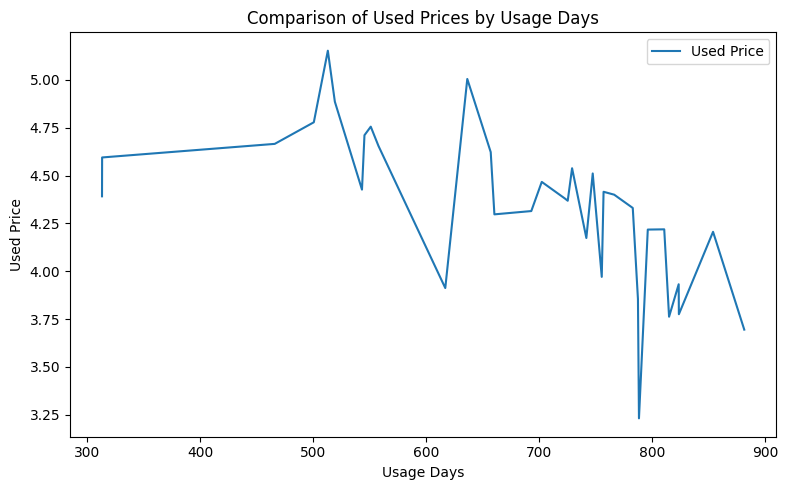

In [431]:
# Now, we can compare usage days and price

# Plot usage days against used price
plt.figure(figsize=(8, 5))
sns.lineplot(data=df_brand_price_final, x='Usage_Days', y='Used_Price', label='Used Price')

# Add labels and title
plt.xlabel('Usage Days')
plt.ylabel('Used Price')
plt.title('Comparison of Used Prices by Usage Days')

# Show legend
plt.legend()

# Show plot
plt.grid(False)
plt.tight_layout()
plt.show()

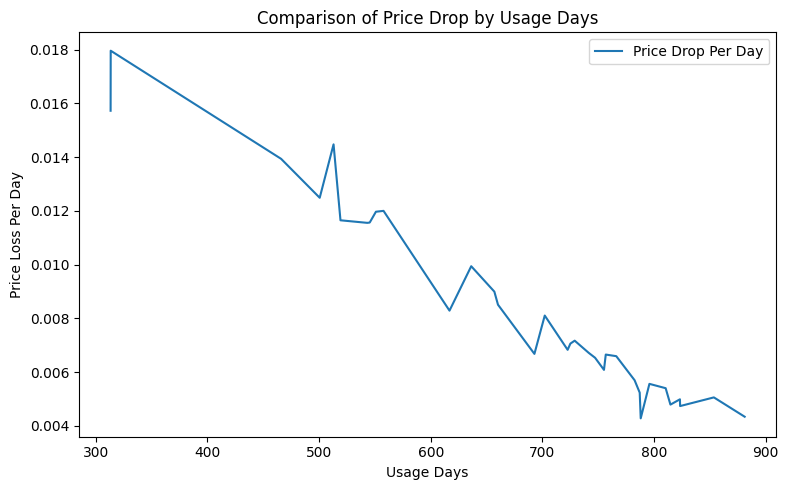

In [432]:
# Compare usage days and price drop by day

# Plot usage days against price drop
plt.figure(figsize=(8, 5))
sns.lineplot(data=df_brand_price_final, x='Usage_Days', y='Price_Loss_Per_Day', label='Price Drop Per Day')

# Add labels and title
plt.xlabel('Usage Days')
plt.ylabel('Price Loss Per Day')
plt.title('Comparison of Price Drop by Usage Days')

# Show legend
plt.legend()

# Show plot
plt.grid(False)
plt.tight_layout()
plt.show()

**OBSERVATIONS**

Now, we can observe a few key data points:

* Usage Days: In general, prices start to drop about .01 Euro per day, But there are a few key times to sell/buy.
  * For sellers, the best time to sell a phone and recieve the most for it is just under 500 days or around 650 days. The worst time to sell is near 800 days, when prices are the lowest.
  * For buyers, the inverse is true.

* Price Loss over time by brand: The trend for price loss is consisent over time, as we can see in the final chart.

* Overall, Infinix, Realme and Xiaomi have the best resale value in terms of price drop per day of usage. but are held the least amount of time.

**Usage Days**

Usage Days by Brand: Highest

* Spice			881
* Microsoft		854
* Karbonn			823

Usage Days by Brand: Lowest
* Infinix		313
* Realme		313
* Honor		466

**Resale Value**

New vs. Used Price Margin by Brand: Highest

* Apple		1.334995
* Google		1.192281
* OnePlus		1.114615

New vs. Used Price Margin by Brand: Lowest

* Infinix	0.264309
* Realme	0.488334
* Xiaomi	0.653993

**Daily Price Loss by Brand**

Daily price decline by brand: Highest
* Realme  .018
* Infinix .016
* OnePlus .015

Daily price decline by brand: Lowest
* Celkin  .005
* Spice   .005
* Karbonn .005

## EDA

### Questions to Answer

Let's use EDA to answer these questions:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

#####**Question 1. What does the distribution of normalized used device prices look like?**

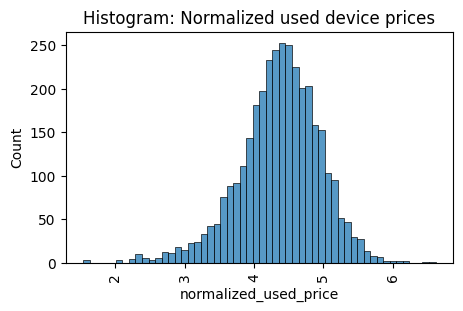

In [433]:
print_histogram(df, 'normalized_used_price', 5, 3, 'Histogram: Normalized used device prices')

The data is mostly normal, but has outliers that create a slightly right-skewed distribution.

#####**Question 2. What percentage of the used device market is dominated by Android devices?**

In [434]:
df['os'].value_counts(normalize=True)

os
Android    0.930515
Others     0.039664
Windows    0.019398
iOS        0.010423
Name: proportion, dtype: float64

Android devices comprise 93.1% of the overall market, based on the current dataset.

#####**Question 3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?**

In [435]:
# Let's group the data by brand and find the average ram for each one to answer this question
df_brand_ram_group = df.groupby('brand_name')[['ram']].mean().sort_values(by='ram', ascending=False)
df_brand_ram_group

ram
brand_name          
OnePlus     6.363636
Oppo        4.961240
Vivo        4.756410
Huawei      4.655378
Honor       4.603448
Xiaomi      4.583333
Google      4.533333
Meizu       4.451613
Samsung     4.199413
Realme      4.195122
Sony        4.069767
Asus        4.049180
ZTE         4.023214
HTC         4.000000
Apple       4.000000
XOLO        4.000000
Microsoft   4.000000
Panasonic   4.000000
Coolpad     3.954545
Motorola    3.943396
LG          3.936567
Gionee      3.933036
Acer        3.901961
Lenovo      3.885965
BlackBerry  3.829545
Others      3.777888
Spice       3.750000
Micromax    3.679487
Alcatel     3.407025
Karbonn     3.353448
Lava        3.277778
Infinix     2.600000
Nokia       2.420294
Celkon      1.613636

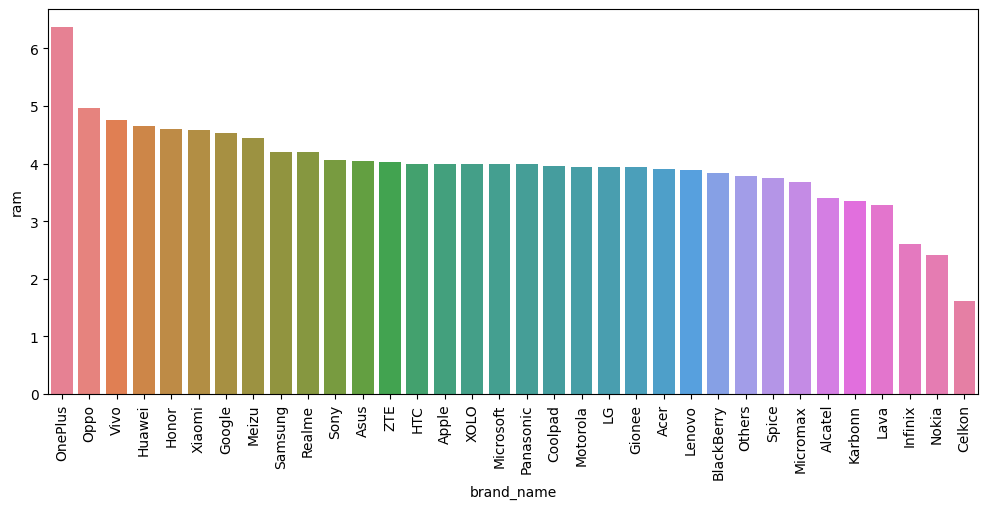

In [520]:
# Plot the results on a count plot
plt.figure(figsize=(12, 5))
sns.barplot(data=df_brand_ram_group, x='brand_name', y='ram', hue='brand_name')
plt.xticks(rotation=90)
plt.show()

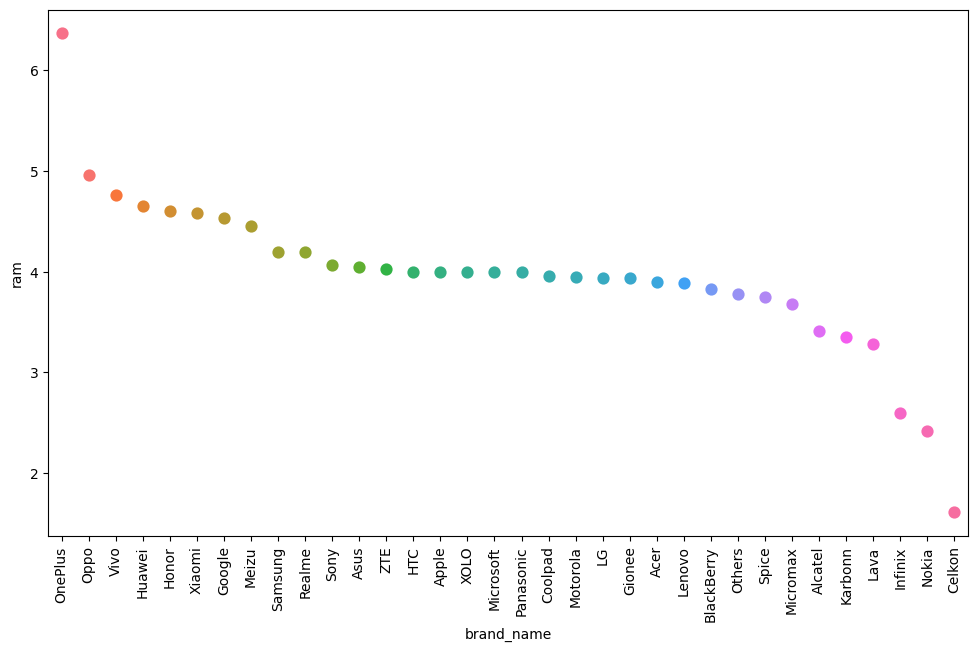

In [437]:
plt.figure(figsize=(10, 6))
sns.pointplot(data=df_brand_ram_group, x='brand_name', y='ram', hue='brand_name')
title = 'Order Cost and Rating'
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

**OBSERVATION:**

*   The majority of brands have between 3.5 and 5MB RAM.
*   OnePlus has the most RAM (6.4MB), while Celkon has the least RAM (1.6MB), followed by Infinix (2.46MB) and Nokia (2.42MB)



#####**Question 4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?**

In [438]:
# Create a new dataset for items with large batteries
df_large_battery = df[df['battery'] > 4500]
print('There are', df_large_battery.shape[0], 'devices with batteries larger than 4500 mAh.')
df_large_battery

There are 341 devices with batteries larger than 4500 mAh.


brand_name       os  screen_size   4g   5g  main_camera_mp  \
3         Honor  Android        25.50  yes  yes            13.0   
4         Honor  Android        15.32  yes   no            13.0   
11        Honor  Android        15.32  yes   no            13.0   
19        Honor  Android        25.43  yes   no             5.0   
20        Honor  Android        20.32  yes   no             8.0   
...         ...      ...          ...  ...  ...             ...   
3420    Samsung  Android        15.47  yes  yes             8.0   
3421    Samsung  Android        15.47  yes   no             8.0   
3434    Samsung  Android        15.34  yes   no            12.0   
3448       Asus  Android        16.74  yes   no             NaN   
3449       Asus  Android        15.34  yes   no             NaN   

      selfie_camera_mp  int_memory   ram  battery  weight  release_year  \
3                  8.0        64.0   6.0   7250.0   480.0          2020   
4                  8.0        64.0   3.0   5000.0   185.0          2020   
11                 8.0        64.0   4.0   5000.0   185.0          2020   
19                 2.0        32.0   3.0   5100.0   173.0          2019   
20                 8.0        32.0   3.0   5100.0   173.0          2019   
...                ...         ...   ...      ...     ...           ...   
3420              13.0       128.0  12.0   5000.0   222.0          2020   
3421              13.0       128.0  12.0   5000.0   220.0          2020   
3434              16.0        64.0   4.0   6000.0   188.0          2019   
3448              24.0       128.0   8.0   6000.0   240.0          2019   
3449               8.0        64.0   6.0   5000.0   190.0          2019   

      days_used  normalized_used_price  normalized_new_price  
3           345               5.135387              5.630961  
4           293               4.389995              4.947837  
11          344               4.657383              4.770176  
19          266               4.267878              5.517051  
20          321               4.556295              5.304001  
...         ...                    ...                   ...  
3420        197               5.623042              6.792120  
3421        176               5.594265              6.960775  
3434        455               4.781641              5.109937  
3448        325               5.715316              7.059317  
3449        232               4.492337              6.483872  

[341 rows x 15 columns]

In [439]:
# Let's count by brand name
df_battery_brand_grouped = df_large_battery.groupby('brand_name')['battery'].count().sort_values(ascending=False)
df_battery_brand_grouped

brand_name
Samsung      50
Others       41
Huawei       37
Xiaomi       31
Lenovo       28
Asus         22
Apple        17
Honor        14
Motorola     14
Vivo         13
LG           12
Realme       12
ZTE          10
Gionee       10
Acer          7
Infinix       6
Sony          6
Oppo          4
Nokia         1
Panasonic     1
Alcatel       1
Spice         1
HTC           1
Google        1
Micromax      1
Name: battery, dtype: int64

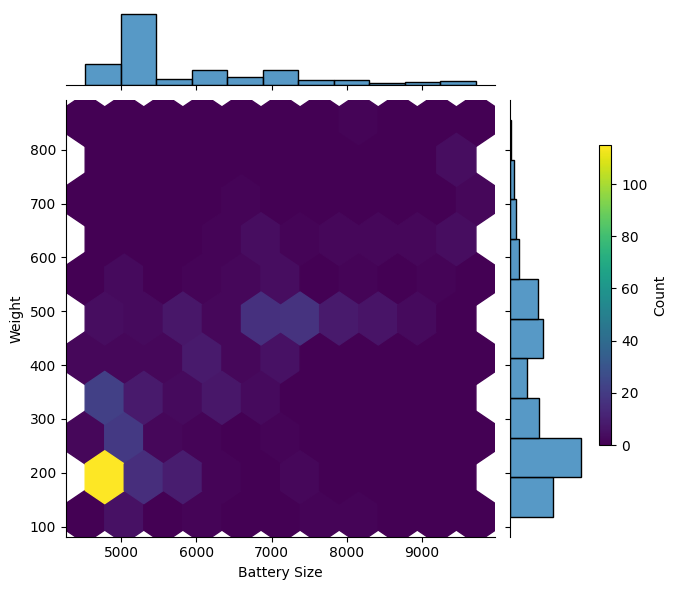

In [440]:
# Create a jointplot with and use hex coloring to double check if there's a correlation between cost and rating
joint_plot = sns.jointplot(data=df_large_battery, x='battery', y='weight', kind="hex", cmap='viridis')
joint_plot.set_axis_labels('Battery Size', 'Weight')

# Set up .25 ticks to make the plot square, else it's really tall and skinny
cbar_ax = joint_plot.fig.add_axes([1, 0.25, 0.02, .5])
plt.colorbar(cax=cbar_ax, label='Count')
plt.show()

<Axes: xlabel='battery', ylabel='weight'>

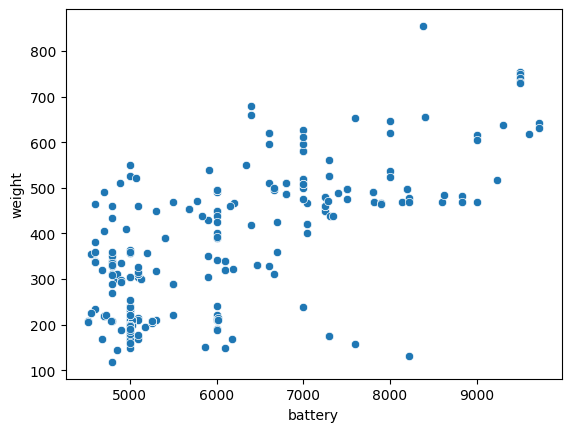

In [441]:
sns.scatterplot(data=df_large_battery, x='battery', y='weight')

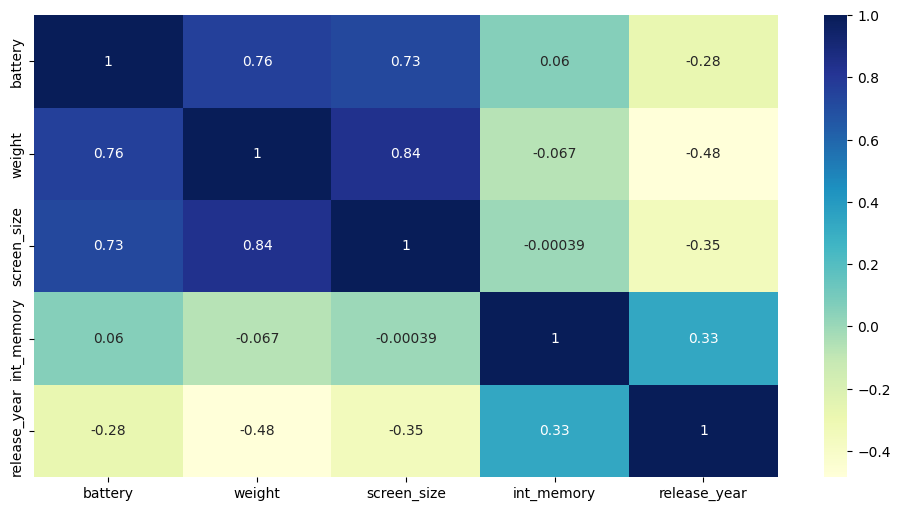

In [442]:
# See if we can find any correlations
col_list = ['battery', 'weight', 'screen_size', 'int_memory', 'release_year']
plt.figure(figsize=(12, 6))
sns.heatmap(df_large_battery[col_list].corr(), annot=True, cmap='YlGnBu')
plt.show()

# OBSERVATIONS
# * For rated orders, no strong correlations appear to exist.

**OBSERVATIONS**

*   There are 341 devices in total across all brands with batteries larger than 4500 mAh.
  * Samsung has the most (50), followed by unknown brand "Others" (41)
  * Seven brands offer only one device with large batteries.
*   The majority of devices with large batteries weigh about 200 grams and have a battery size just under 5000 mAh.
*   In general, when the battery size increases, so does the weight. There is a correlation value of .76 between these two series.



#####**Question 5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?**

In [443]:
# Let's create a new grouping to answer this question, using screen size and brand names

# Create a filtered dataset
df_larger_screen = df[df['screen_size'] > 6]

# Group by brand name and count the number of items
df_larger_screen_grouped = df_larger_screen.groupby(['brand_name'])[['screen_size']].count().sort_values(by='screen_size', ascending=False)
print('There are',df_larger_screen_grouped['screen_size'].agg(sum), 'devices available across all brands that have a screen size larger than 6 inches.')
df_larger_screen_grouped

There are 3362 devices available across all brands that have a screen size larger than 6 inches.


screen_size
brand_name             
Others              479
Samsung             334
Huawei              251
LG                  197
Lenovo              171
ZTE                 140
Xiaomi              132
Oppo                129
Asus                122
Vivo                117
Honor               116
Alcatel             115
HTC                 110
Micromax            108
Motorola            106
Sony                 86
Nokia                72
Meizu                62
Gionee               56
Acer                 51
XOLO                 49
Panasonic            47
Realme               41
Apple                39
Lava                 36
Spice                30
Karbonn              29
Celkon               25
Microsoft            22
OnePlus              22
Coolpad              22
BlackBerry           21
Google               15
Infinix              10

**OBSERVATIONS**
*  There are 3362 devices with a screen size larger than 6 inches available across all brands.
*  Samsung has the most (334), followed by Huawei (251).
*  Infinix offers the least (10) followed by Google (15).

#####**Question 6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?**

In [444]:
# Create a new dataset for items with selfie cameras offering > 8MP resolution
df_selfie_8MP = df[df['selfie_camera_mp'] > 8]
df_selfie_8MP

brand_name       os  screen_size   4g   5g  main_camera_mp  \
1         Honor  Android        17.30  yes  yes            13.0   
8         Honor  Android        15.32  yes   no            13.0   
12        Honor  Android        16.69  yes  yes            13.0   
13        Honor  Android        15.32  yes   no            13.0   
16        Honor  Android        15.90  yes   no            13.0   
...         ...      ...          ...  ...  ...             ...   
3438    Samsung  Android        15.34  yes   no            12.0   
3439    Samsung  Android        15.34  yes   no            12.0   
3440    Samsung  Android        15.44  yes   no            12.0   
3441    Samsung  Android        15.32  yes   no            12.0   
3448       Asus  Android        16.74  yes   no             NaN   

      selfie_camera_mp  int_memory   ram  battery  weight  release_year  \
1                 16.0       128.0   8.0   4300.0   213.0          2020   
8                 16.0       128.0   6.0   4000.0   165.0          2020   
12                16.0       128.0   8.0   4100.0   206.0          2019   
13                16.0        64.0   4.0   4000.0   171.5          2019   
16                32.0       128.0   6.0   3750.0   172.0          2019   
...                ...         ...   ...      ...     ...           ...   
3438              16.0        32.0   3.0   4000.0   169.0          2019   
3439              32.0        64.0   4.0   4000.0   169.0          2019   
3440              10.0       256.0  12.0   4300.0   196.0          2019   
3441              10.0       256.0   8.0   3500.0   168.0          2019   
3448              24.0       128.0   8.0   6000.0   240.0          2019   

      days_used  normalized_used_price  normalized_new_price  
1           325               5.162097              5.519018  
8           161               4.886054              5.299916  
12          537               5.383256              6.213968  
13          336               4.617593              5.398751  
16          395               5.022366              5.517935  
...         ...                    ...                   ...  
3438        369               4.760377              5.049151  
3439        315               5.137092              5.443240  
3440        489               5.200153              6.509499  
3441        429               5.205050              6.250940  
3448        325               5.715316              7.059317  

[655 rows x 15 columns]

In [445]:
# Let's create a new grouping to answer this question, using selfie camera MP values and brand names

# Create a filtered dataset
df_selfie_8MP = df[df['selfie_camera_mp'] > 8]

# Group by brand name and count the number of items
df_selfie_8MP_grouped = df_selfie_8MP.groupby(['brand_name'])[['selfie_camera_mp']].count().sort_values(by='selfie_camera_mp', ascending=False)
print('There are',df_selfie_8MP_grouped.shape[0], 'devices available across all brands that have a screen size larger than 6 inches.')
df_selfie_8MP_grouped

There are 25 devices available across all brands that have a screen size larger than 6 inches.


selfie_camera_mp
brand_name                  
Huawei                    87
Vivo                      78
Oppo                      75
Xiaomi                    63
Samsung                   57
Honor                     41
Others                    34
LG                        32
Motorola                  26
Meizu                     24
ZTE                       20
HTC                       20
OnePlus                   18
Realme                    18
Sony                      14
Lenovo                    14
Nokia                     10
Asus                       6
Infinix                    4
Gionee                     4
Coolpad                    3
Micromax                   2
Panasonic                  2
BlackBerry                 2
Acer                       1

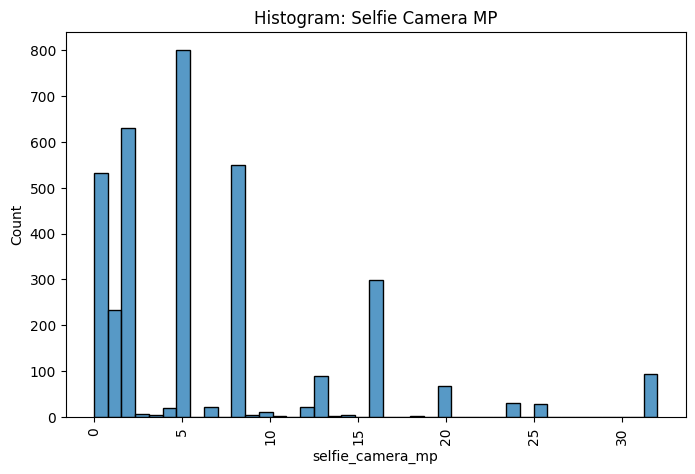

In [446]:
# Show the distribution
print_histogram(df_selfie_8MP, 'selfie_camera_mp', 8, 5, 'Histogram: Selfie Camera MP')

<Axes: xlabel='selfie_camera_mp', ylabel='brand_name'>

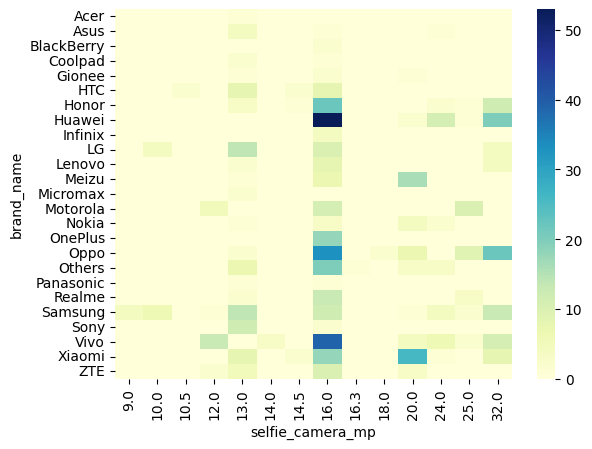

In [447]:
# Let's use a cross tab to view by brand
cross_tab_brand_selfie_camera = pd.crosstab(df_selfie_8MP['brand_name'], df_selfie_8MP['selfie_camera_mp'])
cross_tab_brand_selfie_camera

sns.heatmap(cross_tab_brand_selfie_camera, cmap='YlGnBu')

**OBSERVATIONS**

* Huawei is the most common brand for devices with a selfie camera resolution of 8 MP or higher, followed by Vivo and Oppo.
  with a selfie camera of 8MP or more resolution
  *  Huawei	(87)
  *  Vivo	(78)
  *  Oppo	(75)
* Acer offers only 1 device
* The most common device scenario is a Huawei 16 MP selfie camera, followed by Vivo 16 MP.

#####**Question 7. Which attributes are highly correlated with the normalized price of a used device?**

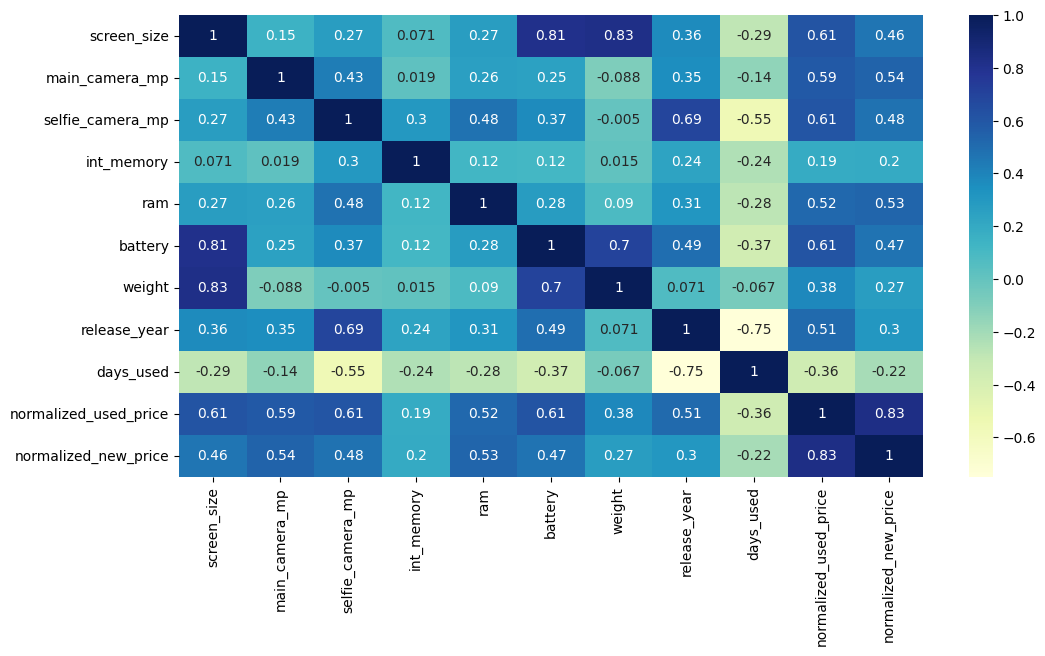

In [448]:
# Let's look at the correlation values of our original dataframe
col_list = list_numcol
plt.figure(figsize=(12, 6))
sns.heatmap(df[col_list].corr(), annot=True, cmap='YlGnBu')
plt.show()

**OBSERVATIONS**

* The strongest correlation for normalized used price is normalized new price, at .83.
* Weaker yet notable correlations exist with several other attributes:
  * Screen size
  * Selfie camera MP size
  * Battery power
  * RAM

## Data Preprocessing

Finally, we're ready to start our linear regression work.
As the first step, we need to examine our dataset to address any problems that may surface during the regression.

We can also identify our variables, based on our prior analysis and the problem statement:

*Analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.*

* Dependent Variable: Used Price
* Independent Variables that impact price, with correlation values:
  * Normalized New Price (.83)
  * Screen Size (.61)
  * Main Camera (.61)
  * Selfie Camera (.61)
  * Battery (.61)
  * RAM (.52)
  * Release year (.51)
  * Internal Memory (.19)
  * Weight (.38)
  * Days Used (-.36)

NOTE: Weight is not entirely *independent* as it is highly correlated to other variables such as battery and screen size. However, it is a critical data point.

* Potential categorical variables to delete, if we find we don't need them.
  * Brand Name
  * OS

###Data Cleanup
Before we go further, let's perform some data cleansing activities.

- Handle missing values
- Checking to see if all series are needed
- Decide how to handle outliers

In [449]:
# Decide how to handle  null values
df_null_cols = []

for col in df:
  if df[col].isnull().sum() > 0:
    print('Series', col,'has', df[col].isnull().sum(),'null values out of', df.shape[0], 'rows')
    df_null_cols.append(col)

Series main_camera_mp has 179 null values out of 3454 rows
Series selfie_camera_mp has 2 null values out of 3454 rows
Series int_memory has 4 null values out of 3454 rows
Series ram has 4 null values out of 3454 rows
Series battery has 6 null values out of 3454 rows
Series weight has 7 null values out of 3454 rows


In [450]:
# Since we don't have very many, we can likely fill in the gaps
# First, let's start with a new dataframe
df_clean = df.copy()

In [451]:
# Group by year first, and then brand to get improvements over time
# Then, fill in the null values using fillna and the medians
for col in df_null_cols:
    df_clean[col] = df_clean[col].fillna(value=df_clean.groupby(['release_year', 'brand_name'])[col].transform('median'))


In [452]:
# Create a column for how "stale" the data is
df_clean['data_age'] = df_clean['release_year'].max() - df_clean['release_year']
# Then, we don't need the year.
df_clean.drop('release_year', axis=1, inplace=True)
df_clean

brand_name       os  screen_size   4g   5g  main_camera_mp  \
0         Honor  Android        14.50  yes   no            13.0   
1         Honor  Android        17.30  yes  yes            13.0   
2         Honor  Android        16.69  yes  yes            13.0   
3         Honor  Android        25.50  yes  yes            13.0   
4         Honor  Android        15.32  yes   no            13.0   
...         ...      ...          ...  ...  ...             ...   
3449       Asus  Android        15.34  yes   no             NaN   
3450       Asus  Android        15.24  yes   no            13.0   
3451    Alcatel  Android        15.80  yes   no            13.0   
3452    Alcatel  Android        15.80  yes   no            13.0   
3453    Alcatel  Android        12.83  yes   no            13.0   

      selfie_camera_mp  int_memory  ram  battery  weight  days_used  \
0                  5.0        64.0  3.0   3020.0   146.0        127   
1                 16.0       128.0  8.0   4300.0   213.0        325   
2                  8.0       128.0  8.0   4200.0   213.0        162   
3                  8.0        64.0  6.0   7250.0   480.0        345   
4                  8.0        64.0  3.0   5000.0   185.0        293   
...                ...         ...  ...      ...     ...        ...   
3449               8.0        64.0  6.0   5000.0   190.0        232   
3450               8.0       128.0  8.0   4000.0   200.0        541   
3451               5.0        32.0  3.0   4000.0   165.0        201   
3452               5.0        32.0  2.0   4000.0   160.0        149   
3453               5.0        16.0  2.0   4000.0   168.0        176   

      normalized_used_price  normalized_new_price  data_age  
0                  4.307572              4.715100         0  
1                  5.162097              5.519018         0  
2                  5.111084              5.884631         0  
3                  5.135387              5.630961         0  
4                  4.389995              4.947837         0  
...                     ...                   ...       ...  
3449               4.492337              6.483872         1  
3450               5.037732              6.251538         2  
3451               4.357350              4.528829         0  
3452               4.349762              4.624188         0  
3453               4.132122              4.279994         0  

[3454 rows x 15 columns]

In [453]:
# Recheck values for nulls and types
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3454 non-null   float64
 8   ram                    3454 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  days_used              3454 non-null   int64  
 12  normalized_used_price  3454 non-null   float64
 13  normalized_new_price   3454 non-null   float64
 14  data_age               3454 non-null   int64  
dtypes: f

In [454]:
# Let's redo the fillna, but eliminating one of the levels of grouping
# Group by year first, and then brand to get improvements over time
# Then, fill in the null values using fillna and the medians
for col in df_null_cols:
    df_clean[col] = df_clean[col].fillna(value=df.groupby(['brand_name'])[col].transform('median'))

df_clean

brand_name       os  screen_size   4g   5g  main_camera_mp  \
0         Honor  Android        14.50  yes   no            13.0   
1         Honor  Android        17.30  yes  yes            13.0   
2         Honor  Android        16.69  yes  yes            13.0   
3         Honor  Android        25.50  yes  yes            13.0   
4         Honor  Android        15.32  yes   no            13.0   
...         ...      ...          ...  ...  ...             ...   
3449       Asus  Android        15.34  yes   no            13.0   
3450       Asus  Android        15.24  yes   no            13.0   
3451    Alcatel  Android        15.80  yes   no            13.0   
3452    Alcatel  Android        15.80  yes   no            13.0   
3453    Alcatel  Android        12.83  yes   no            13.0   

      selfie_camera_mp  int_memory  ram  battery  weight  days_used  \
0                  5.0        64.0  3.0   3020.0   146.0        127   
1                 16.0       128.0  8.0   4300.0   213.0        325   
2                  8.0       128.0  8.0   4200.0   213.0        162   
3                  8.0        64.0  6.0   7250.0   480.0        345   
4                  8.0        64.0  3.0   5000.0   185.0        293   
...                ...         ...  ...      ...     ...        ...   
3449               8.0        64.0  6.0   5000.0   190.0        232   
3450               8.0       128.0  8.0   4000.0   200.0        541   
3451               5.0        32.0  3.0   4000.0   165.0        201   
3452               5.0        32.0  2.0   4000.0   160.0        149   
3453               5.0        16.0  2.0   4000.0   168.0        176   

      normalized_used_price  normalized_new_price  data_age  
0                  4.307572              4.715100         0  
1                  5.162097              5.519018         0  
2                  5.111084              5.884631         0  
3                  5.135387              5.630961         0  
4                  4.389995              4.947837         0  
...                     ...                   ...       ...  
3449               4.492337              6.483872         1  
3450               5.037732              6.251538         2  
3451               4.357350              4.528829         0  
3452               4.349762              4.624188         0  
3453               4.132122              4.279994         0  

[3454 rows x 15 columns]

In [455]:
# Re-check the nulls
for col in df_clean:
  if df_clean[col].isnull().sum() > 0:
    print('Series', col,'has', df_clean[col].isnull().sum(),'null values out of', df_clean.shape[0], 'rows')
print('Completed null check.')

Series main_camera_mp has 10 null values out of 3454 rows
Completed null check.


In [456]:
# We still have a few null values in main_camera_mp, so let's look fix those by using median

# Calculate median of main_camera_mp
median_main_camera_mp = df_clean['main_camera_mp'].median()

# Fill NaNs in main_camera_mp with the median value
df_clean['main_camera_mp'].fillna(value=median_main_camera_mp, inplace=True)

# Verify if there are any remaining null values
print(df_clean['main_camera_mp'].isnull().sum())

0


###Outliers

We now have a clean dataframe. And because we are training a model, we don't want to eliminate outliers. But we will still check them.

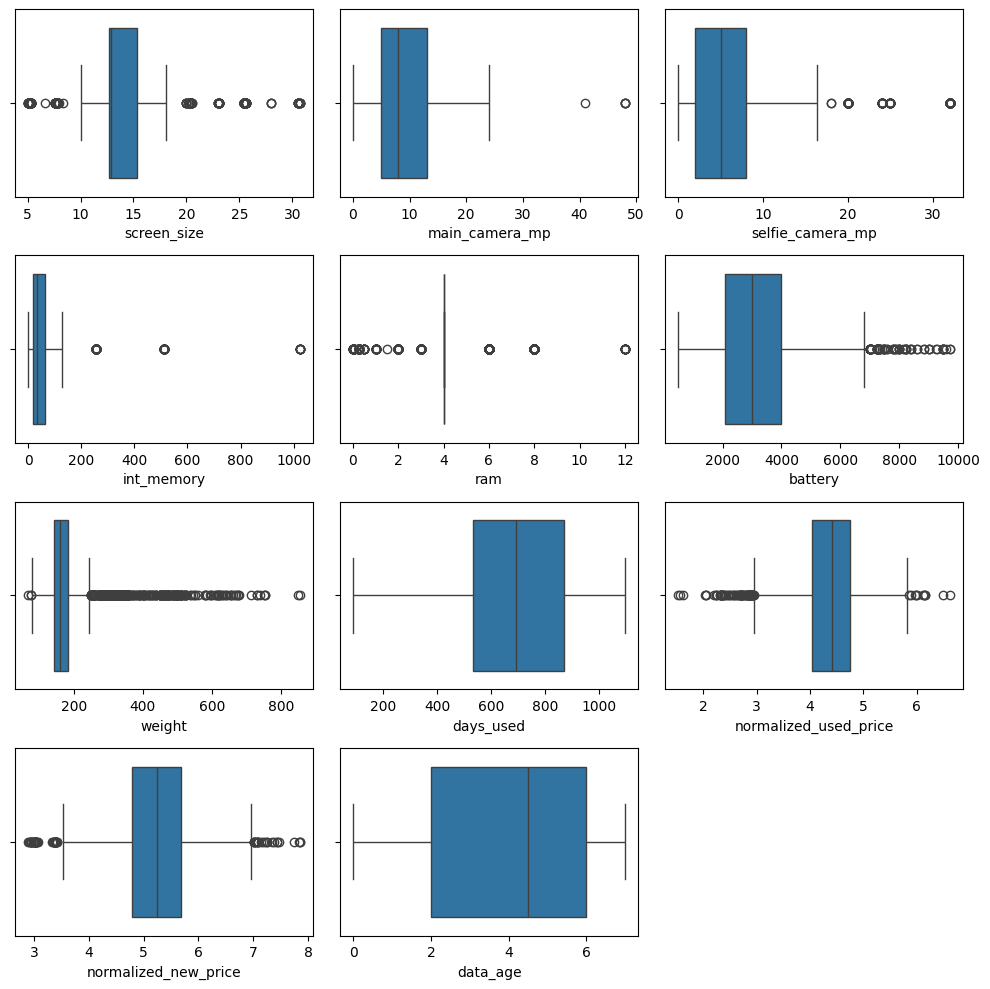

In [457]:
num_cols = df_clean.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(10, 10))

for i, col in enumerate(num_cols):
  plt.subplot(4, 3, i + 1)
  sns.boxplot(data=df_clean, x=col)
  plt.tight_layout()

plt.show()

###Revised Distribution

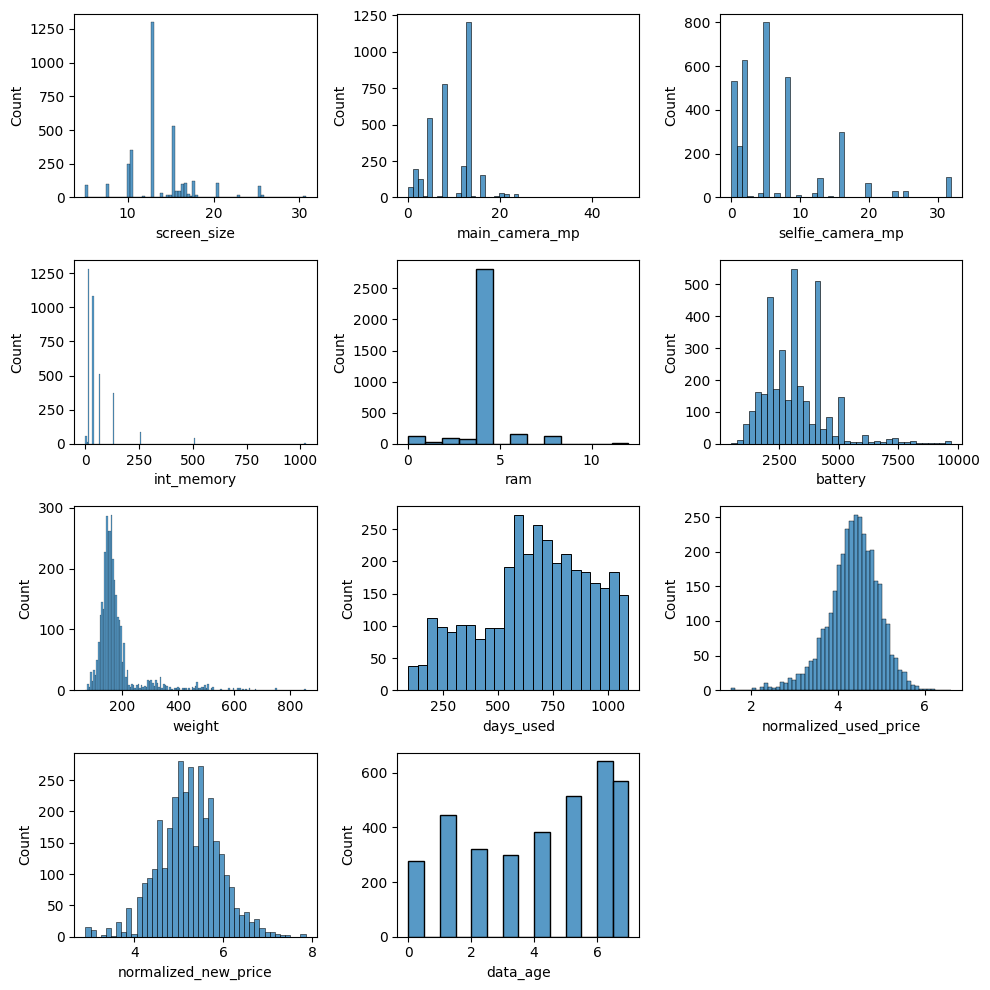

In [458]:
num_cols = df_clean.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(10, 10))

for i, col in enumerate(num_cols):
  plt.subplot(4, 3, i + 1)
  sns.histplot(data=df_clean, x=col)
  plt.tight_layout()

plt.show()

**OBSERVATION**

Weight has the most egregious outliers, as we saw in our original univariate analysis. However, we do not want to remove it.

## Model Building - Linear Regression

Let's first define our dependent and independent variables we identifed earlier.

From the problem statement, it's clear that we are concerned about the used/refurbished device price (y) and how other features (X) impact it.

In [459]:
# Load additional libraries for regression analysis

# For randomized data splitting
from sklearn.model_selection import train_test_split

# To build linear regression_model
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

# To check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

# To calculate VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# To help with visuals
import pylab


## Model Fitting

Now, we are ready to create and run some models to come up with our final one for regresson testing.

###Model Helpers

Let's set up some functions to help with further analysis.

In [460]:
# Function to check adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

# Function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100

# Function to check performance metrics for regression model
def test_model_performance(model, predictors, target):
    ''' Function to check regression model performance '''

    # predicting using the independent variables
    pred = model.predict(predictors)
    r2 = r2_score(target, pred)
    adjr2 = adj_r2_score(predictors, target, pred)
    rmse = np.sqrt(mean_squared_error(target, pred))
    mae = mean_absolute_error(target, pred)
    mape = mape_score(target, pred)

    # Store results
    df_perf = pd.DataFrame(
        {
            'RMSE': rmse,
            'MAE': mae,
            'R-squared': r2,
            'Adj. R-squared': adjr2,
            'MAPE': mape,
        },
        index=[0],
    )
    return df_perf

In [461]:
# Function to re-run OLS model with dropping a specific feature
def drop_columns(df, columns_to_drop):
  ''' Function to drop specified columns'''
  cols = []
  cols = columns_to_drop

  df_new = df.copy()

  for column in cols:
      if column in df_new.columns:
          df_new.drop(column, axis=1, inplace=True)
      else:
          print('Column',column,' not found in DataFrame. Skipping...')

  return df_new

def recalculate_ols(X_train_df, y_train_df, column_name):
  ''' Function to drop one column '''

  X_train_temp = X_train_df.copy()
  y_train_temp = y_train_df.copy()

  X_train_temp = drop_columns(X_train_temp, column_name)

  olsmod_temp = sm.OLS(y_train_temp, X_train_temp)
  olsres_temp = olsmod_temp.fit()

  # Re-test model performance with revised training data
  print('Retest model without', column_name)
  olsmod_train_perf = test_model_performance(olsres_temp, X_train_temp, y_train_temp)

  return olsmod_train_perf

def recalculate_ols_multi(X_train_df2, y_train_df2, column_list):
  ''' Function to drop several columns at once '''

  X_train_temp = X_train_df2.copy()
  y_train_temp = y_train_df2.copy()

  X_train_temp = drop_columns(X_train_temp, column_list)

  olsmod_temp = sm.OLS(y_train_temp, X_train_temp)
  olsres_temp = olsmod_temp.fit()

  # Re-test model performance with revised training data
  print('Retest model without', column_list)
  olsmod_train_perf = test_model_performance(olsres_temp, X_train_temp, y_train_temp)

  return olsmod_train_perf

###Model 1

In [462]:
# Copy the dataset before we make any changes as we test models
df_clean_mod1 = df_clean.copy()  # version to test all data

# Create independent variables
X = df_clean_mod1.drop(['normalized_used_price'], axis=1)

# Create dependent variable
y = df_clean_mod1['normalized_used_price']

In [463]:
# Add the Y intercept
X = sm.add_constant(X)

Before we can do more, we need to ensure we convert categorical variables into numerical ones, using the pandas dummy method.
This creates a lot of columns we ultimately may not need.

In [464]:
# Create dummy variables
X = pd.get_dummies(
    data = X,
    columns = X.select_dtypes(include = ['object', 'category']).columns.tolist(),
    drop_first=True) # to auto-drop one of each series of dummy variables and reduce dataset column counts

In [465]:
# Convert  attributes into float type for modeling
X = X.astype(float)
y = y.astype(float)

In [466]:
# Check types, since OLS requires floats or integers only
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 49 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   const                  3454 non-null   float64
 1   screen_size            3454 non-null   float64
 2   main_camera_mp         3454 non-null   float64
 3   selfie_camera_mp       3454 non-null   float64
 4   int_memory             3454 non-null   float64
 5   ram                    3454 non-null   float64
 6   battery                3454 non-null   float64
 7   weight                 3454 non-null   float64
 8   days_used              3454 non-null   float64
 9   normalized_new_price   3454 non-null   float64
 10  data_age               3454 non-null   float64
 11  brand_name_Alcatel     3454 non-null   float64
 12  brand_name_Apple       3454 non-null   float64
 13  brand_name_Asus        3454 non-null   float64
 14  brand_name_BlackBerry  3454 non-null   float64
 15  bran

Next, we will create our training and test datasets with a 70:30 ratio.

In [467]:
# Create train and test data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1
)

In [468]:
# Check counts

# Original dataset: 2471 train, 1037 test
print('X_train rows:', X_train.shape[0])
print('X_test rows:', X_test.shape[0])

X_train rows: 2417
X_test rows: 1037


In [469]:
print(X_train.head())

      const  screen_size  main_camera_mp  selfie_camera_mp  int_memory  ram  \
3026    1.0        10.29             8.0               0.3        16.0  4.0   
1525    1.0        15.34            13.0               5.0        32.0  4.0   
1128    1.0        12.70            13.0               5.0        32.0  4.0   
3003    1.0        12.83             8.0               5.0        16.0  4.0   
2907    1.0        12.88            13.0              16.0        16.0  4.0   

      battery  weight  days_used  normalized_new_price  ...  brand_name_Spice  \
3026   1800.0   120.0      819.0              4.796204  ...               0.0   
1525   4050.0   225.0      585.0              5.434595  ...               0.0   
1128   2550.0   162.0      727.0              5.137914  ...               0.0   
3003   3200.0   126.0      800.0              5.189228  ...               0.0   
2907   2900.0   160.0      560.0              5.016220  ...               0.0   

      brand_name_Vivo  brand_name_XOLO

Next, let's find the best-fit model.

In [470]:
# Look for any NaNs
print('Check for NaN values in X_train:',X_train.isna().sum())
print('Check for NaN values in y_train:',y_train.isna().sum())


Check for NaN values in X_train: const                    0
screen_size              0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
days_used                0
normalized_new_price     0
data_age                 0
brand_name_Alcatel       0
brand_name_Apple         0
brand_name_Asus          0
brand_name_BlackBerry    0
brand_name_Celkon        0
brand_name_Coolpad       0
brand_name_Gionee        0
brand_name_Google        0
brand_name_HTC           0
brand_name_Honor         0
brand_name_Huawei        0
brand_name_Infinix       0
brand_name_Karbonn       0
brand_name_LG            0
brand_name_Lava          0
brand_name_Lenovo        0
brand_name_Meizu         0
brand_name_Micromax      0
brand_name_Microsoft     0
brand_name_Motorola      0
brand_name_Nokia         0
brand_name_OnePlus       0
brand_name_Oppo          0
brand_name_Others        0
brand_name_Panasonic  

In [471]:
# Fit data into the OLS model
olsmod = sm.OLS(y_train, X_train)
olsres = olsmod.fit()

In [472]:
# Show the model summary for entire dataset
print(olsres.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     268.7
Date:                   Thu, 11 Jul 2024   Prob (F-statistic):               0.00
Time:                           03:58:39   Log-Likelihood:                 123.85
No. Observations:                   2417   AIC:                            -149.7
Df Residuals:                       2368   BIC:                             134.0
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


####Results

After running the initial OLS summary, we can conclude that the model can explain 84.4% of the variance in our training data.

While this is acceptable (>80%), we can likely improve it. During our multi-collinearity checks, we'll see if we can improve R2.

```
# Original model: OLS Regression Results                             
=================================================================================
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     268.7
Date:                   Tue, 09 Jul 2024   Prob (F-statistic):               0.00
Time:                           01:39:47   Log-Likelihood:                 123.85
No. Observations:                   2417   AIC:                            -149.7
Df Residuals:                       2368   BIC:                             134.0
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
Function to check
```

####Performance Check

Let's see how the model performs against training and test data.

In [473]:
# Test the model performance with training data
print('Training Performance:\n')

olsmod_train_perf = test_model_performance(olsres, X_train, y_train)
olsmod_train_perf

Training Performance:



RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.229884  0.180326   0.844886        0.841675  4.326841

In [474]:
# Test the model performance with test data
print('Test Performance:\n')
olsmod_test_perf = test_model_performance(olsres, X_test, y_test)
olsmod_test_perf

Test Performance:



RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.238358  0.184749   0.842479        0.834659  4.501651

The results were similar for training and test.

###Model 2

Let's redo our model without the high p-value categorical dummy variables and retest performance

* We can safely remove categorical dummy variables without regard to VIF if all of them have p-values that exceeds our 5% significance level. Here, all of the brand_name hot-encoded features do.
* For the other variables: We will need to examine VIF later.

```
High p-value non-dummy variables:
0.172	days_used
0.120	os_Others
0.099	int_memory

High p-value dummy variables:

0.980	brand_name_Apple
0.964	brand_name_Huawei
0.904	brand_name_ZTE
0.849	brand_name_Others
0.821	brand_name_Motorola
0.818	brand_name_Meizu
0.816	brand_name_Spice
0.794	brand_name_Oppo
0.787	brand_name_HTC
0.782	brand_name_XOLO
0.774	brand_name_Coolpad
0.771	brand_name_LG
0.753	brand_name_Asus
0.750	brand_name_Vivo
0.747	brand_name_Alcatel
0.700	brand_name_Google
0.669	brand_name_BlackBerry
0.651	os_iOS
0.646	os_Windows
0.605	brand_name_Realme
0.594	brand_name_Lava
0.520	brand_name_Honor
0.481	brand_name_Micromax
0.480	brand_name_Celkon
0.469	brand_name_Samsung
0.438	brand_name_Gionee
0.360	brand_name_OnePlus
0.316	brand_name_Lenovo
0.314	brand_name_Panasonic
0.281	brand_name_Microsoft
0.223	brand_name_Sony
0.166	brand_name_Nokia
0.160	brand_name_Karbonn
0.080	brand_name_Infinix
0.071	brand_name_Xiaomi
```



In [475]:
# Re-test with new model
# Prior R-squared:                       0.845
# Prior Adj. R-squared:                  0.842

# Copy the dataset we cleaned prior, before we make any changes
df_clean_mod2 = df_clean_mod1.copy()

# Drop the high p-value dummy variables before we start
df_clean_mod2 = df_clean_mod2.drop(['brand_name'], axis=1)
df_clean_mod2 = df_clean_mod2.drop(['os'], axis=1)

df_clean_mod2.head()

screen_size   4g   5g  main_camera_mp  selfie_camera_mp  int_memory  ram  \
0        14.50  yes   no            13.0               5.0        64.0  3.0   
1        17.30  yes  yes            13.0              16.0       128.0  8.0   
2        16.69  yes  yes            13.0               8.0       128.0  8.0   
3        25.50  yes  yes            13.0               8.0        64.0  6.0   
4        15.32  yes   no            13.0               8.0        64.0  3.0   

   battery  weight  days_used  normalized_used_price  normalized_new_price  \
0   3020.0   146.0        127               4.307572              4.715100   
1   4300.0   213.0        325               5.162097              5.519018   
2   4200.0   213.0        162               5.111084              5.884631   
3   7250.0   480.0        345               5.135387              5.630961   
4   5000.0   185.0        293               4.389995              4.947837   

   data_age  
0         0  
1         0  
2         0  
3         0  
4         0

In [476]:
# Create independent variables
X = df_clean_mod2.drop(['normalized_used_price'], axis=1)

# Create dependent variable
y = df_clean_mod2['normalized_used_price']

# Add the Y intercept
X = sm.add_constant(X)

# Create dummy variables
X = pd.get_dummies(
    data = X,
    columns = X.select_dtypes(include = ['object', 'category']).columns.tolist(),
    drop_first=True) # to auto-drop one of each series of dummy variables and reduce dataset column counts

# Convert  attributes into float type for modeling
X = X.astype(float)
y = y.astype(float)

# Convert  attributes into float type for modeling
X = X.astype(float)
y = y.astype(float)

# Create new train and test data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1)

# Create new train and test data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1)
# Fit data into the OLS model
olsmod2 = sm.OLS(y_train, X_train)
olsres2 = olsmod2.fit()

# Show the model summary for entire dataset
print(olsres2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.841
Model:                               OLS   Adj. R-squared:                  0.840
Method:                    Least Squares   F-statistic:                     1062.
Date:                   Thu, 11 Jul 2024   Prob (F-statistic):               0.00
Time:                           03:58:40   Log-Likelihood:                 95.944
No. Observations:                   2417   AIC:                            -165.9
Df Residuals:                       2404   BIC:                            -90.61
Df Model:                             12                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

####Results

Our R-squared and Adjusted R-squared values are not highly affected by this change, and removing them eliminates a large number of coefficients that do not have much effect on the metrics.

We will opt to keep these out of our model since we maintained an 84% variable explanation and their VIF values were very high.

```
 Model 2: OLS Regression Results                             
=================================================================================
Dep. Variable:     normalized_used_price   R-squared:                       0.841
Model:                               OLS   Adj. R-squared:                  0.840
Method:                    Least Squares   F-statistic:                     1062.
Date:                   Tue, 09 Jul 2024   Prob (F-statistic):               0.00
Time:                           03:26:52   Log-Likelihood:                 95.944
No. Observations:                   2417   AIC:                            -165.9
Df Residuals:                       2404   BIC:                            -90.61
Df Model:                             12                                         
Covariance Type:               nonrobust                                         
```



####Performance Check

Now that we have addressed p-values, let's re-run the checks and then move on to our linear regression testing.

In [477]:
# Test the model performance with training data
print('Training Performance: Model 2:\n')
olsmod2_train_perf = test_model_performance(olsres2, X_train, y_train)
olsmod2_train_perf

Training Performance: Model 2:



RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.232554  0.182502   0.841262        0.840403  4.384238

In [478]:
# Test the model performance with test data
print('Test Performance: Model 2:\n')
olsmod2_test_perf = test_model_performance(olsres2, X_test, y_test)
olsmod2_test_perf

Test Performance: Model 2:



RMSE       MAE  R-squared  Adj. R-squared     MAPE
0  0.236893  0.183447   0.844409        0.842432  4.48192

In this second model, the test and training results are similar, with test slightly exceeding training results.

##Testing for Linear Regression Assumptions

Now that we have our model, we are ready to move into Linear Regression.
Our first step will be to validate the assumptions:

* **Multicollinearity**: No (or very little) multicollinearity.
* **Linearity**: Independent and dependent variables are linearly related
* **Independence**: Residuals are independent
* **Homoscedasticity**: Residuals have constant, equal variance
* **Normality**: Residuals are normally distributed



###Multicollinearity Tests

Let's re-check our Variable Inflation Factor values with our latest model

In [479]:
# Examine VIF values, round 2
num_predictors = X_train.shape[1]

vif_values = []

for i in range(num_predictors):
    vif = variance_inflation_factor(pd.DataFrame(X_train).values, i)
    vif_values.append(vif)

vif_series_X = pd.Series(vif_values, index=X_train.columns)

print('VIF values:\n', vif_series_X)

VIF values:
 const                   96.333697
screen_size              6.154333
main_camera_mp           1.968764
selfie_camera_mp         2.540663
int_memory               1.246984
ram                      1.995292
battery                  3.814460
weight                   5.598791
days_used                2.560121
normalized_new_price     2.506355
data_age                 4.596077
4g_yes                   2.255645
5g_yes                   1.696824
dtype: float64


Let's try dropping the moderate VIF predictors singly and see how this impacts the model. We can use the function we set up for this earlier.


```
VIF values by coefficient:

6.154333	screen_size              
5.598791	weight                   
4.596077	data_age                 
3.814460	battery                  
2.560121	days_used                
2.540663	selfie_camera_mp         
2.506355	normalized_new_price     
2.255645	4g_yes                   
1.995292	ram                      
1.968764	main_camera_mp           
1.696824	5g_yes                   
1.246984	int_memory               
```

Our prior Adjusted R2 value was **.840**, and we'll now test this against each predictor.

For the predictors with VIF scores greater than 5, we will also apply a transformation to see if this helps with the scores.

<Axes: xlabel='screen_size_log', ylabel='Count'>

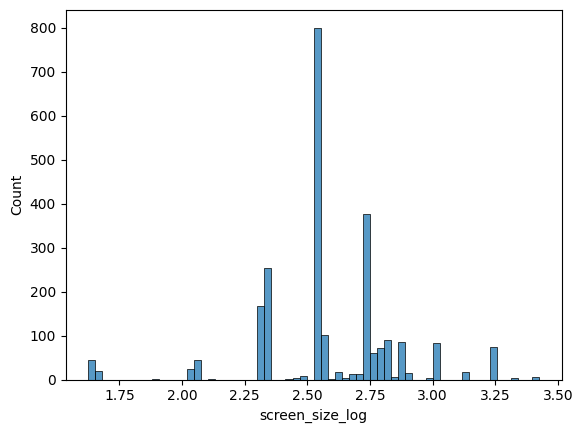

In [480]:
# Add a logarithmic column for screen size
X_train['screen_size_log'] = np.log(X_train['screen_size'])
X_test['screen_size_log'] = np.log(X_test['screen_size'])
sns.histplot(X_train['screen_size_log'])

In [481]:
# Re-run OLS model: No screen size
columns_to_delete = ['screen_size']
result = recalculate_ols(X_train, y_train, columns_to_delete)
display(result)

Retest model without ['screen_size']


RMSE      MAE  R-squared  Adj. R-squared      MAPE
0  0.230512  0.18046   0.844037        0.843193  4.332242

In [482]:
# Re-run OLS model: No weight
columns_to_delete = ['weight']
result = recalculate_ols(X_train, y_train, columns_to_delete)
display(result)

Retest model without ['weight']


RMSE       MAE  R-squared  Adj. R-squared     MAPE
0  0.234416  0.183487   0.838709        0.837837  4.40568

<Axes: xlabel='weight_log', ylabel='Count'>

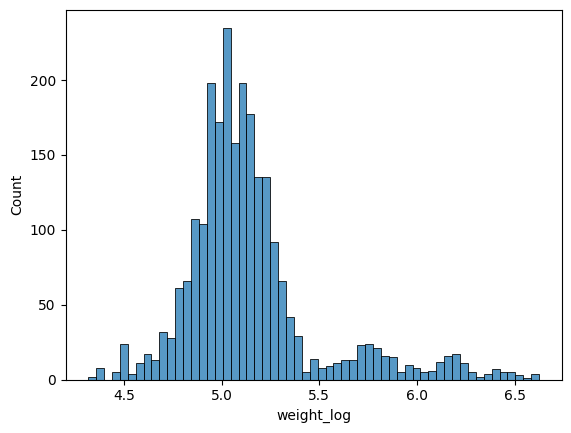

In [483]:
# Add a logarithmic column for weight
X_train['weight_log'] = np.log(X_train['weight'])
X_test['weight_log'] = np.log(X_test['weight'])
sns.histplot(X_train['weight_log'])

In [484]:
# Re-run OLS model: No new price
columns_to_delete = ['normalized_new_price']
result = recalculate_ols(X_train, y_train, columns_to_delete)
display(result)

Retest model without ['normalized_new_price']


RMSE       MAE  R-squared  Adj. R-squared     MAPE
0  0.289537  0.211922    0.75394        0.752506  5.10875

In [485]:
# Re-run OLS model: No weight
columns_to_delete = ['weight']
result = recalculate_ols(X_train, y_train, columns_to_delete)
display(result)

Retest model without ['weight']


RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.229849  0.178682   0.844933        0.844029  4.291293

In [486]:
# Re-run OLS model: No data age
columns_to_delete = ['data_age']
result = recalculate_ols(X_train, y_train, columns_to_delete)
display(result)


Retest model without ['data_age']


RMSE       MAE  R-squared  Adj. R-squared     MAPE
0  0.231057  0.179997   0.843299        0.842386  4.32822

In [487]:
# Re-run OLS model: No battery
columns_to_delete = ['battery']
result = recalculate_ols(X_train, y_train, columns_to_delete)
display(result)

Retest model without ['battery']


RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.229672  0.178706   0.845171        0.844269  4.293719

In [488]:
# Re-run OLS model: No main_camera_mp
columns_to_delete = ['main_camera_mp']
result = recalculate_ols(X_train, y_train, columns_to_delete)
display(result)

Retest model without ['main_camera_mp']


RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.23859  0.185188   0.832914         0.83194  4.446206

In [489]:
# Re-run OLS model: No selfie_camera_mp
columns_to_delete = ['selfie_camera_mp']
result = recalculate_ols(X_train, y_train, columns_to_delete)
display(result)

Retest model without ['selfie_camera_mp']


RMSE      MAE  R-squared  Adj. R-squared      MAPE
0  0.237828  0.18442    0.83398        0.833013  4.409472

In [490]:
# Re-run OLS model: main_camera_mp
columns_to_delete = ['main_camera_mp']
result = recalculate_ols(X_train, y_train, columns_to_delete)
display(result)

Retest model without ['main_camera_mp']


RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.23859  0.185188   0.832914         0.83194  4.446206

In [491]:
# Re-run OLS model: 4g_yes
columns_to_delete = ['4g_yes']
result = recalculate_ols(X_train, y_train, columns_to_delete)
display(result)

Retest model without ['4g_yes']


RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.22991  0.179047    0.84485        0.843946  4.300296

In [492]:
# Re-run OLS model: 5g_yes
columns_to_delete = ['5g_yes']
result = recalculate_ols(X_train, y_train, columns_to_delete)
display(result)

Retest model without ['5g_yes']


RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.229604  0.178855   0.845264        0.844362  4.295491

In [493]:
# Re-run OLS model: ram
columns_to_delete = ['ram']
result = recalculate_ols(X_train, y_train, columns_to_delete)
display(result)

Retest model without ['ram']


RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.230006  0.179293   0.844721        0.843816  4.307932

In [494]:
# Re-run OLS model: internal memory
columns_to_delete = ['int_memory']
result = recalculate_ols(X_train, y_train, columns_to_delete)
display(result)

Retest model without ['int_memory']


RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.229714  0.178513   0.845115        0.844212  4.281928

In [495]:
# Examine VIF values, round 2
num_predictors = X_train.shape[1]

vif_values = []

for i in range(num_predictors):
    vif = variance_inflation_factor(pd.DataFrame(X_train).values, i)
    vif_values.append(vif)

vif_series_X = pd.Series(vif_values, index=X_train.columns)

print('VIF values:\n', vif_series_X)

VIF values:
 const                   2804.784476
screen_size               57.216804
main_camera_mp             2.057191
selfie_camera_mp           2.542456
int_memory                 1.255554
ram                        2.096102
battery                    3.929184
weight                    31.443087
days_used                  2.576301
normalized_new_price       2.526059
data_age                   4.650254
4g_yes                     2.260191
5g_yes                     1.719389
screen_size_log           39.291884
weight_log                24.508358
dtype: float64


As one final step, let's revisit our correlation matrix.

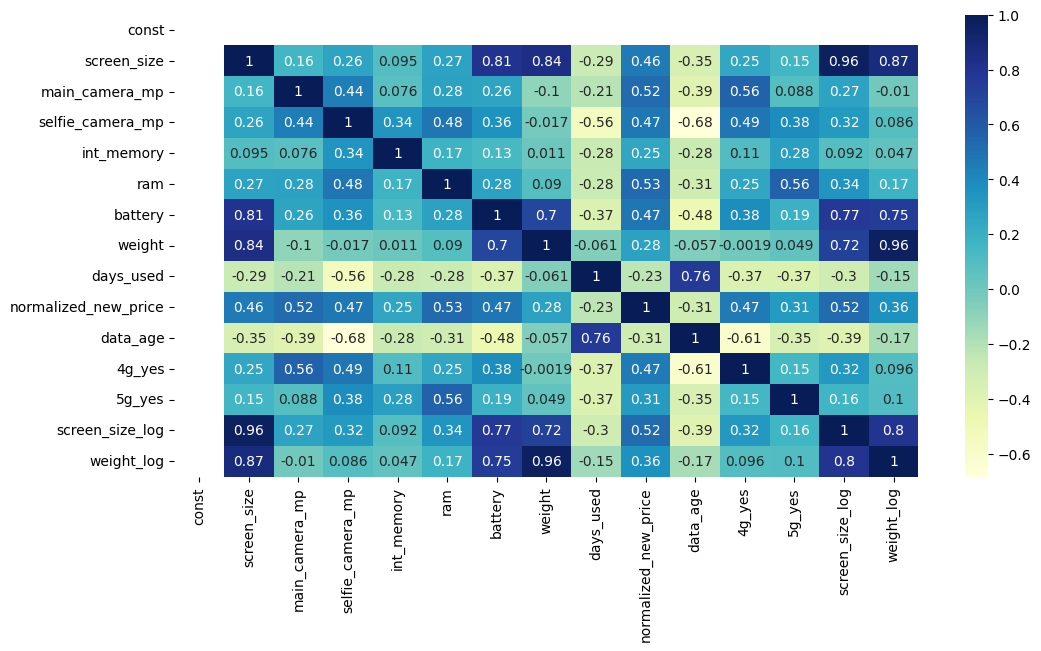

In [496]:
# Let's reference the correlation values of our original dataframe, but for X_train this time
plt.figure(figsize=(12, 6))
sns.heatmap(X_train.corr(), annot=True, cmap='YlGnBu')
plt.show()

**OBSERVATION**

While adding logarithmic weight and screen size helped improve our Adjusted R-squared slightly, removing other predictors did not appreciably alter the value, or even reduced it slightly.

Therefore, we will accept our current model and proceed with the regression analysis.


###Linearity & Independence

Our first step in testing linearity and independence is to plot the residuals.

In [497]:
# Let's create a dataframe for the actual, fitted and residual values
df_pred = pd.DataFrame()
df_pred['Actual Values'] = y_train  # actual values
df_pred['Fitted Values'] = olsres2.fittedvalues  # predicted values
df_pred['Residuals'] = olsres2.resid  # residuals

df_pred.head()

Actual Values  Fitted Values  Residuals
3026       4.087488       3.855783   0.231705
1525       4.448399       4.581167  -0.132767
1128       4.315353       4.285263   0.030090
3003       4.282068       4.212867   0.069202
2907       4.456438       4.471474  -0.015036

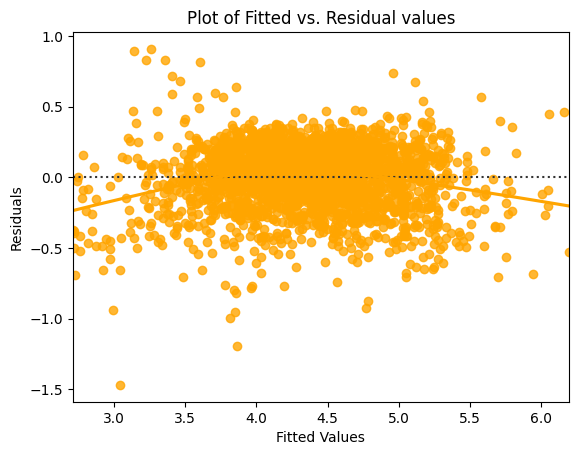

In [498]:
# Next, let's show the residuals on a scatterplot to inspect their distribution

sns.residplot(
    data=df_pred, x='Fitted Values', y='Residuals', color='orange', lowess=True
)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Plot of Fitted vs. Residual values')
plt.show()

**OBSERVATION**

A pattern is not discernible; therefore, this satisfies the tests for both linearity and independence.

###Homoscedasticity

Now, let's check the variance of the residuals using the Goldfeldquandt test.

* Null hypothesis : Residuals are homoscedastic
* Alternate hypothesis : Residuals have hetroscedasticity

In [499]:
# Let's test for homostedasticity
import statsmodels.stats.api as sms

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(df_pred['Residuals'], X_train)
lzip(name, test)

[('F statistic', 1.0634389720485062), ('p-value', 0.14408007785123528)]

**OBSERVATION**

The result indicates a p-value of .144. Since this is greater than our statistical significance value of .05, we can confirm that the residuals are homoscedastic and accept the null hypothesis.

###Normality

Finally, we need to check for normality in the residuals.

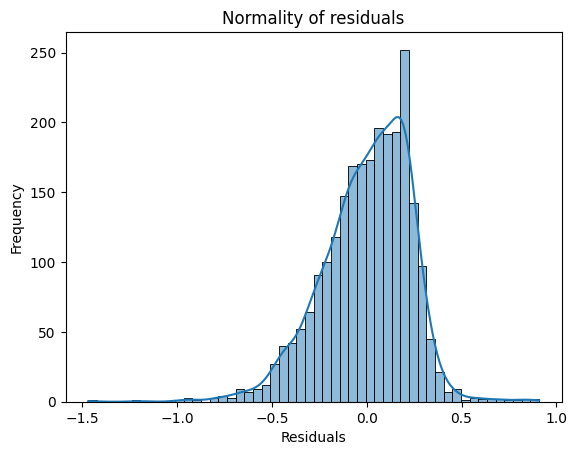

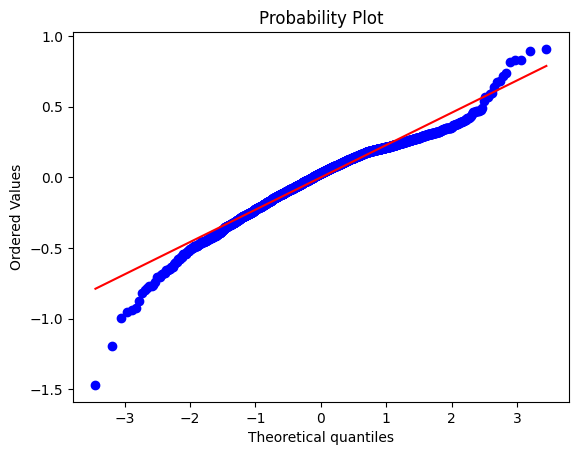

In [500]:
# Next, we'll test for normality of residuals
sns.histplot(data=df_pred, x='Residuals', kde=True)
plt.title('Normality of residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

stats.probplot(df_pred['Residuals'], dist='norm', plot=pylab)
plt.show()

The line is a little wobbly due to outliers on each side.

Next, let's also apply Shapiro Wilks test.

In [501]:
stats.shapiro(df_pred['Residuals']) # Shapiro-Wilks Test


ShapiroResult(statistic=0.9684872627258301, pvalue=1.3062225188091116e-22)

**OBSERVATION**

The p-value of the Shapiro Wilks test indicates that the data is not normal. However, we will accept this distribution as we can see that most of the discrepancy is along the outer edges of the line.

***We have now completed our linear regression assumption testing, and can move on to final model performance testing.***




##Final Model

Let's construct the final model with our changes, but dropping the high p-value items that we tested earlier. Then, we will re-check the p-values and make any final adjustments.

In [502]:
# Copy the dataset before we make any changes as we test models
df_clean_mod3 = df_clean.copy()

# Drop the high p-value dummy variables before we start
df_clean_mod3 = df_clean_mod3.drop(['brand_name'], axis=1)
df_clean_mod3 = df_clean_mod3.drop(['os'], axis=1)

# Add the logarithmic columns before we start (added to help with normality)
X_train['screen_size_log'] = np.log(X_train['screen_size'])
X_test['screen_size_log'] = np.log(X_test['screen_size'])

# Add a logarithmic column for weight (added to help with normality)
X_train['weight_log'] = np.log(X_train['weight'])
X_test['weight_log'] = np.log(X_test['weight'])

In [503]:
# Create independent variables
X = df_clean_mod1.drop(['normalized_used_price'], axis=1)

# Create dependent variable
y = df_clean_mod1['normalized_used_price']

# Create independent variables
X = df_clean_mod2.drop(['normalized_used_price'], axis=1)

# Create dependent variable
y = df_clean_mod2['normalized_used_price']

# Add the Y intercept
X = sm.add_constant(X)

# Create dummy variables
X = pd.get_dummies(
    data = X,
    columns = X.select_dtypes(include = ['object', 'category']).columns.tolist(),
    drop_first=True) # to auto-drop one of each series of dummy variables and reduce dataset column counts

# Convert  attributes into float type for modeling
X = X.astype(float)
y = y.astype(float)

# Create new train and test data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1)


In [504]:
# Fit data into the OLS model
olsmod3 = sm.OLS(y_train, X_train)
olsres3 = olsmod3.fit()

# Show the model summary for entire dataset
print(olsres3.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.841
Model:                               OLS   Adj. R-squared:                  0.840
Method:                    Least Squares   F-statistic:                     1062.
Date:                   Thu, 11 Jul 2024   Prob (F-statistic):               0.00
Time:                           03:58:46   Log-Likelihood:                 95.944
No. Observations:                   2417   AIC:                            -165.9
Df Residuals:                       2404   BIC:                            -90.61
Df Model:                             12                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

Now, we have different p-values that are high. We want to eliminate those one by one and check the effect

In [505]:
# Test the model performance with training data minus 5g
print('Training Performance:\n')
X_train_final = X_train.drop(['5g_yes'], axis=1)
X_test_final = X_test.drop(['5g_yes'], axis=1)

y_train_final = y_train
y_test_final = y_test

olsmod4 = sm.OLS(y_train, X_train_final)
olsres4 = olsmod4.fit()
print(olsres4.summary())

Training Performance:

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.841
Model:                               OLS   Adj. R-squared:                  0.840
Method:                    Least Squares   F-statistic:                     1157.
Date:                   Thu, 11 Jul 2024   Prob (F-statistic):               0.00
Time:                           03:58:46   Log-Likelihood:                 94.340
No. Observations:                   2417   AIC:                            -164.7
Df Residuals:                       2405   BIC:                            -95.20
Df Model:                             11                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

Now, we are left with battery as the only p-value > .05. Let's remove it.

In [506]:
# Test the model performance with training data minus both 5g and battery
print('Training Performance:\n')
X_train_final2 = X_train_final.drop(['battery'], axis=1)
X_test_final2 = X_test_final.drop(['battery'], axis=1)

y_train_final2 = y_train_final
y_test_final2 = y_test_final

olsmod5 = sm.OLS(y_train, X_train_final2)
olsres5 = olsmod5.fit()
print(olsres5.summary())

Training Performance:

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.841
Model:                               OLS   Adj. R-squared:                  0.840
Method:                    Least Squares   F-statistic:                     1271.
Date:                   Thu, 11 Jul 2024   Prob (F-statistic):               0.00
Time:                           03:58:47   Log-Likelihood:                 92.534
No. Observations:                   2417   AIC:                            -163.1
Df Residuals:                       2406   BIC:                            -99.38
Df Model:                             10                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

Now, days_used is highest. Let's remove it.

In [507]:
# Test the model performance with training data minus both 5g and battery and days_used
print('Training Performance:\n')
X_train_final3 = X_train_final2.drop(['days_used'], axis=1)
X_test_final3 = X_test_final2.drop(['days_used'], axis=1)

y_train_final3 = y_train_final2
y_test_final3 = y_test_final2

olsmod6 = sm.OLS(y_train, X_train_final3)
olsres6 = olsmod6.fit()
print(olsres6.summary())

Training Performance:

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.841
Model:                               OLS   Adj. R-squared:                  0.840
Method:                    Least Squares   F-statistic:                     1410.
Date:                   Thu, 11 Jul 2024   Prob (F-statistic):               0.00
Time:                           03:58:47   Log-Likelihood:                 90.711
No. Observations:                   2417   AIC:                            -161.4
Df Residuals:                       2407   BIC:                            -103.5
Df Model:                              9                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

Finally, let's eliminate internal memory since it's also more than .05.

In [508]:
# Test the model performance with training data minus 5g, battery,  days_used and int_memory
print('Training Performance:\n')
X_train_final4 = X_train_final3.drop(['int_memory'], axis=1)
X_test_final4 = X_test_final3.drop(['int_memory'], axis=1)

y_train_final4 = y_train_final3
y_test_final4 = y_test_final3

olsmod7 = sm.OLS(y_train, X_train_final4)
olsres7 = olsmod7.fit()
print(olsres7.summary())

Training Performance:

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.840
Model:                               OLS   Adj. R-squared:                  0.840
Method:                    Least Squares   F-statistic:                     1586.
Date:                   Thu, 11 Jul 2024   Prob (F-statistic):               0.00
Time:                           03:58:47   Log-Likelihood:                 90.135
No. Observations:                   2417   AIC:                            -162.3
Df Residuals:                       2408   BIC:                            -110.2
Df Model:                              8                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

Even though the new price has a low VIF value and low p-value, it is still highly correlated with used price. Perhaps we should try the analysis without it.

In [509]:
# Test the model performance with training data minus 5g, battery,  days_used and int_memory - and without new price
print('Training Performance:\n')
X_train_final5 = X_train_final4.drop(['normalized_new_price'], axis=1)
X_test_final5 = X_test_final4.drop(['normalized_new_price'], axis=1)
olsmod8 = sm.OLS(y_train, X_train_final5)
olsres8 = olsmod8.fit()
print(olsres8.summary())

Training Performance:

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.739
Model:                               OLS   Adj. R-squared:                  0.739
Method:                    Least Squares   F-statistic:                     976.8
Date:                   Thu, 11 Jul 2024   Prob (F-statistic):               0.00
Time:                           03:58:47   Log-Likelihood:                -502.85
No. Observations:                   2417   AIC:                             1022.
Df Residuals:                       2409   BIC:                             1068.
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

####Results

The result when eliminating new price seems to be less effective and reduces the Adjusted R-squared value. We will keep our OLS 7 model.

We now have a model with acceptable p-values and an unchanged Adjusted R-squared value.



```
 Final Model: OLS Regression Results                             
=================================================================================
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.844
Method:                    Least Squares   F-statistic:                     1309.
Date:                   Tue, 09 Jul 2024   Prob (F-statistic):               0.00
Time:                           06:27:49   Log-Likelihood:                 122.85
No. Observations:                   2417   AIC:                            -223.7
Df Residuals:                       2406   BIC:                            -160.0
Df Model:                             10                                         
Covariance Type:               nonrobust                                         ```



###Best Fit Line

Let's plot the best-fit line for our linear regression model and come up with the equation.

In [510]:
# Inspect model parameters
olsres7.params

const                   1.340223
screen_size             0.026397
main_camera_mp          0.021359
selfie_camera_mp        0.013864
ram                     0.018291
weight                  0.000779
normalized_new_price    0.418852
data_age               -0.017848
4g_yes                  0.046931
dtype: float64

In [511]:
# Get slope and intercept
print('Slope: ', olsres7.params[0])
print('Intercept: ', olsres7.params[1])

Slope:  1.3402230296620214
Intercept:  0.026396973019480827


In [512]:
# Generate a line from our data
x_line = np.linspace(X_train_final4.min(), X_train_final4.max(), 100)
x_line_const = sm.add_constant(x_line)
y_line = olsres7.predict(x_line_const)

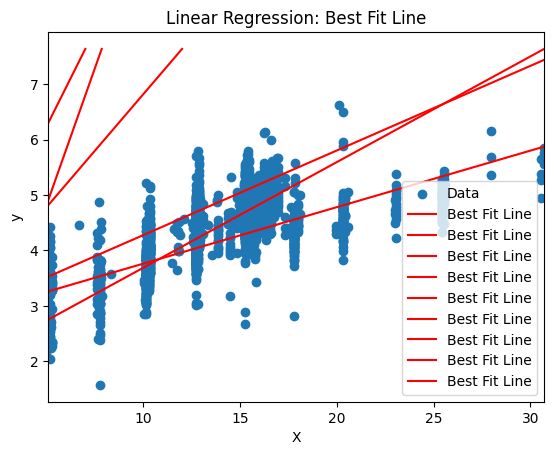

In [513]:
# Plot the observed points we generated above on a scatter plot
plt.scatter(X_train_final4.iloc[:, 1], y_train_final4, label='Data')

# Plot the best fit line
plt.plot(x_line, y_line, color='red', label='Best Fit Line')
# Set x axis width
plt.xlim(X_train_final4.iloc[:, 1].min(), X_train_final4.iloc[:, 1].max())

# Add labels and title
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression: Best Fit Line')
plt.legend()

# Display plot
plt.show()

We can see that we have several best-fit line options, with the least angled line appearing to be the best one.

For every increase in the independent variable (X, our features), the dependent variable (Y, used price) increases by some amount. We have a strong positive linear relationship between X and Y.

Since our R-squared Value is high (.84 out of 1.0), we can conclude that our regression line fits the data and that our model explains a large proportion of the variance between the dependent variable based on the independent variable.

In [514]:
# Create linear regression equation
Equation = "normalized_used_price ="
print(Equation, end=" ")
for i in range(len(X_train_final4.columns)):
    if i == 0:
        print(olsres7.params[i], "+", end=" ")
    elif i != len(X_train_final4.columns) - 1:
        print(
            olsres7.params[i],
            "* (",
            X_train_final4.columns[i],
            ")",
            "+",
            end="  ",
        )
    else:
        print(olsres7.params[i], "* (", X_train_final4.columns[i], ")")

normalized_used_price = 1.3402230296620214 + 0.026396973019480827 * ( screen_size ) +  0.021358585746070143 * ( main_camera_mp ) +  0.01386418876851184 * ( selfie_camera_mp ) +  0.01829137672230324 * ( ram ) +  0.0007787191249488618 * ( weight ) +  0.4188515328759885 * ( normalized_new_price ) +  -0.017847512113326625 * ( data_age ) +  0.04693116800938601 * ( 4g_yes )


Our final linear regression equation is as follows:

```
normalized_used_price =  1.3402230296620214
                      +  0.026396973019480827 * ( screen_size )
                      +  0.021358585746070143 * ( main_camera_mp )
                      +  0.01386418876851184 * ( selfie_camera_mp )
                      +  0.01829137672230324 * ( ram )
                      +  0.0007787191249488618 * ( weight )
                      +  0.4188515328759885 * ( normalized_new_price )
                      + -0.017847512113326625 * ( data_age )
                      +  0.04693116800938601 * ( 4g_yes )
```



In [515]:
# Get metrics for final model
# Re-run OLS model: No column drops
columns_to_delete = ['']
result = recalculate_ols(X_train_final4, y_train_final, columns_to_delete)
display(result)

Column   not found in DataFrame. Skipping...
Retest model without ['']


RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.233113  0.183036   0.840497        0.839901  4.396523

###Performance Check
Our last version satisfies the model, and now we can conduct the final test to see how it performs against the training and test datasets.

In [516]:
# Test the model performance with training data
print('Training Performance:\n')
olsmod7_train_perf = test_model_performance(olsres7, X_train_final4, y_train)
olsmod7_train_perf


Training Performance:



RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.233113  0.183036   0.840497        0.839901  4.396523

In [517]:
# Test the model performance with training data
print('Test Performance:\n')
olsmod7_test_perf = test_model_performance(olsres7, X_test_final4, y_test)
olsmod7_test_perf


Test Performance:



RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.237201  0.183177   0.844005        0.842638  4.474435

The values for RMSE, MAE, MAPE, R-squared and Adjusted R-squared are similar across both training and test results. Conclusions are drawn from performance against test data.

In addition, our model performed even slightly better on the test dataset than it did on the training data, and we can trust that the model is complete.

```
Dataset   RMSE      MAE       R-squared	  Adj. R-squared	MAPE
=========================================================================
train     0.237201  0.183177  0.844005	    0.842638	      4.474435
test      0.233113  0.183036  0.840497	    0.839901	      4.396523
=========================================================================
```

Because our RMSE results are similar across both datasets, and some minor variances exist, we can confirm our model is not overfitted.



##Predictions

Finally, let's apply the model to the test data for a prediction.

In [518]:
# Make predictions on the test dataset
pred = olsres7.predict(X_test_final4)

df_pred_test = pd.DataFrame({'Actual': y_test, 'Predicted': pred})
df_pred_test.sample(10, random_state=1)

Actual  Predicted
1995  4.566741   4.381082
2341  3.696103   3.962249
1913  3.592093   3.713889
688   4.306495   4.111607
650   4.522115   5.129052
2291  4.259294   4.395962
40    4.997685   5.459642
1884  3.875359   4.068310
2538  4.206631   4.039859
45    5.380450   5.287918

##Regression Model Summary

Our earlier analysis yielded a model that performed well on both training and test data, explaining 84.4% of the variance for key coefficients.

Despite some room for improvement in prediction precision (RMSE and MAE), our model effectively explains the majority of variability in used prices (R-squared and adjusted R-squared). Predictions are reliably accurate within a small percentage error (MAPE), supporting informed decision-making based on our model's outputs. As a result, the model can be applied confidently to make inferences from the collected data, as well as generate predictions on future data.

* **RMSE (Root Mean Squared Error)**
Our model's predictions typically deviate by about 23% from the actual values, which may seem high. However, our overall model performance, indicated by R-squared and MAPE, remains acceptable for use.

* **MAE (Mean Absolute Error)**
On average, our predictions are within 0.18 units of the actual values, reflecting decent accuracy.

* **R-squared**
Our model explains approximately 84% of the variability in used prices, indicating a strong fit to the data.

* **Adjusted R-squared**
Adjusted R-squared: Adjusted for the number of predictors, our model still explains about 83% of the variability, penalizing us slightly for unnecessary predictors.

* **MAPE (Mean Absolute Percentage Error)**
MAPE (Mean Absolute Percentage Error): Our predictions are accurate within a 4.39% margin of error on average, which is considered statistically significant.





## Actionable Insights and Recommendations

In general, device prices deteriorate day by day, and the drop is steeper in the first year of ownership vs. year 2 and beyond. That said, key timeframes exist that will benefit device buyers or sellers:

  * For sellers, the best time to sell a phone is around the 500 or 620 day mark.
  * The worst time to sell is near 800 days, when prices are the lowest.
  * For buyers, the inverse is true.

Based on our analysis, and understanding these timelines, we recommend a series of marketing campaigns that target brands and features most valuable in the resale market.

We can also provide predictions about the impact of specific features as they related to impact on used device prices. This information should help ReCell plan its activities in the device aftermarket as buyers or sellers of used devices.

####Data Collection

Over 14% of the devices are for unknown brands, so we do not fully understand the other available brands. It may be that this bucket is used for brands with resale volumes too small to register alongside major brands.

* The brand of "Other" outweighs any of the other 34 brands, comprising 14% of all devices in the dataset. It would be useful to gain additional insights into specific brands.
  * Others: 502 devices (14%)
  * Named brands: 2952 (86%)

* The data does not include information about accessories, but that could be useful for future data collection efforts. Accessories are commonly purchased, such as extra chargers, cases or housings, etc.

####Campaign Focal Points
  
Based on trends in the data, we recommend creating used device campaigns that focus on the following elements, and targeting Samsung devices approaching 2 years of usage.

In general, device prices deteriorate day by day, and the drop is steeper in the first year of ownership vs. year 2 and beyond.

That said, a few key timeframes exist that benefit device buyers or sellers:
  * For sellers, the best time to sell a phone is around the 500 or 620 day mark.
  * The worst time to sell is near 800 days, when prices are the lowest.
  * For buyers, the inverse is true.

In general, for both new and used devices,  price increases proportionally with the size/power of the hardware component. We can expect that trend to continue over time, especially for these features noted below:

* Samsung (most popular brand by far, at about 10% of devices)
* Androids (which dominate the dataset at 93% of devices)
* 5G devices (since more 5G-enabled devices will emerge for resale as 4G phases out)
* Screen sizes near 13cm (most popular size)
* Cameras with 13 MP resolution or higher (most popular, and resale price tends to increase with resolution)
* Battery power of 3000+ MmAh or higher (since batteries are becoming lighter and more powerful)



####Brands

The following aggregate details may be useful in determining which brands to pursue for resale market opportunities. Most brands lose about .01 to .02 in value for each day of usage. (All prices are in Euros.)

Extensive brand data results are listed out in the EDA analysis earlier in this document, but here are a few key points.

* Samsung is by far the most popular brand.
* Apple, Google and OnePlus devices lose the most amount of value during ownership, but tend to cost the most.
* Infinix, Realme and Xiaomi hold value well, but are typically used for the fewest number of days.
* Spice, Microsoft and Karbonn devices are held for over 800 days.



####Feature Correlations (Original)

Before starting the linear regression, we found that the strongest correlations are between weight, alongside screen size and battery.
  * As the size/power of those components increase, so does weight.
  * However, weight has the least impact on a used device's price, as we will show later.

Feature correlations with regard to price:

* New price (.83)
* Screen Size (.61)
* Selfie Camera (.61)
* Main Camera (.59)
* Weight (.38)
* Days Used (-.36)
* Internal Memory (.019)




####Used Price Predictions by Feature

New and used device prices track similarly year over year and have steadily increased. As part of this analysis, we can come up with predictive used device pricing based on feature.  

With all variables constant, we can assume the following about used device prices. A single 1 unit change in the features listed below will increase/decrease used price by some amount.

The *largest* single contributor to the used price of a device is its original cost:

* New price: .41

However, the device's components also contribute to the used device price:

* 4g connectivity: 0.0469    
* Screen size:  .0264
* Main camera MP: .0214
* RAM: 0.0183    
* Selfie camera MP: .0139

Price decline should also be considered, as devices lose value each day. For prediction purposes, every day of ownership negatively impacts used device pricing:

* Days of ownership: -0.0178  

The *least* impactful feature is weight, as it is the cumulative result of other features:

* Weight: 0.0008

```
Feature                 Used Price Impact     
------------------------------------------
normalized_new_price     0.4189
4g_yes                   0.0469
screen_size              0.0264      		      
main_camera_mp           0.0214         	    
ram                      0.0183
selfie_camera_mp         0.0139
weight                   0.0008
data_age                -0.0178
```



These relationships can be captured in our final model formula.

For each independent variable (screen size, ram, etc.), a one-unit increase in that variable is predicted to cause the specific change in used price.

Example: Every centimeter of screen size adds .03 Euro of value to the used price.

```
normalized_used_price =  1.3402230296620214
                      +  0.026396973019480827 * ( screen_size )
                      +  0.021358585746070143 * ( main_camera_mp )
                      +  0.01386418876851184 * ( selfie_camera_mp )
                      +  0.01829137672230324 * ( ram )
                      +  0.0007787191249488618 * ( weight )
                      +  0.4188515328759885 * ( normalized_new_price )
                      + -0.017847512113326625 * ( data_age )
                      +  0.04693116800938601 * ( 4g_yes )
```



___

## Export Notebook to HTML

In [523]:
# Create an HTML version of this notebook - do this last
%%shell
jupyter nbconvert --to html '/content/drive/MyDrive/Learning/Data Coursework/PGP-DSBA/3-Supervised Machine Learning/Project 3/SLF_Project_LearnerNotebook_Tuesday_Frase.ipynb'


[NbConvertApp] Converting notebook /content/drive/MyDrive/Learning/Data Coursework/PGP-DSBA/3-Supervised Machine Learning/Project 3/SLF_Project_LearnerNotebook_Tuesday_Frase.ipynb to html
[NbConvertApp] Writing 5430614 bytes to /content/drive/MyDrive/Learning/Data Coursework/PGP-DSBA/3-Supervised Machine Learning/Project 3/SLF_Project_LearnerNotebook_Tuesday_Frase.html
